In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [400]:
df17 = pd.read_csv('FIFA17_official_data.csv')
df18 = pd.read_csv('FIFA18_official_data.csv')
df19 = pd.read_csv('FIFA19_official_data.csv')
df20 = pd.read_csv('FIFA20_official_data.csv')
df21 = pd.read_csv('FIFA21_official_data.csv')
df22 = pd.read_csv('FIFA22_official_data.csv')

In [401]:
all_columns = sorted(set.union(*[set(df.columns) for df in [df17, df18, df19, df20, df21, df22]]))
print("All possible columns:", all_columns)

All possible columns: ['Acceleration', 'Age', 'Aggression', 'Agility', 'Balance', 'BallControl', 'Best Overall Rating', 'Best Position', 'Body Type', 'Club', 'Club Logo', 'Composure', 'Contract Valid Until', 'Crossing', 'Curve', 'DefensiveAwareness', 'Dribbling', 'FKAccuracy', 'Finishing', 'Flag', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'HeadingAccuracy', 'Height', 'ID', 'Interceptions', 'International Reputation', 'Jersey Number', 'Joined', 'Jumping', 'Loaned From', 'LongPassing', 'LongShots', 'Marking', 'Name', 'Nationality', 'Overall', 'Penalties', 'Photo', 'Position', 'Positioning', 'Potential', 'Preferred Foot', 'Reactions', 'Real Face', 'Release Clause', 'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle', 'Special', 'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Value', 'Vision', 'Volleys', 'Wage', 'Weak Foot', 'Weight', 'Work Rate']


In [402]:
for i, df in enumerate([df17, df18, df19, df20, df21, df22], start=17):
    missing = set(all_columns) - set(df.columns)
    if missing:
        print(f"FIFA {i} is missing columns:", missing)

FIFA 17 is missing columns: {'DefensiveAwareness', 'Release Clause'}
FIFA 18 is missing columns: {'DefensiveAwareness'}
FIFA 19 is missing columns: {'DefensiveAwareness'}


# Feature Engineering:-
#### Add Defensive awareness in 2017,18,19
#### Drop Release Clause from 2018,19,20,21,22

In [403]:
def_df22 = df22[['StandingTackle', 'SlidingTackle','Interceptions']]

In [404]:
def_df22.isna().sum()

StandingTackle     0
SlidingTackle     37
Interceptions      8
dtype: int64

In [405]:
sliding_mean = def_df22['SlidingTackle'].mean().round()
interceptions = def_df22['Interceptions'].mean().round()

In [406]:
def_df22['SlidingTackle'] = def_df22['SlidingTackle'].fillna(sliding_mean)
def_df22['Interceptions'] = def_df22['Interceptions'].fillna(interceptions)

/var/folders/t2/tbsxbkdx5p7dnyf56fm18k3m0000gn/T/ipykernel_92901/2642263701.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t2/tbsxbkdx5p7dnyf56fm18k3m0000gn/T/ipykernel_92901/2642263701.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [407]:
def_df22.isna().sum()

StandingTackle    0
SlidingTackle     0
Interceptions     0
dtype: int64

In [408]:
da_mean = df22['DefensiveAwareness'].mean().round()
def_df22_y = df22['DefensiveAwareness'].fillna(da_mean)

In [409]:
from sklearn.linear_model import LinearRegression
X = def_df22
y = def_df22_y
model = LinearRegression().fit(X, y)
print(model.coef_, model.intercept_)

[0.27525996 0.19714272 0.398636  ] 6.09803633213577


In [410]:
df17['DefensiveAwareness'] = 0.27525996*df17['StandingTackle'] + 0.19714272*df17['SlidingTackle'] + 0.398636*df17['Interceptions'] + 6.09803633213577
df18['DefensiveAwareness'] = 0.27525996*df18['StandingTackle'] + 0.19714272*df18['SlidingTackle'] + 0.398636*df18['Interceptions'] + 6.09803633213577
df19['DefensiveAwareness'] = 0.27525996*df19['StandingTackle'] + 0.19714272*df19['SlidingTackle'] + 0.398636*df19['Interceptions'] + 6.09803633213577

In [411]:
df18.drop('Release Clause',axis=1,inplace=True)
df19.drop('Release Clause',axis=1,inplace=True)
df20.drop('Release Clause',axis=1,inplace=True)
df21.drop('Release Clause',axis=1,inplace=True)
df22.drop('Release Clause',axis=1,inplace=True)

In [412]:
df17['Season'] = 2017
df18['Season'] = 2018
df19['Season'] = 2019
df20['Season'] = 2020
df21['Season'] = 2021
df22['Season'] = 2022

In [413]:
combined_df = pd.concat([df17, df18, df19, df20, df21, df22], ignore_index=True)

In [414]:
df = combined_df.copy(deep=True)

In [415]:
df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,DefensiveAwareness,Season
0,176580,L. Suárez,29,https://cdn.sofifa.com/players/176/580/17_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,92,92,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,42.320234,2017
1,178518,R. Nainggolan,28,https://cdn.sofifa.com/players/178/518/17_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,86,86,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0,81.126388,2017
2,181872,A. Vidal,29,https://cdn.sofifa.com/players/181/872/17_60.png,Chile,https://cdn.sofifa.com/flags/cl.png,87,87,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,84.0,4.0,2.0,4.0,2.0,4.0,CDM,85.0,82.634765,2017
3,197445,D. Alaba,24,https://cdn.sofifa.com/players/197/445/17_60.png,Austria,https://cdn.sofifa.com/flags/at.png,86,89,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,83.0,5.0,7.0,14.0,15.0,9.0,LB,84.0,79.191519,2017
4,195864,P. Pogba,23,https://cdn.sofifa.com/players/195/864/17_60.png,France,https://cdn.sofifa.com/flags/fr.png,88,94,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,73.0,5.0,6.0,2.0,4.0,3.0,CAM,85.0,68.487952,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104347,240558,18 L. Clayton,17,https://cdn.sofifa.com/players/240/558/18_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,53,70,Cheltenham Town,https://cdn.sofifa.com/teams/1936/30.png,...,12.0,55.0,54.0,52.0,50.0,59.0,GK,52.0,NaN,2022
104348,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,5.000000,2022
104349,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,21.000000,2022
104350,259646,A. Shaikh,18,https://cdn.sofifa.com/players/259/646/22_60.png,India,https://cdn.sofifa.com/flags/in.png,47,67,ATK Mohun Bagan FC,https://cdn.sofifa.com/teams/113146/30.png,...,13.0,49.0,41.0,39.0,45.0,49.0,GK,47.0,7.000000,2022


# **Feature Engineering Practice:-**

In [416]:
df_temp = combined_df.copy(deep=True)

In [417]:
df_temp['Joined']

0         Jul 11, 2014
1          Jan 7, 2014
2         Jul 28, 2015
3         Feb 10, 2010
4          Aug 9, 2016
              ...     
104347     Jul 1, 2016
104348    Jul 28, 2018
104349    Apr 19, 2021
104350     Aug 1, 2020
104351             NaN
Name: Joined, Length: 104352, dtype: object

In [418]:
df_temp.drop(columns = ['Marking','Loaned From','Photo','Flag','Club Logo'],axis=1,inplace=True)

In [419]:
df_temp.isna().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                         1710
Value                           0
Wage                            0
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                      81
Real Face                      81
Position                      117
Jersey Number                 117
Joined                      10461
Contract Valid Until         2536
Height                          0
Weight                          0
Crossing                        0
Finishing                       0
HeadingAccuracy                 0
ShortPassing                    0
Volleys                       115
Dribbling                       0
Curve         

In [420]:
df_temp

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,DefensiveAwareness,Season
0,176580,L. Suárez,29,Uruguay,92,92,FC Barcelona,€83M,€525K,2291,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,42.320234,2017
1,178518,R. Nainggolan,28,Belgium,86,86,Roma,€37.5M,€130K,2290,...,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0,81.126388,2017
2,181872,A. Vidal,29,Chile,87,87,FC Bayern München,€41.5M,€180K,2285,...,84.0,4.0,2.0,4.0,2.0,4.0,CDM,85.0,82.634765,2017
3,197445,D. Alaba,24,Austria,86,89,FC Bayern München,€41.5M,€140K,2279,...,83.0,5.0,7.0,14.0,15.0,9.0,LB,84.0,79.191519,2017
4,195864,P. Pogba,23,France,88,94,Manchester United,€71.5M,€225K,2271,...,73.0,5.0,6.0,2.0,4.0,3.0,CAM,85.0,68.487952,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104347,240558,18 L. Clayton,17,England,53,70,Cheltenham Town,€100K,€1K,782,...,12.0,55.0,54.0,52.0,50.0,59.0,GK,52.0,NaN,2022
104348,262846,�. Dobre,20,Romania,53,63,FC Academica Clinceni,€180K,€550,778,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,5.000000,2022
104349,241317,21 Xue Qinghao,19,China PR,47,60,Shanghai Shenhua FC,€100K,€700,770,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,21.000000,2022
104350,259646,A. Shaikh,18,India,47,67,ATK Mohun Bagan FC,€110K,€500,754,...,13.0,49.0,41.0,39.0,45.0,49.0,GK,47.0,7.000000,2022


In [421]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104352 entries, 0 to 104351
Data columns (total 60 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        104352 non-null  int64  
 1   Name                      104352 non-null  object 
 2   Age                       104352 non-null  int64  
 3   Nationality               104352 non-null  object 
 4   Overall                   104352 non-null  int64  
 5   Potential                 104352 non-null  int64  
 6   Club                      102642 non-null  object 
 7   Value                     104352 non-null  object 
 8   Wage                      104352 non-null  object 
 9   Special                   104352 non-null  int64  
 10  Preferred Foot            104352 non-null  object 
 11  International Reputation  104352 non-null  float64
 12  Weak Foot                 104352 non-null  float64
 13  Skill Moves               104352 non-null  f

In [422]:
df_temp['Name'].sample(100).tolist()

[' N. Hernández',
 ' E. Rakip',
 ' Pedro Nuno',
 ' L. de Jong',
 ' S. Romero',
 ' L. Castro',
 ' Filipe Ferreira',
 ' O. Rommens',
 ' A. Gözütok',
 ' K. Bangunagande',
 '21\xa0O. Özdemir',
 ' Jeong Jun Yeon',
 ' I. Kiese Thelin',
 'M. Minchev',
 ' K. Browne',
 ' Christian Rivera',
 ' M. Cafaro',
 ' 18\xa0S. Driussi',
 ' Burgui',
 ' A. Al Awafi',
 ' D. Kownacki',
 ' S. Tangvik',
 ' M. Taylor',
 ' G. Whyte',
 ' C. Bassett',
 ' D. Harvie',
 ' S. Brown',
 'E. Cornelisse',
 ' Álvaro Peña',
 ' B. Kennedy',
 ' E. Bearzotti',
 'N. Hult',
 'L. Balogun',
 ' A. Vita',
 'R. Boudebouz',
 ' F. Manzo',
 ' J. Sowerby',
 ' J. Bajandouh',
 ' A. Al Ammar',
 ' A. Adomah',
 'Ely',
 ' Won Du Jae',
 ' 20\xa0Toni Moya',
 ' R. Rezaeian',
 ' H. Droguett',
 ' L. Stindl',
 ' L. Duarte',
 ' N. Vukcević',
 ' J. Scowen',
 ' J. Gandolfi',
 ' J. de Guzmán',
 'E. Sarić',
 'Nacho Monreal',
 ' J. Talbot',
 'Luisinho Conradi',
 ' J. Fontaine',
 ' M. Bower',
 ' D. Daniels',
 ' A. Lioi',
 ' D. Acosta',
 'R. Haynes',
 ' Kwak

#### Common patterns in name - number name , number/xa0 name, presence of �
#### ^ signifies start of the string and * signifies zero or more of \s (spaces)

In [423]:
df_temp['Name'] = df_temp['Name'].str.replace(r'^\d+\s*|\d+\xa0','',regex=True)

In [424]:
df_temp['Name'] = df_temp['Name'].str.replace(r'�','',regex=True)

In [425]:
df_temp

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,DefensiveAwareness,Season
0,176580,L. Suárez,29,Uruguay,92,92,FC Barcelona,€83M,€525K,2291,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,42.320234,2017
1,178518,R. Nainggolan,28,Belgium,86,86,Roma,€37.5M,€130K,2290,...,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0,81.126388,2017
2,181872,A. Vidal,29,Chile,87,87,FC Bayern München,€41.5M,€180K,2285,...,84.0,4.0,2.0,4.0,2.0,4.0,CDM,85.0,82.634765,2017
3,197445,D. Alaba,24,Austria,86,89,FC Bayern München,€41.5M,€140K,2279,...,83.0,5.0,7.0,14.0,15.0,9.0,LB,84.0,79.191519,2017
4,195864,P. Pogba,23,France,88,94,Manchester United,€71.5M,€225K,2271,...,73.0,5.0,6.0,2.0,4.0,3.0,CAM,85.0,68.487952,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104347,240558,L. Clayton,17,England,53,70,Cheltenham Town,€100K,€1K,782,...,12.0,55.0,54.0,52.0,50.0,59.0,GK,52.0,NaN,2022
104348,262846,. Dobre,20,Romania,53,63,FC Academica Clinceni,€180K,€550,778,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,5.000000,2022
104349,241317,Xue Qinghao,19,China PR,47,60,Shanghai Shenhua FC,€100K,€700,770,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,21.000000,2022
104350,259646,A. Shaikh,18,India,47,67,ATK Mohun Bagan FC,€110K,€500,754,...,13.0,49.0,41.0,39.0,45.0,49.0,GK,47.0,7.000000,2022


In [426]:
df_temp = df_temp.dropna()

In [427]:
df_temp.isna().sum().sum()

0

In [428]:
df_temp.shape

(90839, 60)

In [429]:
type(df_temp['Joined'][0])

str

In [430]:
df_temp['Joined'] = pd.to_datetime(df_temp['Joined'])
df_temp['Joined_Year'] = df_temp['Joined'].dt.year
df_temp['Joined_Month'] = df_temp['Joined'].dt.month
df_temp['Joined_Day'] = df_temp['Joined'].dt.day
df_temp.drop('Joined',axis=1,inplace=True)
df_temp

/var/folders/t2/tbsxbkdx5p7dnyf56fm18k3m0000gn/T/ipykernel_92901/513545052.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t2/tbsxbkdx5p7dnyf56fm18k3m0000gn/T/ipykernel_92901/513545052.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t2/tbsxbkdx5p7dnyf56fm18k3m0000gn/T/ipykernel_92901/513545052.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,DefensiveAwareness,Season,Joined_Year,Joined_Month,Joined_Day
0,176580,L. Suárez,29,Uruguay,92,92,FC Barcelona,€83M,€525K,2291,...,31.0,33.0,37.0,ST,88.0,42.320234,2017,2014,7,11
1,178518,R. Nainggolan,28,Belgium,86,86,Roma,€37.5M,€130K,2290,...,14.0,8.0,11.0,CDM,84.0,81.126388,2017,2014,1,7
2,181872,A. Vidal,29,Chile,87,87,FC Bayern München,€41.5M,€180K,2285,...,4.0,2.0,4.0,CDM,85.0,82.634765,2017,2015,7,28
3,197445,D. Alaba,24,Austria,86,89,FC Bayern München,€41.5M,€140K,2279,...,14.0,15.0,9.0,LB,84.0,79.191519,2017,2010,2,10
4,195864,P. Pogba,23,France,88,94,Manchester United,€71.5M,€225K,2271,...,2.0,4.0,3.0,CAM,85.0,68.487952,2017,2016,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104345,259718,F. Gebhardt,19,Germany,52,66,FC Basel 1893,€170K,€650,803,...,47.0,52.0,57.0,GK,52.0,6.000000,2022,2020,11,1
104346,251433,B. Voll,20,Germany,58,69,F.C. Hansa Rostock,€375K,€950,802,...,56.0,55.0,61.0,GK,58.0,5.000000,2022,2019,7,1
104348,262846,. Dobre,20,Romania,53,63,FC Academica Clinceni,€180K,€550,778,...,53.0,48.0,58.0,GK,53.0,5.000000,2022,2018,7,28
104349,241317,Xue Qinghao,19,China PR,47,60,Shanghai Shenhua FC,€100K,€700,770,...,45.0,38.0,52.0,GK,47.0,21.000000,2022,2021,4,19


In [431]:
# Each .str.replace() returns a new series and thus we chain multiple together
# We treat M,K,€ as literals thus regex = False

df_temp['Value (€)'] = (
    pd.to_numeric(df_temp['Value']
        .str.replace('€', '', regex=False)
        .str.replace('M', 'e6', regex=False)
        .str.replace('K', 'e3', regex=False),
        errors='coerce')
)

/var/folders/t2/tbsxbkdx5p7dnyf56fm18k3m0000gn/T/ipykernel_92901/1185495545.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [432]:
df_temp['Wage (€)'] = (
    pd.to_numeric(df_temp['Wage']
        .str.replace('€', '', regex=False,)
        .str.replace('K', 'e3', regex=False),
        errors='coerce')
)

/var/folders/t2/tbsxbkdx5p7dnyf56fm18k3m0000gn/T/ipykernel_92901/3263231518.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [433]:
df_temp.drop(columns=['Value','Wage'],axis=1,inplace=True)

/var/folders/t2/tbsxbkdx5p7dnyf56fm18k3m0000gn/T/ipykernel_92901/1222545023.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [434]:
df_temp.drop(columns=['Best Overall Rating','Special','International Reputation','Body Type','Real Face','Contract Valid Until'],
        axis=1,
        inplace=True)

/var/folders/t2/tbsxbkdx5p7dnyf56fm18k3m0000gn/T/ipykernel_92901/2762097244.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [435]:
df_temp.shape

(90839, 56)

In [436]:
df_temp

,ID,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,Weak Foot,Skill Moves,...,GKPositioning,GKReflexes,Best Position,DefensiveAwareness,Season,Joined_Year,Joined_Month,Joined_Day,Value (€),Wage (€)
0,176580,L. Suárez,29,Uruguay,92,92,FC Barcelona,Right,4.0,4.0,...,33.0,37.0,ST,42.320234,2017,2014,7,11,83000000.0,525000.0
1,178518,R. Nainggolan,28,Belgium,86,86,Roma,Right,3.0,3.0,...,8.0,11.0,CDM,81.126388,2017,2014,1,7,37500000.0,130000.0
2,181872,A. Vidal,29,Chile,87,87,FC Bayern München,Right,4.0,3.0,...,2.0,4.0,CDM,82.634765,2017,2015,7,28,41500000.0,180000.0
3,197445,D. Alaba,24,Austria,86,89,FC Bayern München,Left,4.0,3.0,...,15.0,9.0,LB,79.191519,2017,2010,2,10,41500000.0,140000.0
4,195864,P. Pogba,23,France,88,94,Manchester United,Right,4.0,5.0,...,4.0,3.0,CAM,68.487952,2017,2016,8,9,71500000.0,225000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104345,259718,F. Gebhardt,19,Germany,52,66,FC Basel 1893,Right,3.0,1.0,...,52.0,57.0,GK,6.000000,2022,2020,11,1,170000.0,650.0
104346,251433,B. Voll,20,Germany,58,69,F.C. Hansa Rostock,Right,2.0,1.0,...,55.0,61.0,GK,5.000000,2022,2019,7,1,375000.0,950.0
104348,262846,. Dobre,20,Romania,53,63,FC Academica Clinceni,Right,2.0,1.0,...,48.0,58.0,GK,5.000000,2022,2018,7,28,180000.0,550.0
104349,241317,Xue Qinghao,19,China PR,47,60,Shanghai Shenhua FC,Right,2.0,1.0,...,38.0,52.0,GK,21.000000,2022,2021,4,19,100000.0,700.0


In [437]:
df_temp['Name'] = (df_temp['Name'].str.strip())

/var/folders/t2/tbsxbkdx5p7dnyf56fm18k3m0000gn/T/ipykernel_92901/3597784573.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [438]:
df_temp.loc[df_temp['Name']=='L. Suárez']

,ID,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,Weak Foot,Skill Moves,...,GKPositioning,GKReflexes,Best Position,DefensiveAwareness,Season,Joined_Year,Joined_Month,Joined_Day,Value (€),Wage (€)
0,176580,L. Suárez,29,Uruguay,92,92,FC Barcelona,Right,4.0,4.0,...,33.0,37.0,ST,42.320234,2017,2014,7,11,83000000.0,525000.0
7313,225591,L. Suárez,20,Argentina,71,82,Villarreal CF,Left,3.0,3.0,...,15.0,7.0,CAM,20.301865,2017,2015,1,1,2800000.0,15000.0
11751,222378,L. Suárez,21,Argentina,64,73,Club Atlético Sarmiento,Left,2.0,2.0,...,16.0,16.0,CB,62.460097,2017,2016,8,1,575000.0,3000.0
17560,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,Right,4.0,4.0,...,33.0,37.0,CF,42.320234,2018,2014,7,11,97000000.0,500000.0
25310,225591,L. Suárez,21,Argentina,68,77,Villarreal CF,Left,3.0,3.0,...,15.0,7.0,CAM,20.301865,2018,2015,1,1,1400000.0,15000.0
29589,222378,L. Suárez,22,Argentina,64,73,Defensa y Justicia,Left,2.0,2.0,...,16.0,16.0,CB,62.460097,2018,2017,7,6,600000.0,4000.0
35487,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,Right,4.0,3.0,...,33.0,37.0,ST,42.320234,2019,2014,7,11,80000000.0,450000.0
53430,176580,L. Suárez,32,Uruguay,89,89,FC Barcelona,Right,4.0,3.0,...,33.0,37.0,ST,57.000000,2020,2014,7,11,53000000.0,350000.0
55650,245158,L. Suárez,21,Colombia,74,85,Real Zaragoza,Right,4.0,3.0,...,11.0,6.0,ST,26.000000,2020,2017,7,9,10000000.0,8000.0
59296,225591,L. Suárez,23,Argentina,72,78,Club América,Left,3.0,4.0,...,15.0,7.0,CAM,23.000000,2020,2020,1,13,4300000.0,30000.0


In [439]:
df_temp['Work Rate'].value_counts()

Work Rate
Medium/ Medium    47880
High/ Medium      16508
Medium/ High       8706
High/ High         5136
Medium/ Low        4369
High/ Low          3578
Low/ Medium        2295
Low/ High          2169
Low/ Low            198
Name: count, dtype: int64

In [440]:
df_temp.drop('Position',axis=1,inplace=True)

/var/folders/t2/tbsxbkdx5p7dnyf56fm18k3m0000gn/T/ipykernel_92901/2839119032.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [441]:
df_temp.reset_index(inplace=True)

In [442]:
df_temp = df_temp.drop('index',axis=1)

In [443]:
df_temp[['Work Rate 1','Work Rate 2']] = df_temp['Work Rate'].str.split('/',expand=True)

## **EDA:-**

In [444]:
df_temp

,ID,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,Weak Foot,Skill Moves,...,Best Position,DefensiveAwareness,Season,Joined_Year,Joined_Month,Joined_Day,Value (€),Wage (€),Work Rate 1,Work Rate 2
0,176580,L. Suárez,29,Uruguay,92,92,FC Barcelona,Right,4.0,4.0,...,ST,42.320234,2017,2014,7,11,83000000.0,525000.0,High,Medium
1,178518,R. Nainggolan,28,Belgium,86,86,Roma,Right,3.0,3.0,...,CDM,81.126388,2017,2014,1,7,37500000.0,130000.0,High,High
2,181872,A. Vidal,29,Chile,87,87,FC Bayern München,Right,4.0,3.0,...,CDM,82.634765,2017,2015,7,28,41500000.0,180000.0,High,High
3,197445,D. Alaba,24,Austria,86,89,FC Bayern München,Left,4.0,3.0,...,LB,79.191519,2017,2010,2,10,41500000.0,140000.0,High,Medium
4,195864,P. Pogba,23,France,88,94,Manchester United,Right,4.0,5.0,...,CAM,68.487952,2017,2016,8,9,71500000.0,225000.0,High,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90834,259718,F. Gebhardt,19,Germany,52,66,FC Basel 1893,Right,3.0,1.0,...,GK,6.000000,2022,2020,11,1,170000.0,650.0,Medium,Medium
90835,251433,B. Voll,20,Germany,58,69,F.C. Hansa Rostock,Right,2.0,1.0,...,GK,5.000000,2022,2019,7,1,375000.0,950.0,Medium,Medium
90836,262846,. Dobre,20,Romania,53,63,FC Academica Clinceni,Right,2.0,1.0,...,GK,5.000000,2022,2018,7,28,180000.0,550.0,Medium,Medium
90837,241317,Xue Qinghao,19,China PR,47,60,Shanghai Shenhua FC,Right,2.0,1.0,...,GK,21.000000,2022,2021,4,19,100000.0,700.0,Medium,Medium


In [445]:
df_temp.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Preferred Foot', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Jersey Number', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Position',
       'DefensiveAwareness', 'Season', 'Joined_Year', 'Joined_Month',
       'Joined_Day', 'Value (€)', 'Wage (€)', 'Work Rate 1', 'Work Rate 2'],
      dtype='object')

In [446]:
id_group = df_temp.groupby(['ID','Name'])
a = id_group['Overall'].sum()
a.nlargest(5)

ID      Name             
158023  L. Messi             561
20801   Cristiano Ronaldo    558
188545  R. Lewandowski       545
192985  K. De Bruyne         543
167495  M. Neuer             540
Name: Overall, dtype: int64

In [447]:
players_list = ['L. Messi','Cristiano Ronaldo','R. Lewandowski','K. De Bruyne','M. Neuer']
for i in players_list:
    filt = df_temp['Name']==i
    l=len(df_temp.loc[filt,'Season'].value_counts())
    print(l)

6
6
6
6
6


In [448]:
filt = df_temp['ID'].isin([158023,20801,188545,192985,167495])
players_df = df_temp.loc[filt,['ID','Name','Overall','Season']].reset_index()
players_df = players_df.drop('index',axis=1)
players_df.set_index('ID')

,Name,Overall,Season
ID,,,
20801,Cristiano Ronaldo,94,2017
158023,L. Messi,93,2017
192985,K. De Bruyne,88,2017
188545,R. Lewandowski,90,2017
167495,M. Neuer,92,2017
192985,K. De Bruyne,91,2018
20801,Cristiano Ronaldo,94,2018
158023,L. Messi,94,2018
188545,R. Lewandowski,91,2018


In [449]:
players_df.shape

(30, 4)

In [450]:
players_df = players_df.reset_index()

In [451]:
import plotly.express as px

fig = px.line(
    players_df,  
    x="Season",             
    y="Overall",            
    color="Name",           
    markers=True,           
    hover_data=["Overall"]       
)

fig.update_layout(
    title="Top 5 Players' Overall Development (2017–2022)",
    xaxis_title="Season",
    yaxis_title="Overall Rating",
    legend_title="Player",
    template="plotly_white"
)

fig.show()

In [452]:
filt = df_temp['ID'].isin([158023,20801,188545,192985,167495])
players_df_value = df_temp.loc[filt,['ID','Name','Overall','Season','Value (€)']].reset_index()
players_df_value = players_df_value.drop('index',axis=1)

In [453]:
players_df_value

,ID,Name,Overall,Season,Value (€)
0,20801,Cristiano Ronaldo,94,2017,87000000.0
1,158023,L. Messi,93,2017,89000000.0
2,192985,K. De Bruyne,88,2017,65500000.0
3,188545,R. Lewandowski,90,2017,71000000.0
4,167495,M. Neuer,92,2017,69500000.0
5,192985,K. De Bruyne,91,2018,104500000.0
6,20801,Cristiano Ronaldo,94,2018,95500000.0
7,158023,L. Messi,94,2018,118500000.0
8,188545,R. Lewandowski,91,2018,92000000.0
9,167495,M. Neuer,92,2018,61000000.0


In [454]:
fig = px.line(
    players_df_value,  
    x="Season",             
    y="Value (€)",            
    color="Name",           
    markers=True,           
    hover_data=["Overall"]       
)

fig.update_layout(
    title="Top 5 Players' Value (€) Fluctuation(2017–2022)",
    xaxis_title="Season",
    yaxis_title="Value (€)",
    legend_title="Player",
    template="plotly_white"
)

fig.show()

In [455]:
df_temp

,ID,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,Weak Foot,Skill Moves,...,Best Position,DefensiveAwareness,Season,Joined_Year,Joined_Month,Joined_Day,Value (€),Wage (€),Work Rate 1,Work Rate 2
0,176580,L. Suárez,29,Uruguay,92,92,FC Barcelona,Right,4.0,4.0,...,ST,42.320234,2017,2014,7,11,83000000.0,525000.0,High,Medium
1,178518,R. Nainggolan,28,Belgium,86,86,Roma,Right,3.0,3.0,...,CDM,81.126388,2017,2014,1,7,37500000.0,130000.0,High,High
2,181872,A. Vidal,29,Chile,87,87,FC Bayern München,Right,4.0,3.0,...,CDM,82.634765,2017,2015,7,28,41500000.0,180000.0,High,High
3,197445,D. Alaba,24,Austria,86,89,FC Bayern München,Left,4.0,3.0,...,LB,79.191519,2017,2010,2,10,41500000.0,140000.0,High,Medium
4,195864,P. Pogba,23,France,88,94,Manchester United,Right,4.0,5.0,...,CAM,68.487952,2017,2016,8,9,71500000.0,225000.0,High,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90834,259718,F. Gebhardt,19,Germany,52,66,FC Basel 1893,Right,3.0,1.0,...,GK,6.000000,2022,2020,11,1,170000.0,650.0,Medium,Medium
90835,251433,B. Voll,20,Germany,58,69,F.C. Hansa Rostock,Right,2.0,1.0,...,GK,5.000000,2022,2019,7,1,375000.0,950.0,Medium,Medium
90836,262846,. Dobre,20,Romania,53,63,FC Academica Clinceni,Right,2.0,1.0,...,GK,5.000000,2022,2018,7,28,180000.0,550.0,Medium,Medium
90837,241317,Xue Qinghao,19,China PR,47,60,Shanghai Shenhua FC,Right,2.0,1.0,...,GK,21.000000,2022,2021,4,19,100000.0,700.0,Medium,Medium


In [456]:
df_temp['Club'].value_counts()

Club
Manchester United                   221
Arsenal                             219
Chelsea                             217
Liverpool                           217
Tottenham Hotspur                   216
                                   ... 
Delfín Sporting Club                  1
Club Plaza de Deportes Colonia        1
Club Deportivo Oriente Petrolero      1
Club Atlético River Plate             1
Club Unión Magdalena S.A              1
Name: count, Length: 1087, dtype: int64

In [457]:
top_team_grp = df_temp.groupby(['Club','Season'])
total = top_team_grp['Overall'].sum()
count = top_team_grp['ID'].count()
total/count

Club                   Season
1. FC Heidenheim 1846  2017      65.727273
                       2018      66.250000
                       2019      65.357143
                       2020      67.388889
                       2021      65.750000
                                   ...    
Śląsk Wrocław          2018      63.043478
                       2019      62.538462
                       2020      63.250000
                       2021      62.117647
                       2022      63.666667
Length: 4205, dtype: float64

In [458]:
teams_df = (df_temp.groupby(['Club','Season'])['Overall'].mean().reset_index(name='Mean_Overall'))

In [459]:
top_teams_df = teams_df.groupby(['Club'])['Mean_Overall'].mean().reset_index().sort_values('Mean_Overall',ascending=False)
top_teams_df.head(5)

,Club,Mean_Overall
573,Juventus,80.232681
788,Real Madrid,78.672230
374,FC Barcelona,78.407922
679,Napoli,78.291899
377,FC Bayern München,78.108669


In [460]:
def get_club_mean_overall(df, season):
    top_3 = df[df['Season'] == season].groupby('Club')['Overall'].mean().reset_index(name='MeanOverall').sort_values('MeanOverall', ascending=False).head(3)['Club'].tolist()

    df_top3 = df[(df['Season'] == season) & (df['Club'].isin(top_3))]

    fig = px.box(
        df_top3,
        x="Club", y="Overall", color="Club",
        points="outliers",
        title=f"Top 3 Clubs in {season} — Squad Overall Distribution"
    )

    fig.update_layout(template="plotly_white")
    fig.show()
    
box_plot = get_club_mean_overall(df_temp, 2018)
box_plot

In [461]:
top_club_grp=df_temp.groupby(['Club','Season'])
top_clubs_df=top_club_grp['Overall'].mean().reset_index(name='Mean Overall')

my_clubs=['FC Barcelona','Juventus','Paris Saint-Germain','Manchester City','FC Bayern München']
final_top_clubs_df=top_clubs_df[top_clubs_df['Club'].isin(my_clubs)]
final_top_clubs_df

,Club,Season,Mean Overall
1393,FC Barcelona,2017,78.312500
1394,FC Barcelona,2018,83.285714
1395,FC Barcelona,2019,77.774194
1396,FC Barcelona,2020,78.062500
1397,FC Barcelona,2021,76.527778
1398,FC Barcelona,2022,76.484848
1406,FC Bayern München,2017,75.576923
1407,FC Bayern München,2018,76.333333
1408,FC Bayern München,2019,76.142857
1409,FC Bayern München,2020,81.450000


<Axes: xlabel='Season', ylabel='Club'>

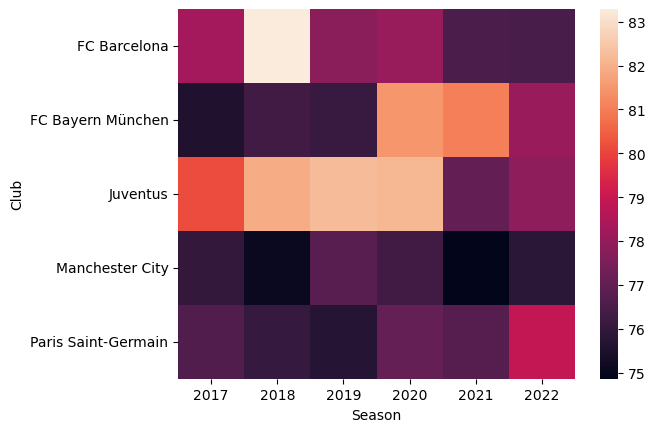

In [462]:
sns.heatmap(final_top_clubs_df.pivot_table(values='Mean Overall',index='Club',columns='Season'))

## **Dropping insignificant columns:-** (wrt model prediction = overall)

In [463]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'DefensiveAwareness', 'Season'],
      dtype='object')

In [464]:
columns_to_drop = ['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
                   'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
                   'Preferred Foot', 'International Reputation',
                   'Body Type', 'Real Face', 'Position',
                   'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
                   'Height', 'Weight','Best Position', 'Best Overall Rating','Season']

In [465]:
df.drop(columns = columns_to_drop,axis=1,inplace=True)

In [466]:
df.columns

Index(['Overall', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'DefensiveAwareness'],
      dtype='object')

In [467]:
df.isna().sum()

Overall                   0
Weak Foot                 0
Skill Moves               0
Work Rate                 0
Crossing                  0
Finishing                 0
HeadingAccuracy           0
ShortPassing              0
Volleys                 115
Dribbling                 0
Curve                   115
FKAccuracy                0
LongPassing               0
BallControl               0
Acceleration              0
SprintSpeed               0
Agility                 115
Reactions                 0
Balance                 115
ShotPower                 0
Jumping                 115
Stamina                   0
Strength                  0
LongShots                 0
Aggression                0
Interceptions            15
Positioning              15
Vision                  115
Penalties                 0
Composure               958
Marking               47402
StandingTackle            0
SlidingTackle           115
GKDiving                  0
GKHandling                0
GKKicking           

#### Reason to drop Marking:-

In [468]:
47402/104352

0.4542509966268016

In [469]:
df.drop('Marking',axis=1,inplace=True)

In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104352 entries, 0 to 104351
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Overall             104352 non-null  int64  
 1   Weak Foot           104352 non-null  float64
 2   Skill Moves         104352 non-null  float64
 3   Work Rate           104352 non-null  object 
 4   Crossing            104352 non-null  float64
 5   Finishing           104352 non-null  float64
 6   HeadingAccuracy     104352 non-null  float64
 7   ShortPassing        104352 non-null  float64
 8   Volleys             104237 non-null  float64
 9   Dribbling           104352 non-null  float64
 10  Curve               104237 non-null  float64
 11  FKAccuracy          104352 non-null  float64
 12  LongPassing         104352 non-null  float64
 13  BallControl         104352 non-null  float64
 14  Acceleration        104352 non-null  float64
 15  SprintSpeed         104352 non-nul

In [471]:
df = df.drop('Work Rate',axis=1)

In [472]:
df = df.dropna()

In [473]:
df.shape

(100832, 37)

In [474]:
104352 - 100832

3520

In [475]:
df

,Overall,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness
0,92,4.0,4.0,77.0,94.0,77.0,83.0,88.0,86.0,86.0,...,85.0,83.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,42.320234
1,86,3.0,3.0,73.0,76.0,59.0,84.0,75.0,80.0,73.0,...,63.0,85.0,85.0,88.0,11.0,11.0,14.0,8.0,11.0,81.126388
2,87,4.0,3.0,76.0,77.0,81.0,84.0,78.0,76.0,76.0,...,84.0,86.0,89.0,84.0,4.0,2.0,4.0,2.0,4.0,82.634765
3,86,4.0,3.0,82.0,63.0,75.0,83.0,68.0,79.0,78.0,...,80.0,79.0,83.0,83.0,5.0,7.0,14.0,15.0,9.0,79.191519
4,88,4.0,5.0,78.0,71.0,73.0,85.0,84.0,89.0,84.0,...,76.0,83.0,73.0,73.0,5.0,6.0,2.0,4.0,3.0,68.487952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104345,52,3.0,1.0,13.0,9.0,13.0,22.0,5.0,12.0,12.0,...,10.0,33.0,12.0,10.0,53.0,45.0,47.0,52.0,57.0,6.000000
104346,58,2.0,1.0,8.0,9.0,11.0,23.0,7.0,11.0,11.0,...,7.0,29.0,12.0,10.0,59.0,60.0,56.0,55.0,61.0,5.000000
104348,53,2.0,1.0,13.0,7.0,10.0,17.0,7.0,6.0,11.0,...,12.0,29.0,13.0,12.0,57.0,52.0,53.0,48.0,58.0,5.000000
104349,47,2.0,1.0,12.0,9.0,14.0,15.0,6.0,8.0,12.0,...,15.0,17.0,11.0,9.0,49.0,48.0,45.0,38.0,52.0,21.000000


In [476]:
df.columns

Index(['Overall', 'Weak Foot', 'Skill Moves', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'DefensiveAwareness'],
      dtype='object')

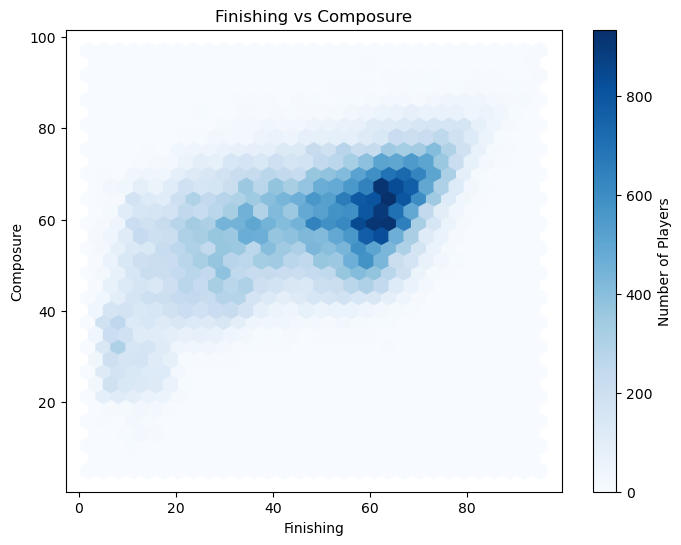

In [477]:
plt.figure(figsize=(8,6))
plt.hexbin(
    df['Finishing'], 
    df['Composure'], 
    gridsize=30,
    cmap='Blues',
)
plt.colorbar(label="Number of Players")
plt.xlabel("Finishing")
plt.ylabel("Composure")
plt.title("Finishing vs Composure")
plt.show()

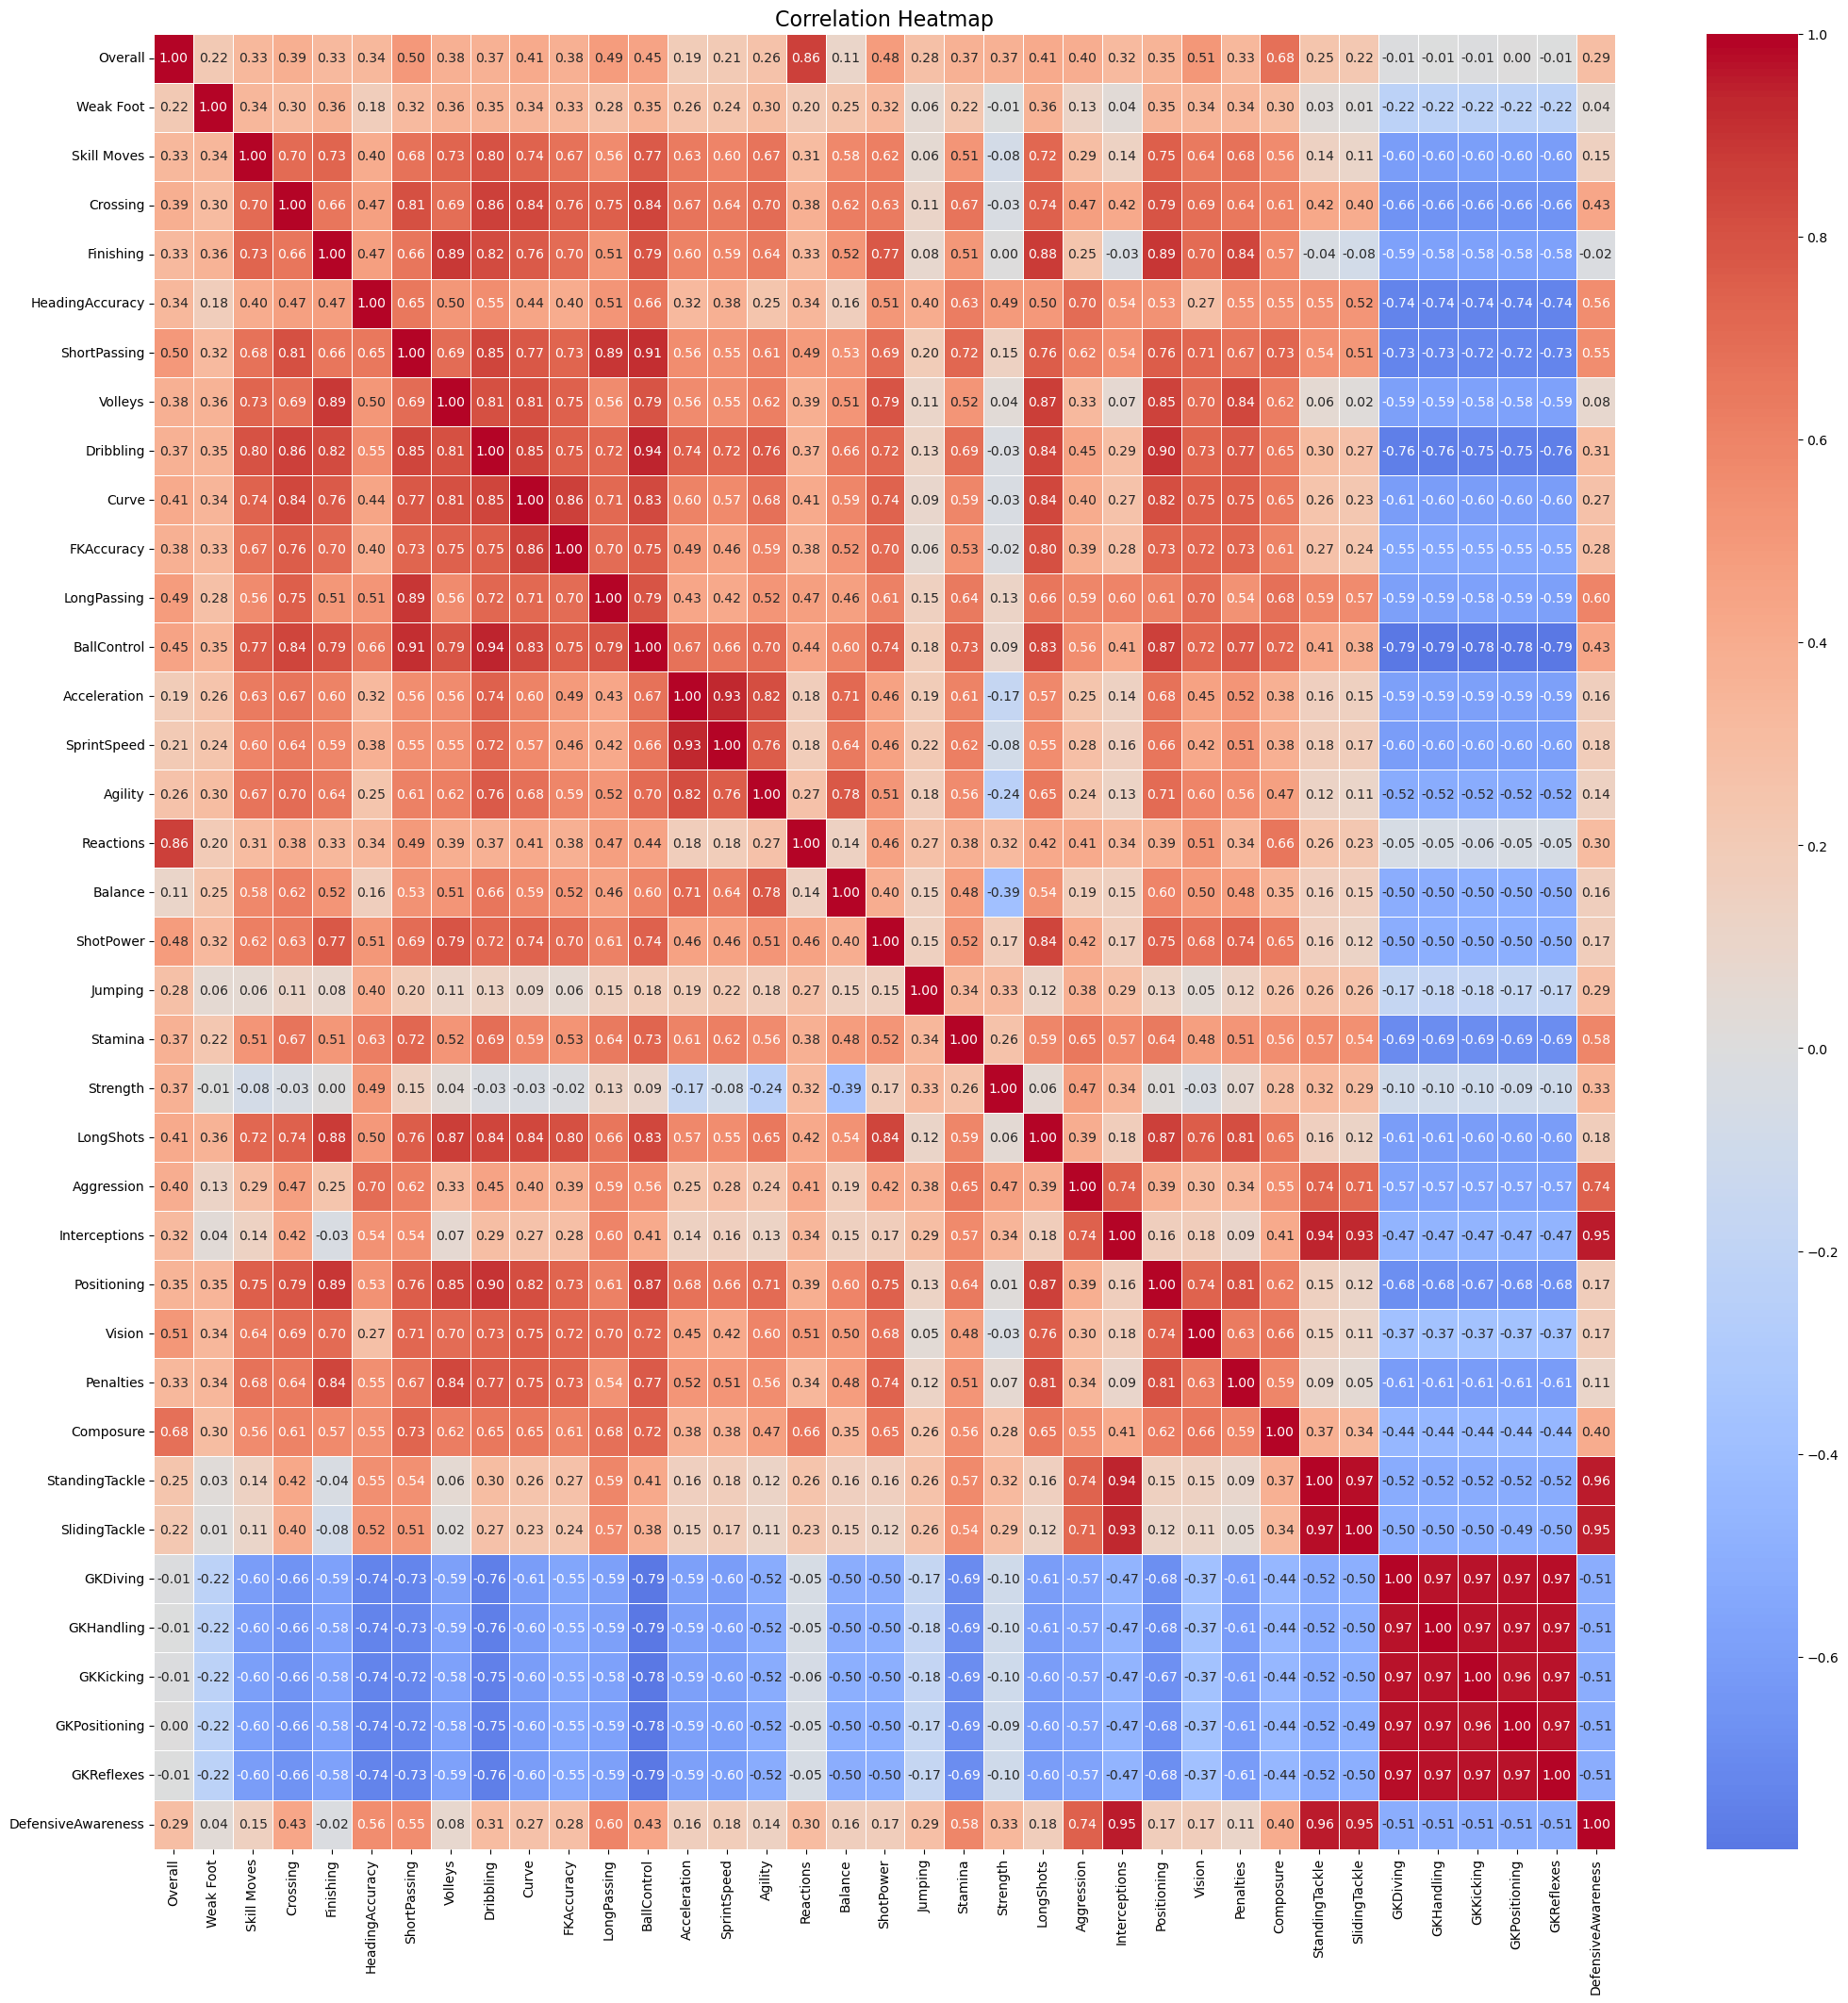

In [480]:
plt.figure(figsize=(25,25))
sns.heatmap(
    df.corr(), 
    annot=True,
    fmt=".2f",
    cmap="coolwarm", 
    center=0, 
    linewidths=0.5
)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [481]:
df = df.drop(columns=['GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes'],axis=1)

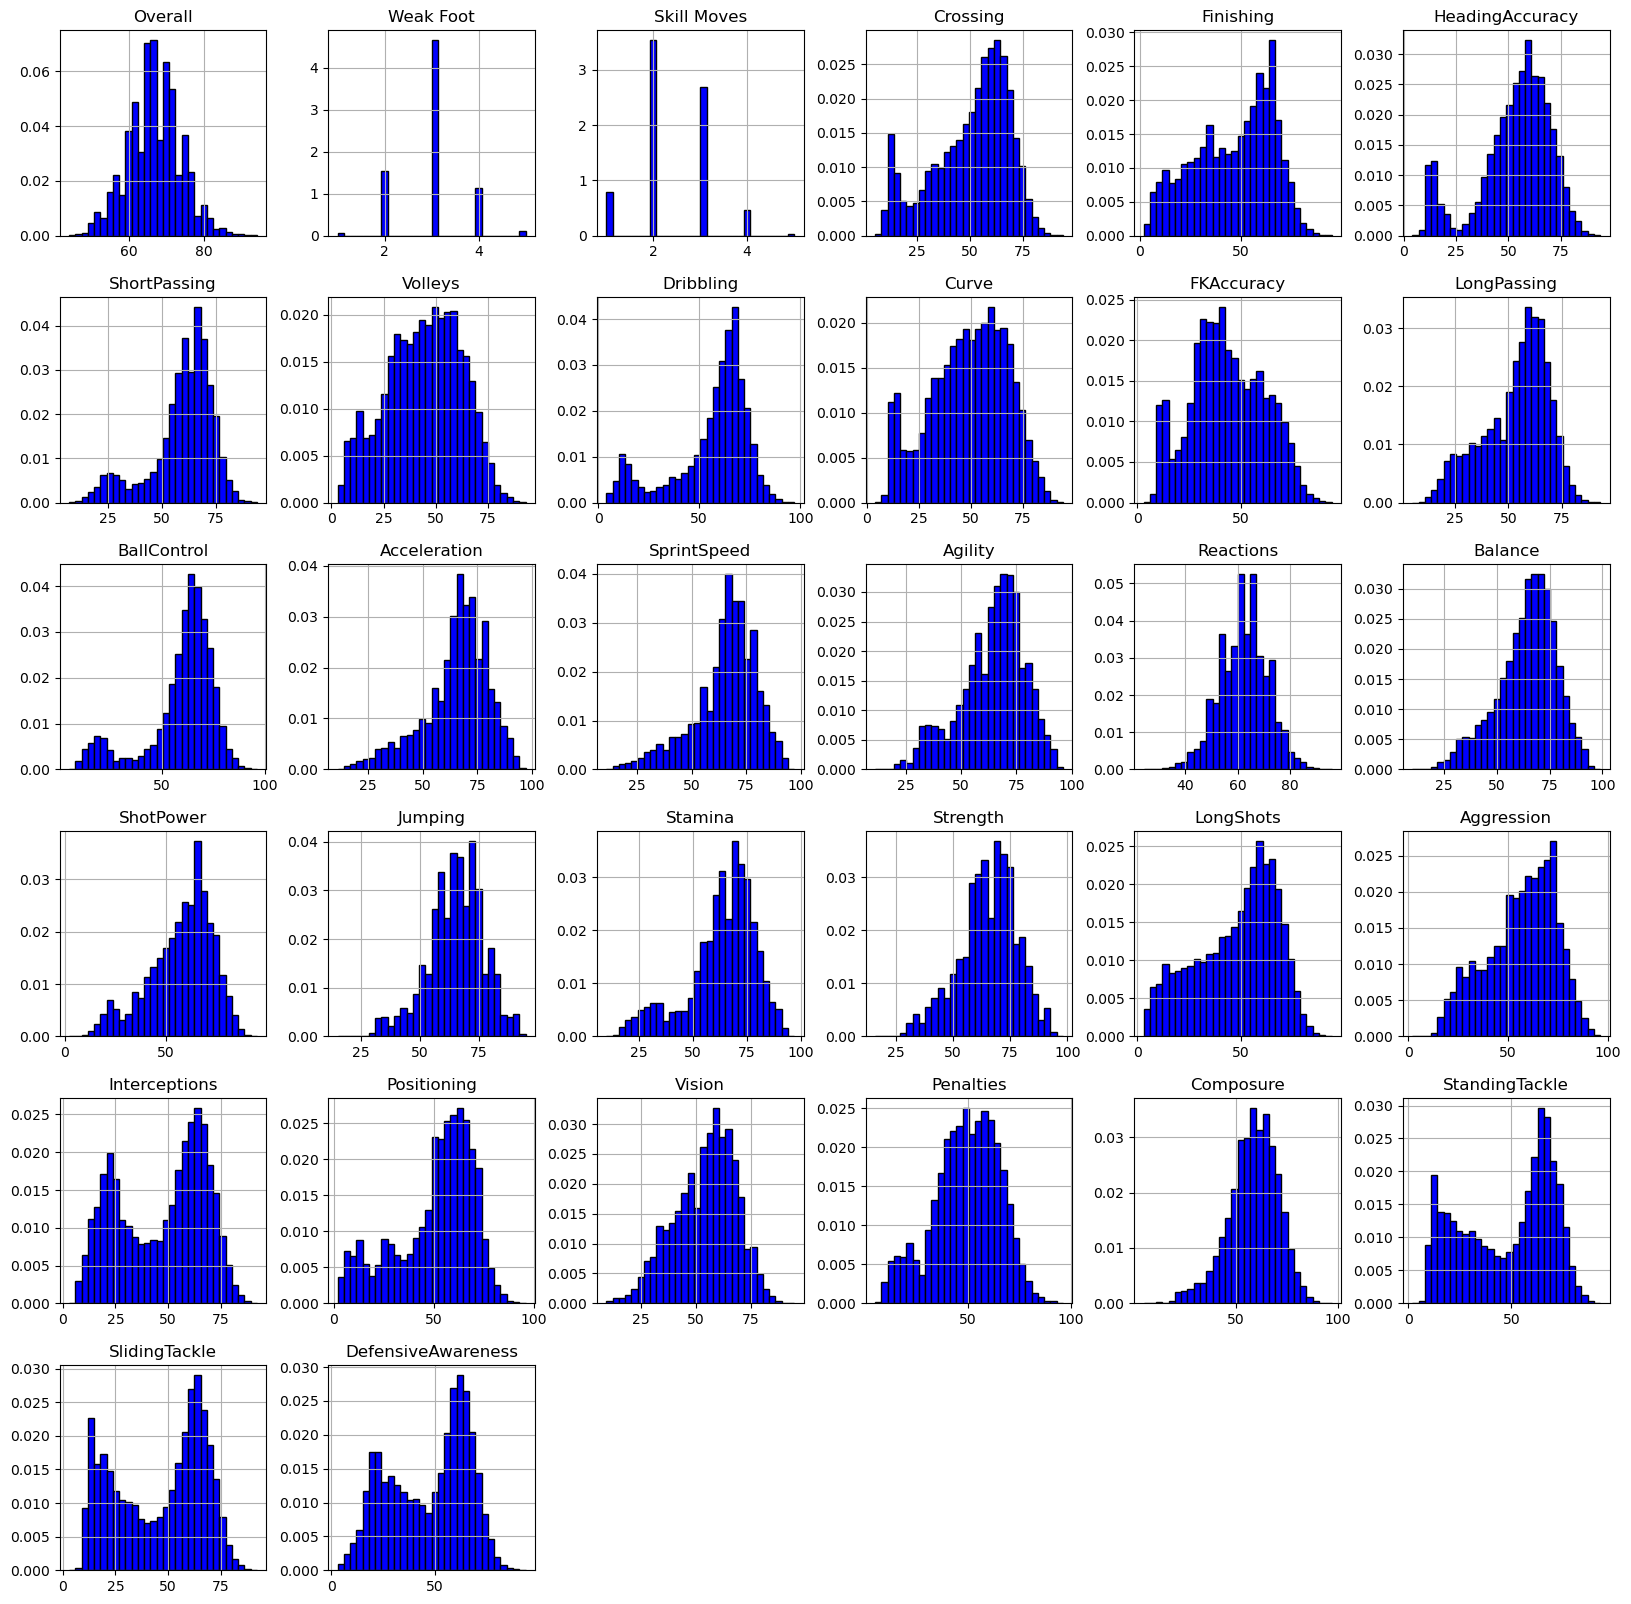

In [487]:
df.hist(figsize=(20,20), bins=30, color="blue", edgecolor="black",density=True)
plt.show()

In [488]:
df.describe()

,Overall,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,DefensiveAwareness
count,100832.000000,100832.000000,100832.00000,100832.000000,100832.000000,100832.000000,100832.000000,100832.000000,100832.000000,100832.000000,...,100832.000000,100832.000000,100832.000000,100832.000000,100832.000000,100832.000000,100832.000000,100832.000000,100832.000000,100832.000000
mean,66.552632,2.962066,2.38702,50.491709,46.444403,52.740787,59.347905,43.711094,56.355889,48.180250,...,47.861334,56.291435,46.833515,50.869615,54.164462,49.143456,58.597836,47.970129,45.896104,47.058558
std,6.934362,0.665879,0.76857,18.196074,19.522125,17.257308,14.480922,17.716651,18.656590,18.349547,...,19.214540,17.238701,20.751823,19.421973,14.011538,15.703741,12.283173,21.612638,21.265675,19.086460
min,44.000000,1.000000,1.00000,5.000000,2.000000,4.000000,7.000000,3.000000,4.000000,4.000000,...,3.000000,2.000000,3.000000,2.000000,9.000000,5.000000,5.000000,2.000000,3.000000,3.000000
25%,62.000000,3.000000,2.00000,39.000000,31.000000,45.000000,54.000000,31.000000,50.000000,35.000000,...,34.000000,45.000000,26.000000,40.000000,45.000000,39.000000,51.000000,27.000000,24.000000,29.299796
50%,67.000000,3.000000,2.00000,55.000000,50.000000,56.000000,63.000000,45.000000,62.000000,50.000000,...,52.000000,59.000000,52.000000,56.000000,56.000000,50.000000,60.000000,55.000000,52.000000,52.000000
75%,71.000000,3.000000,3.00000,64.000000,62.000000,65.000000,69.000000,57.000000,69.000000,63.000000,...,63.000000,70.000000,64.000000,65.000000,65.000000,61.000000,67.000000,66.000000,64.000000,63.000000
max,94.000000,5.000000,5.00000,94.000000,95.000000,94.000000,94.000000,93.000000,97.000000,94.000000,...,94.000000,96.000000,92.000000,96.000000,95.000000,96.000000,97.000000,93.000000,92.000000,94.000000


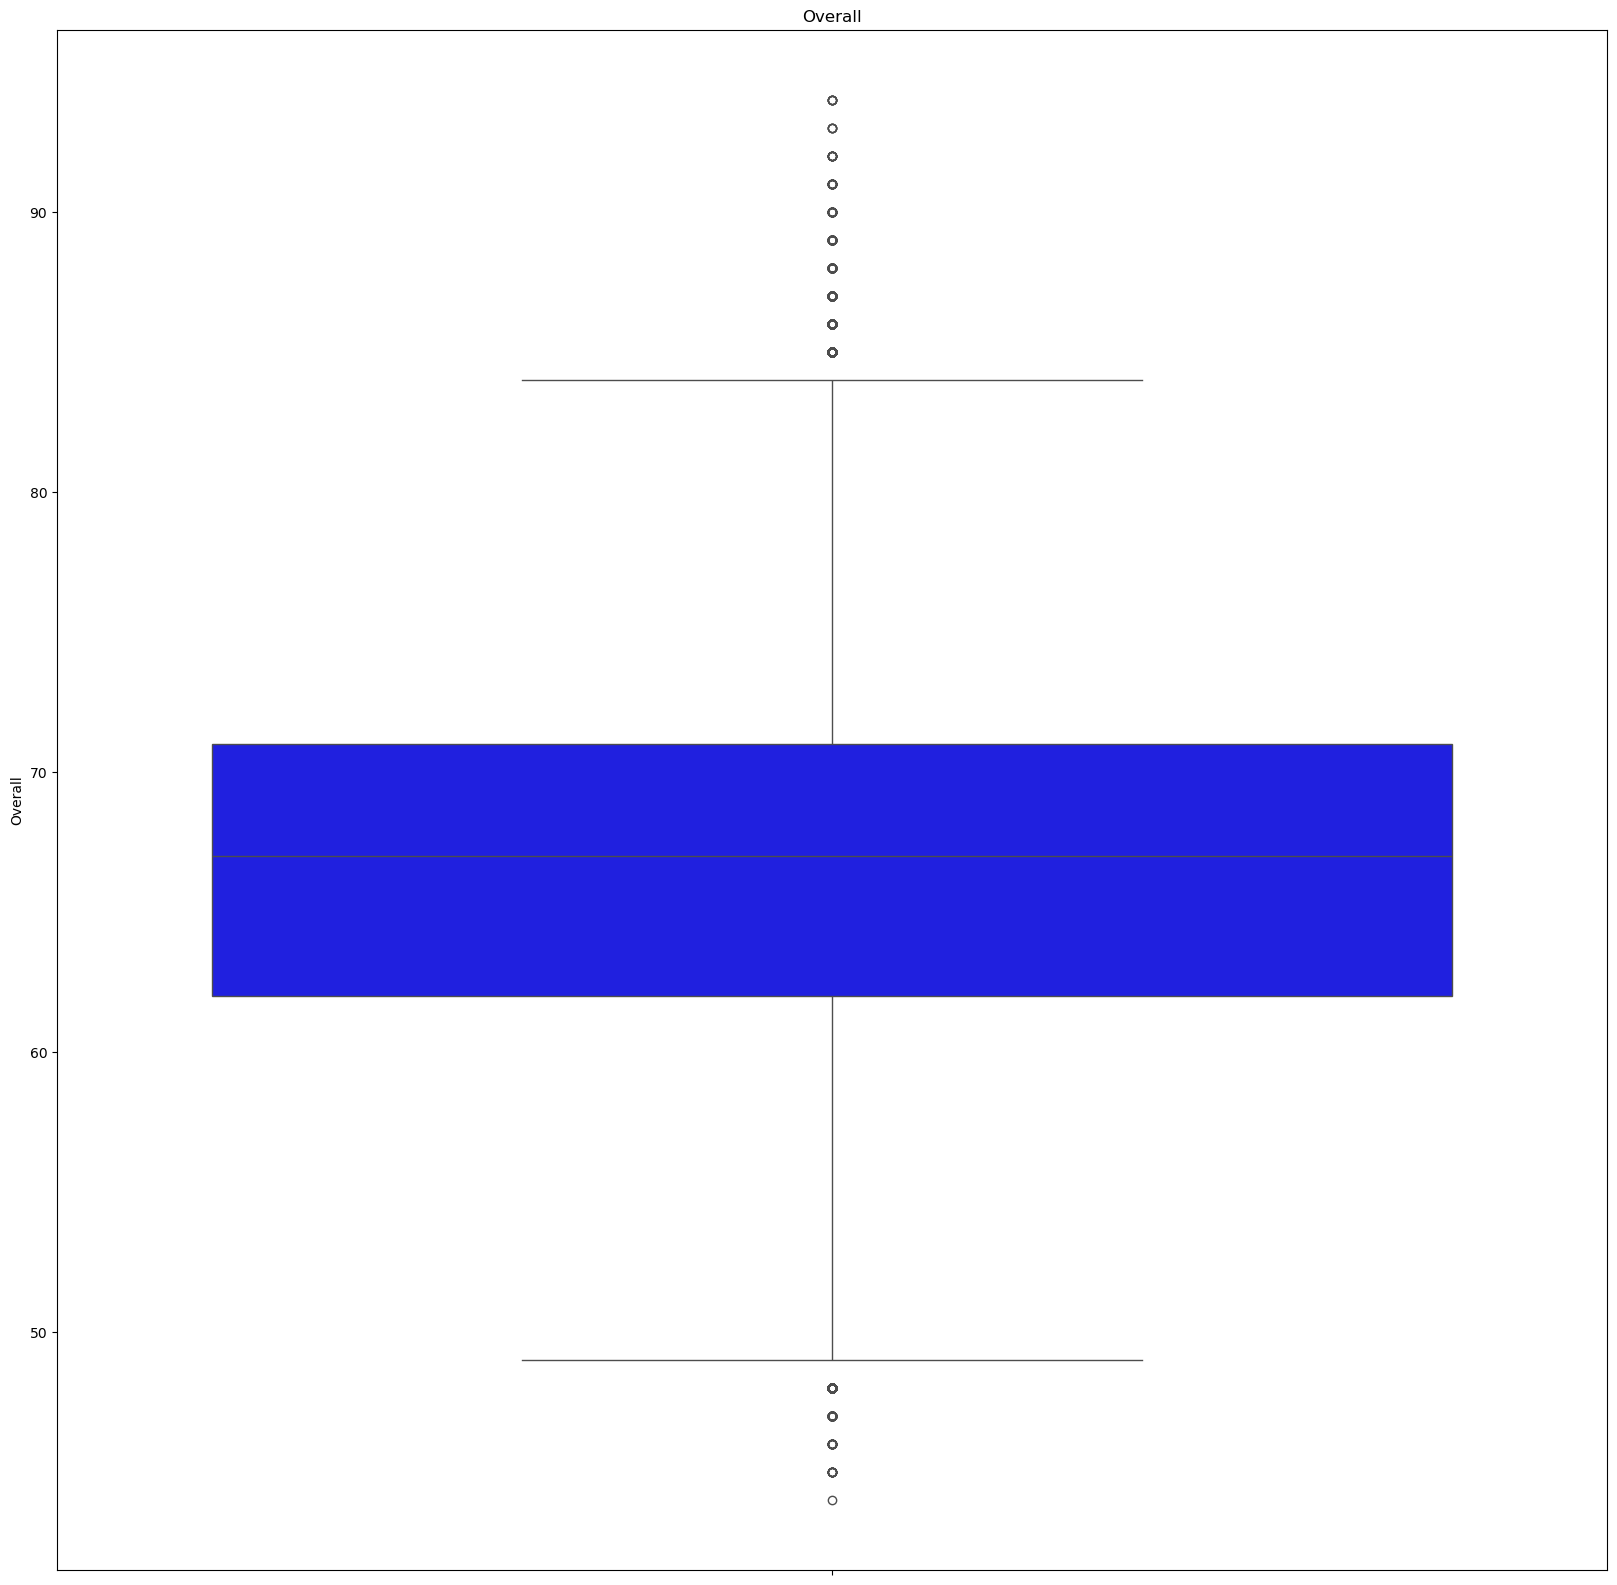

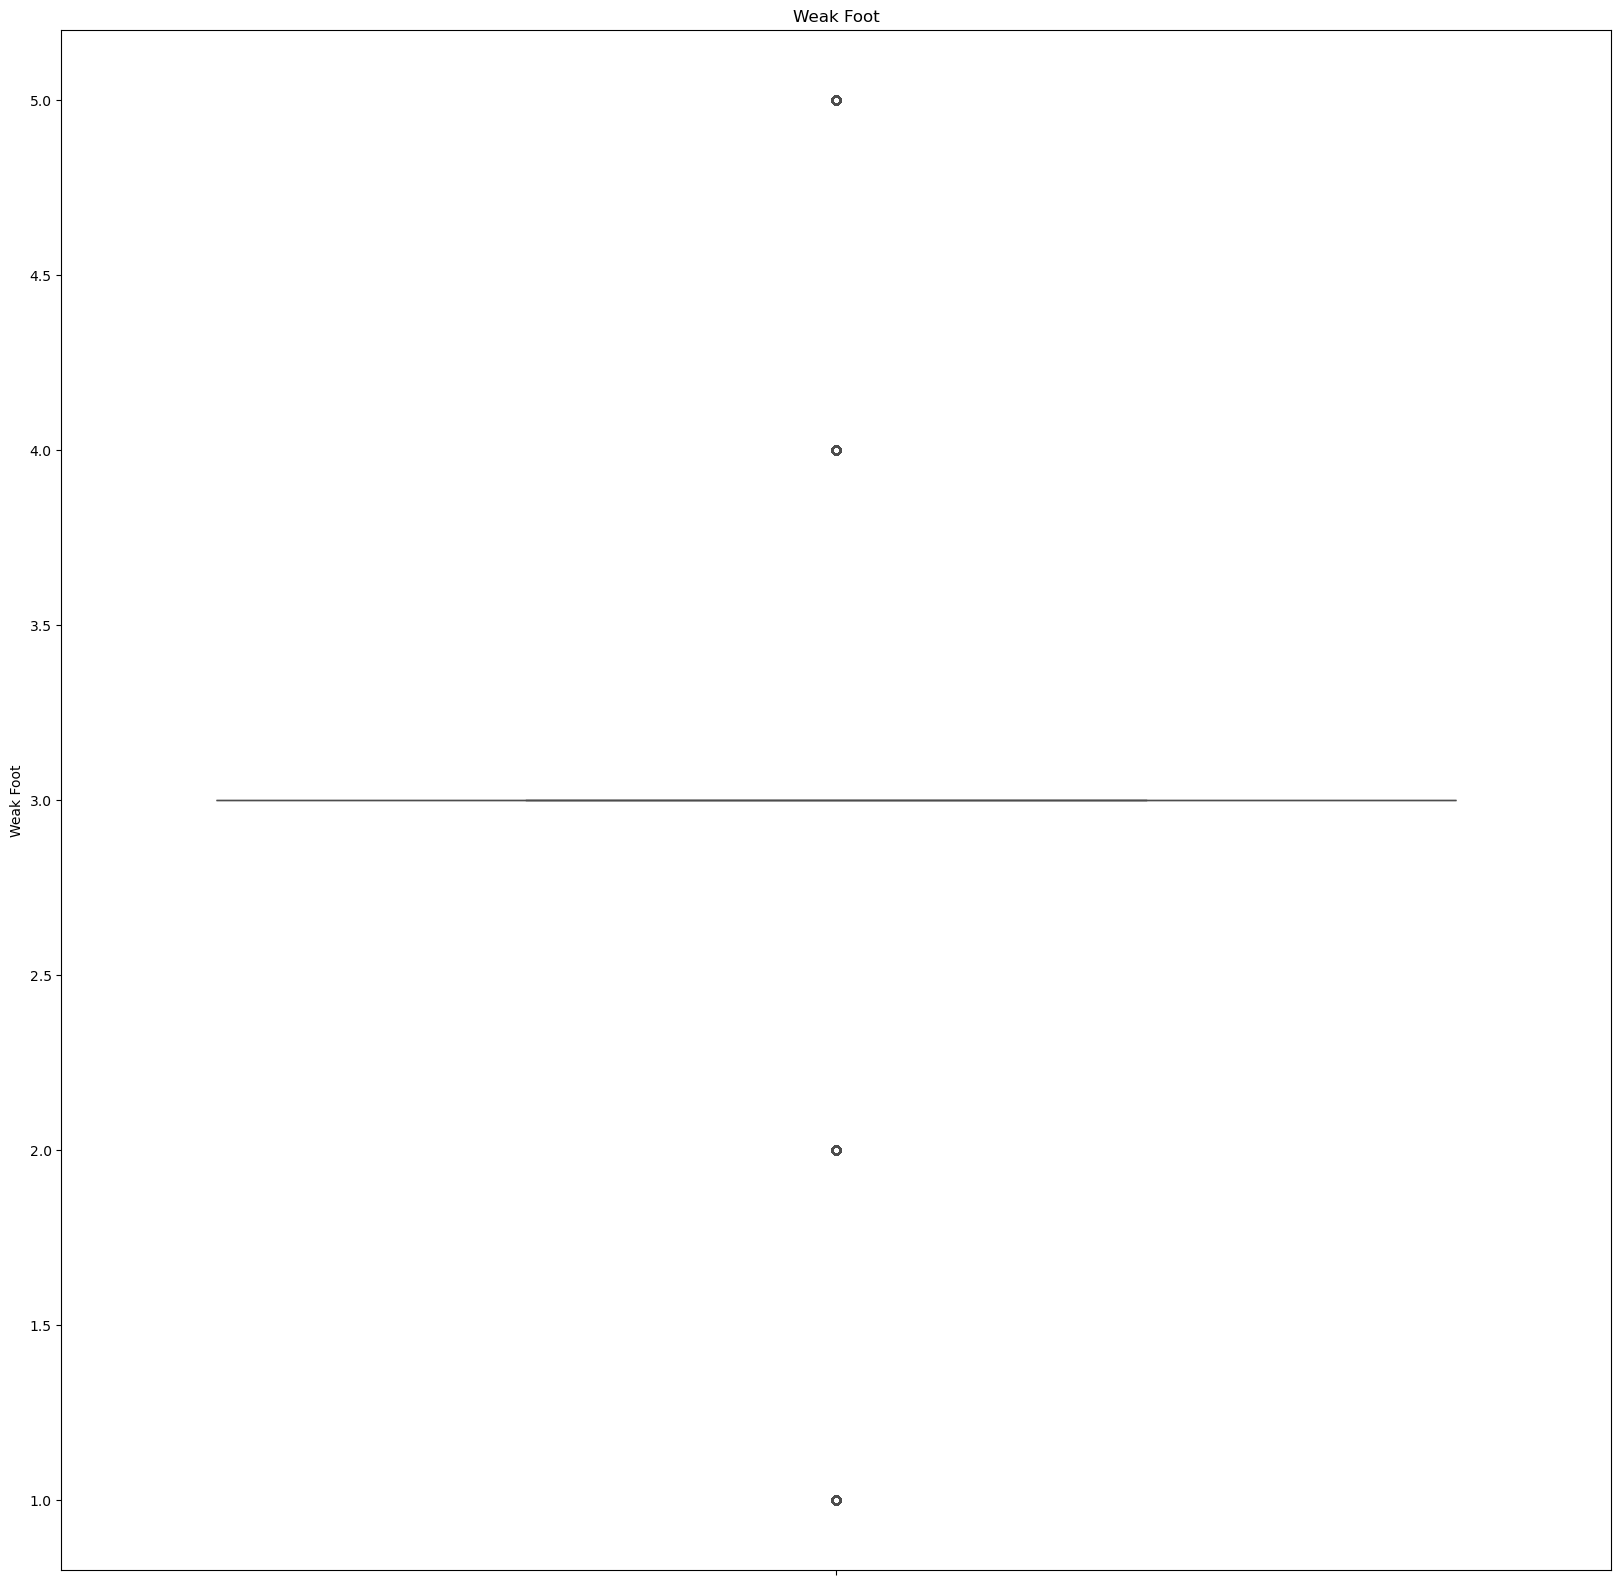

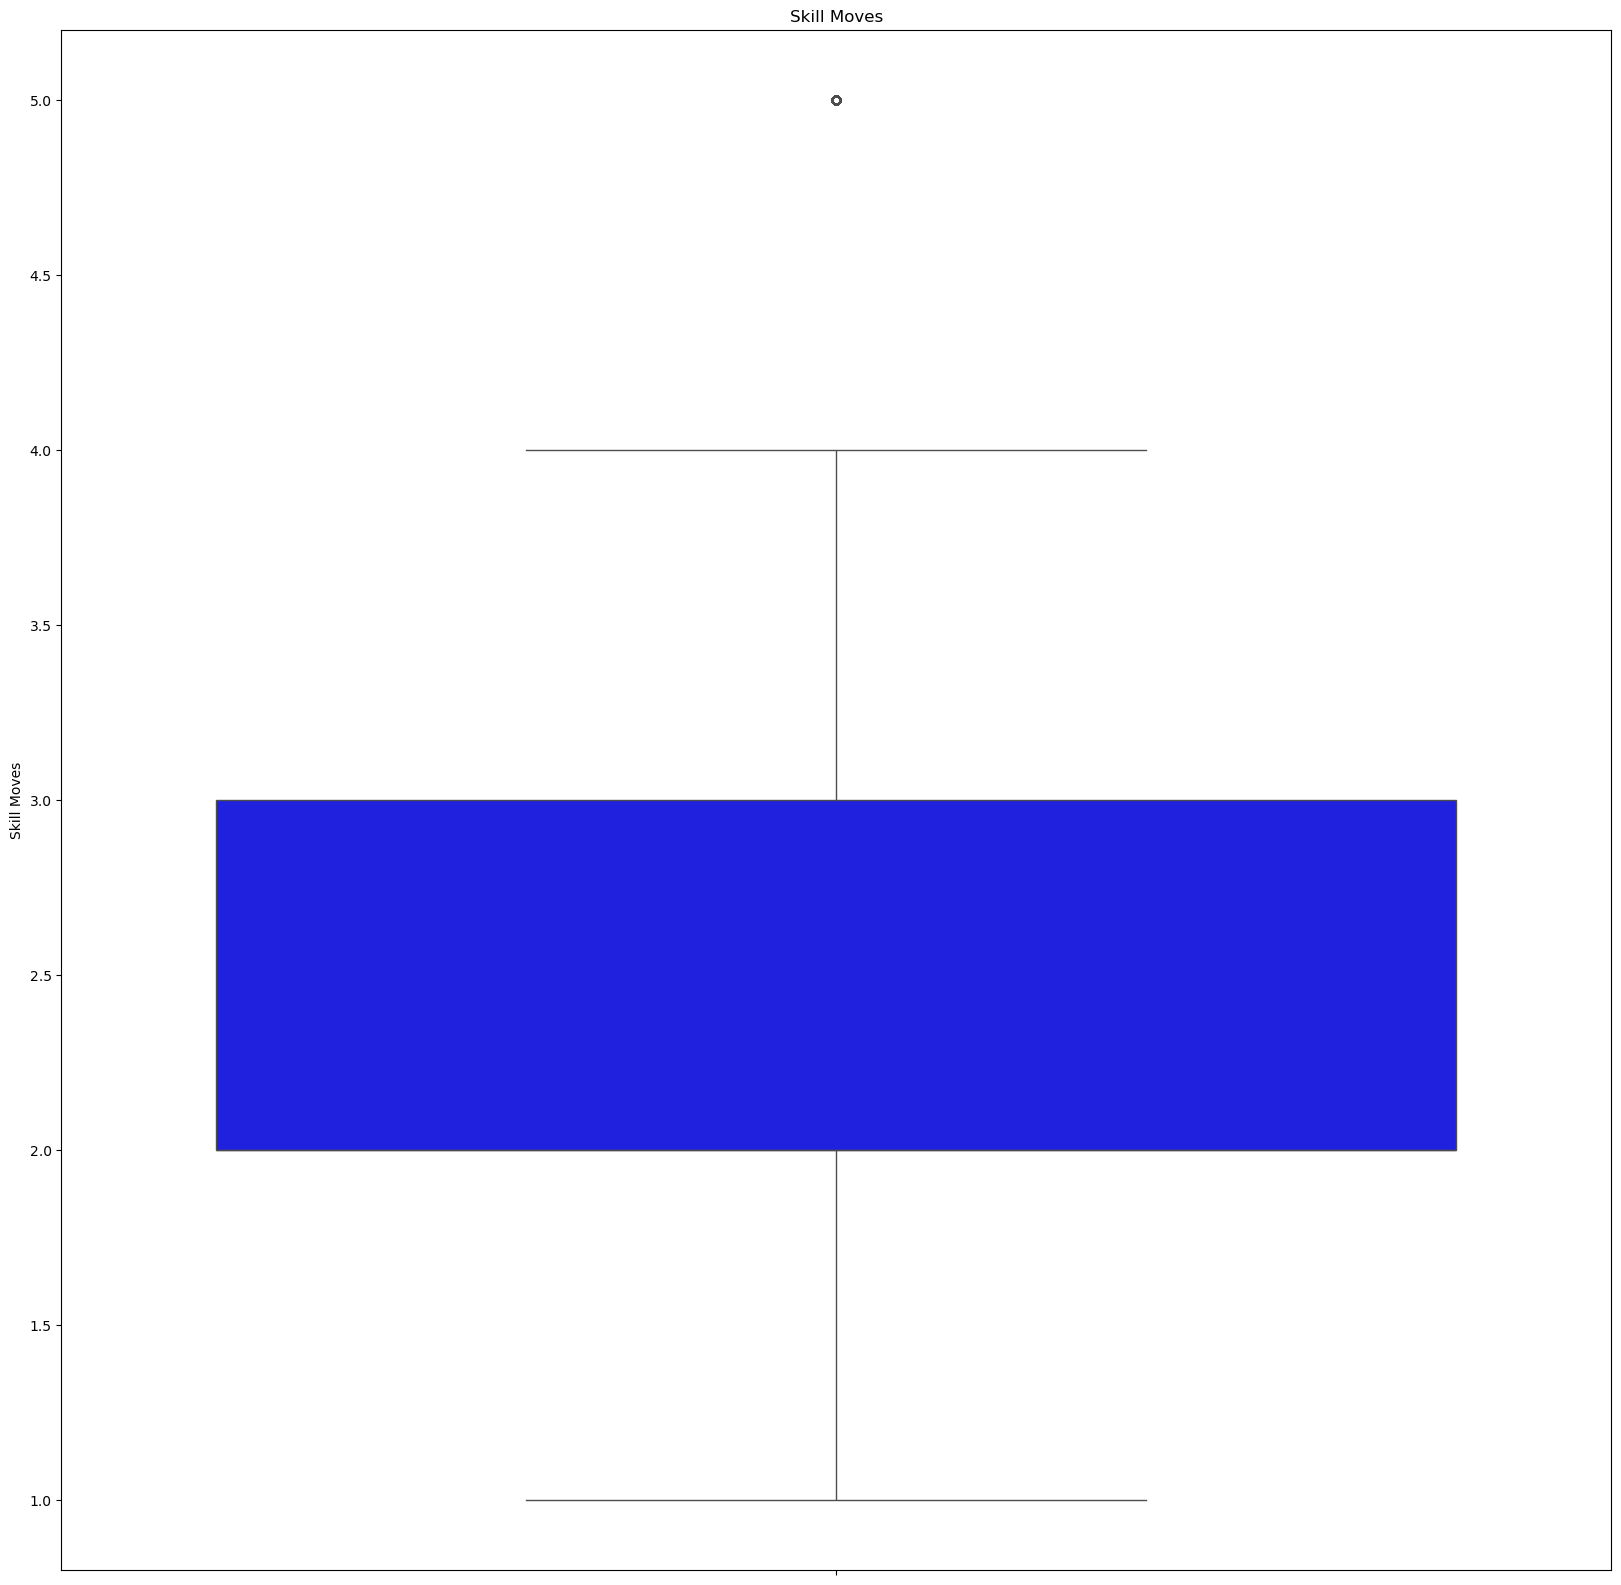

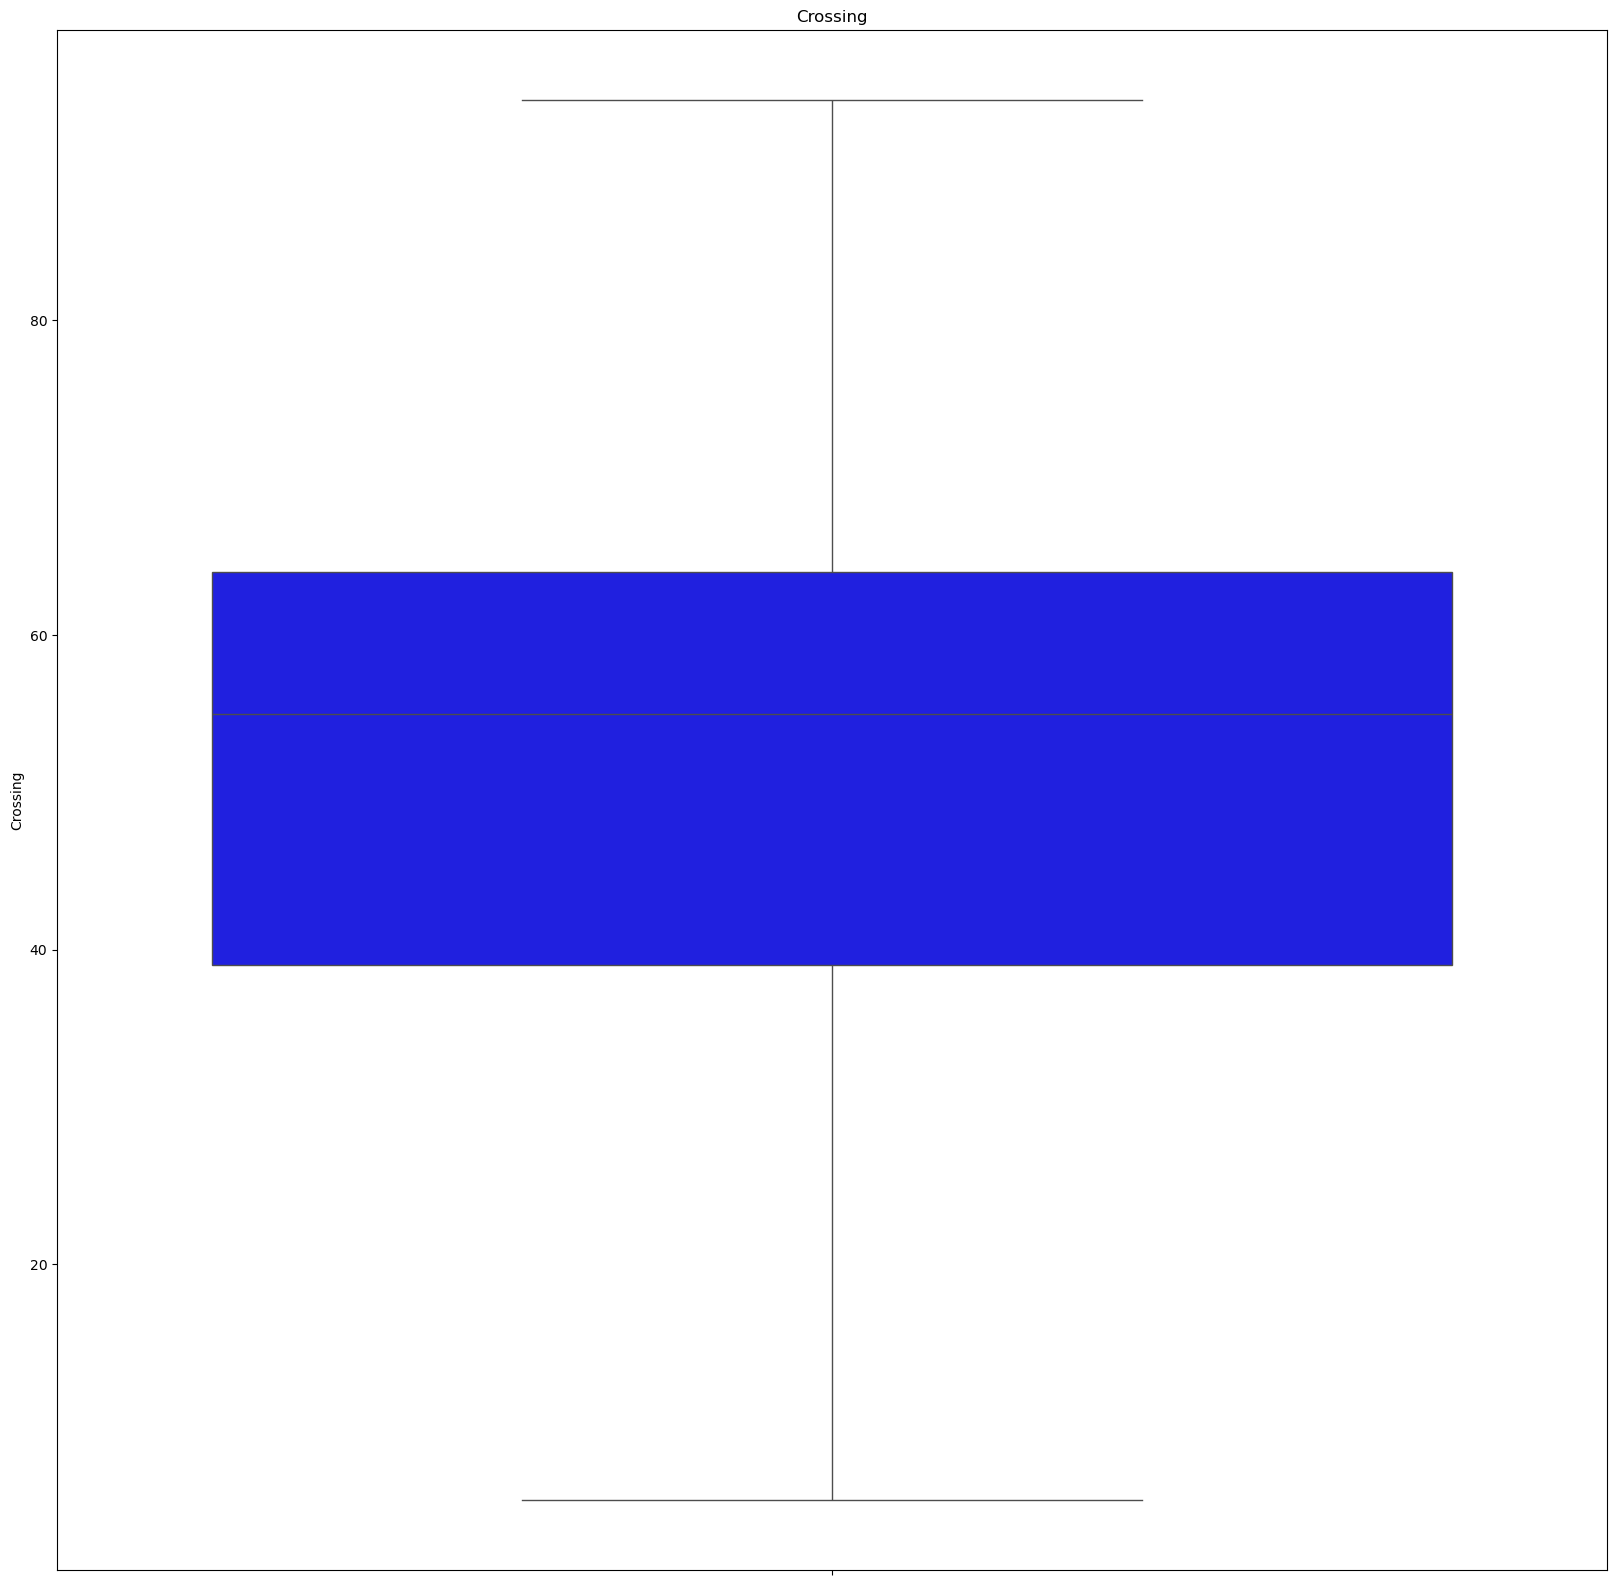

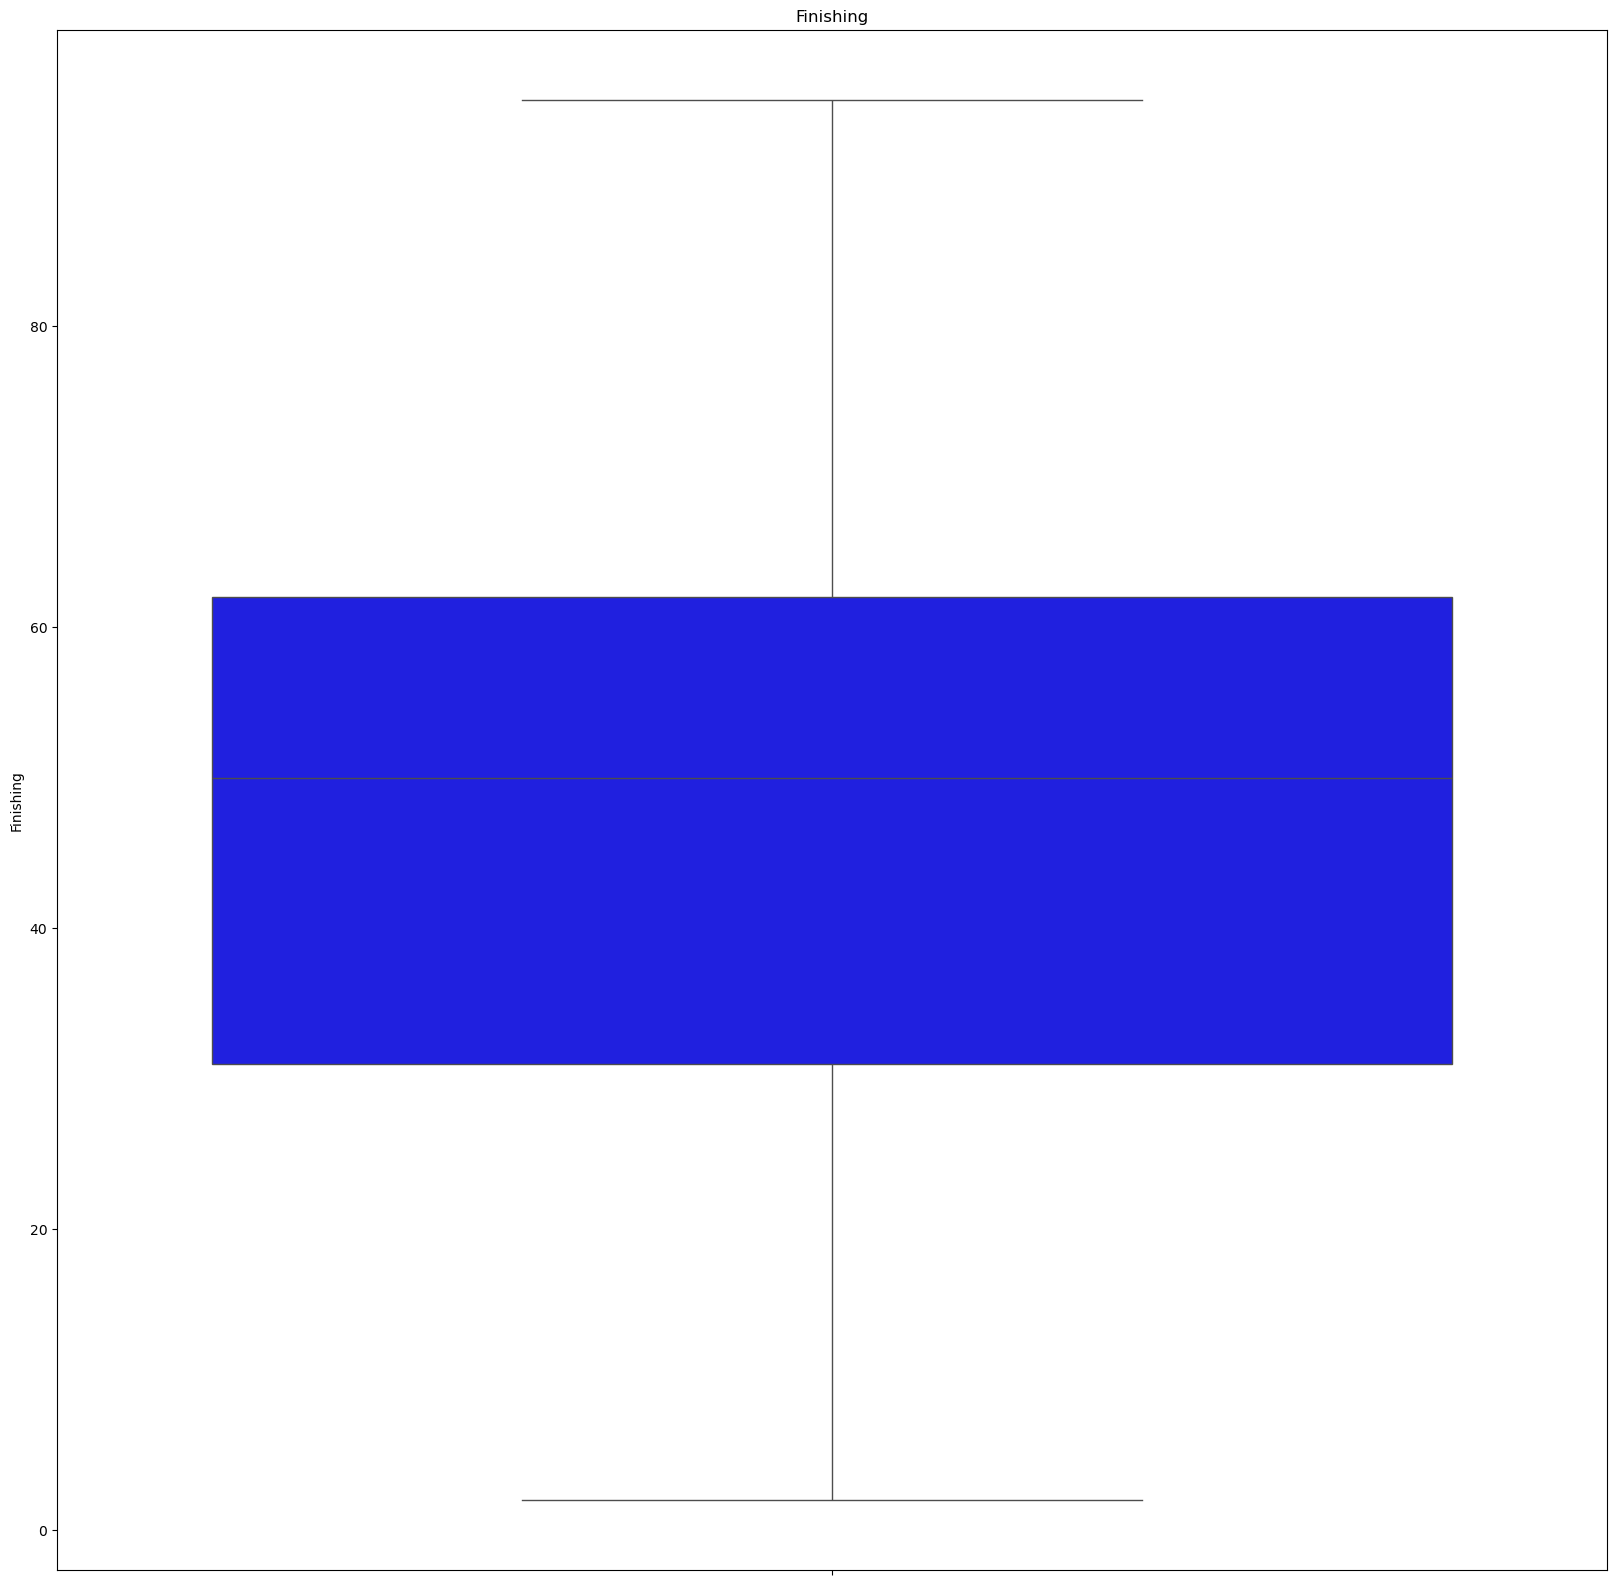

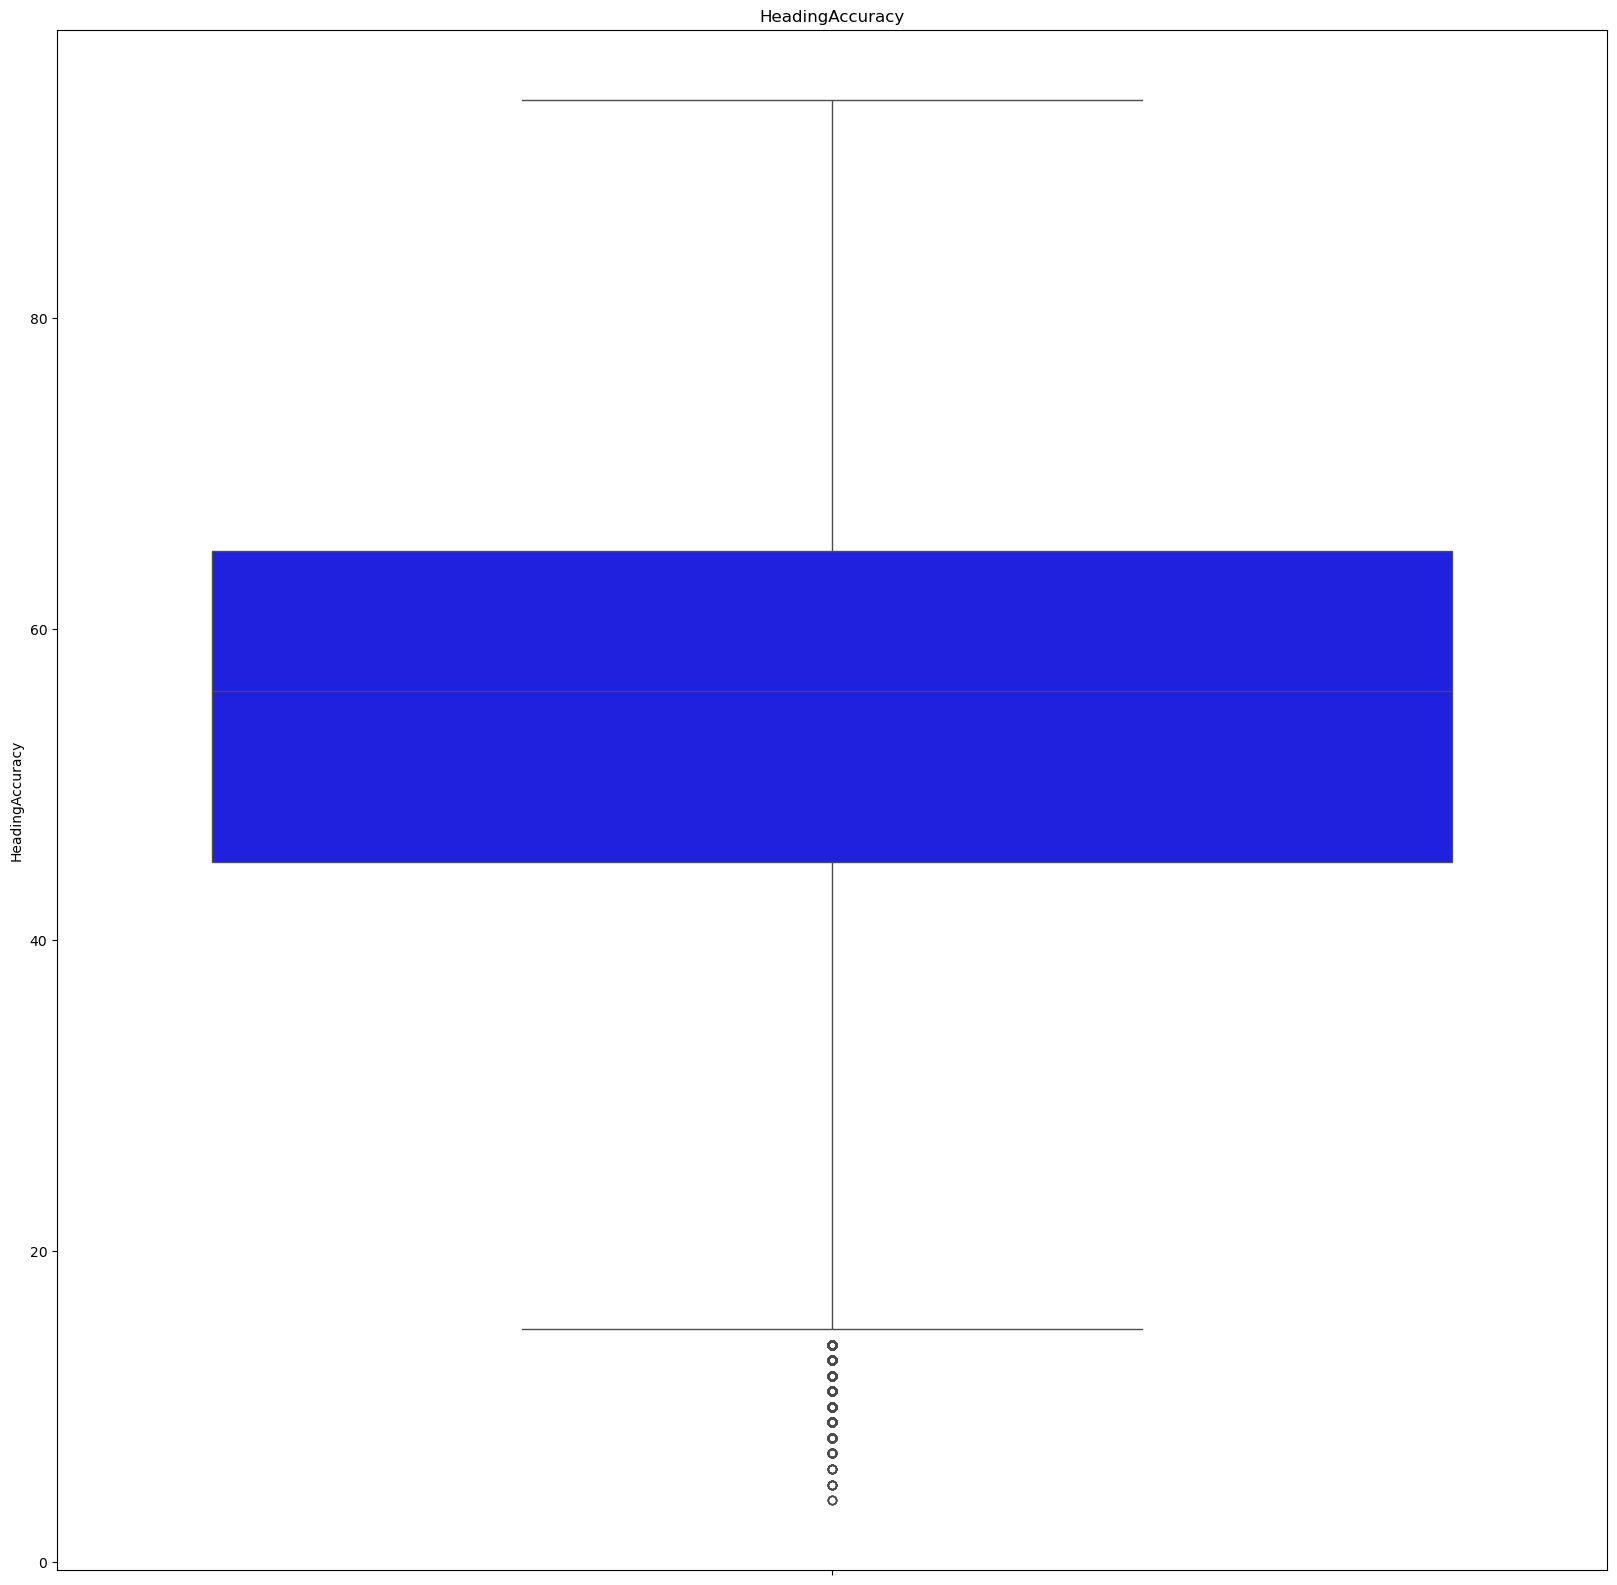

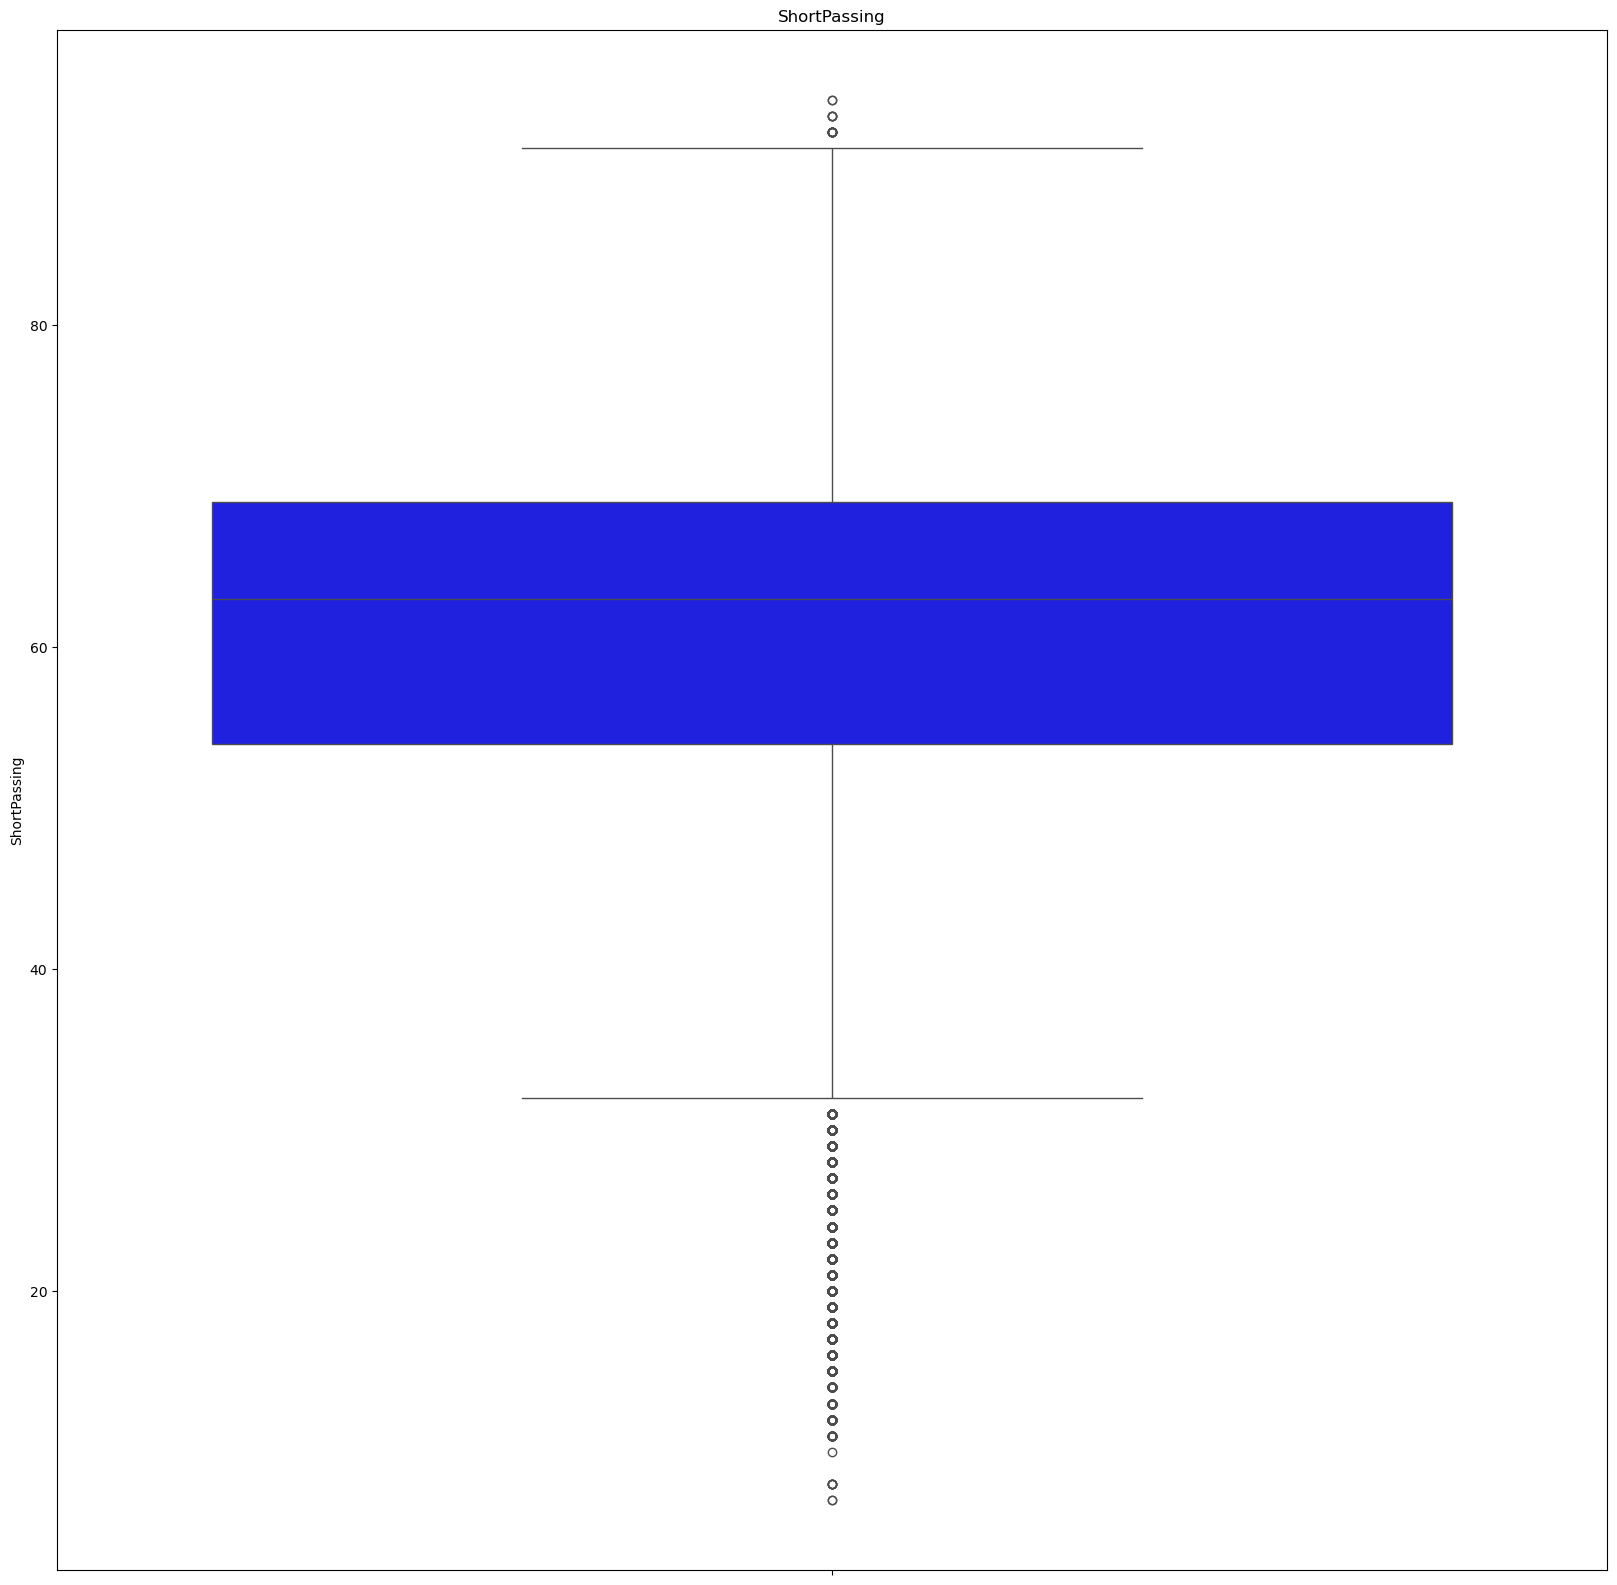

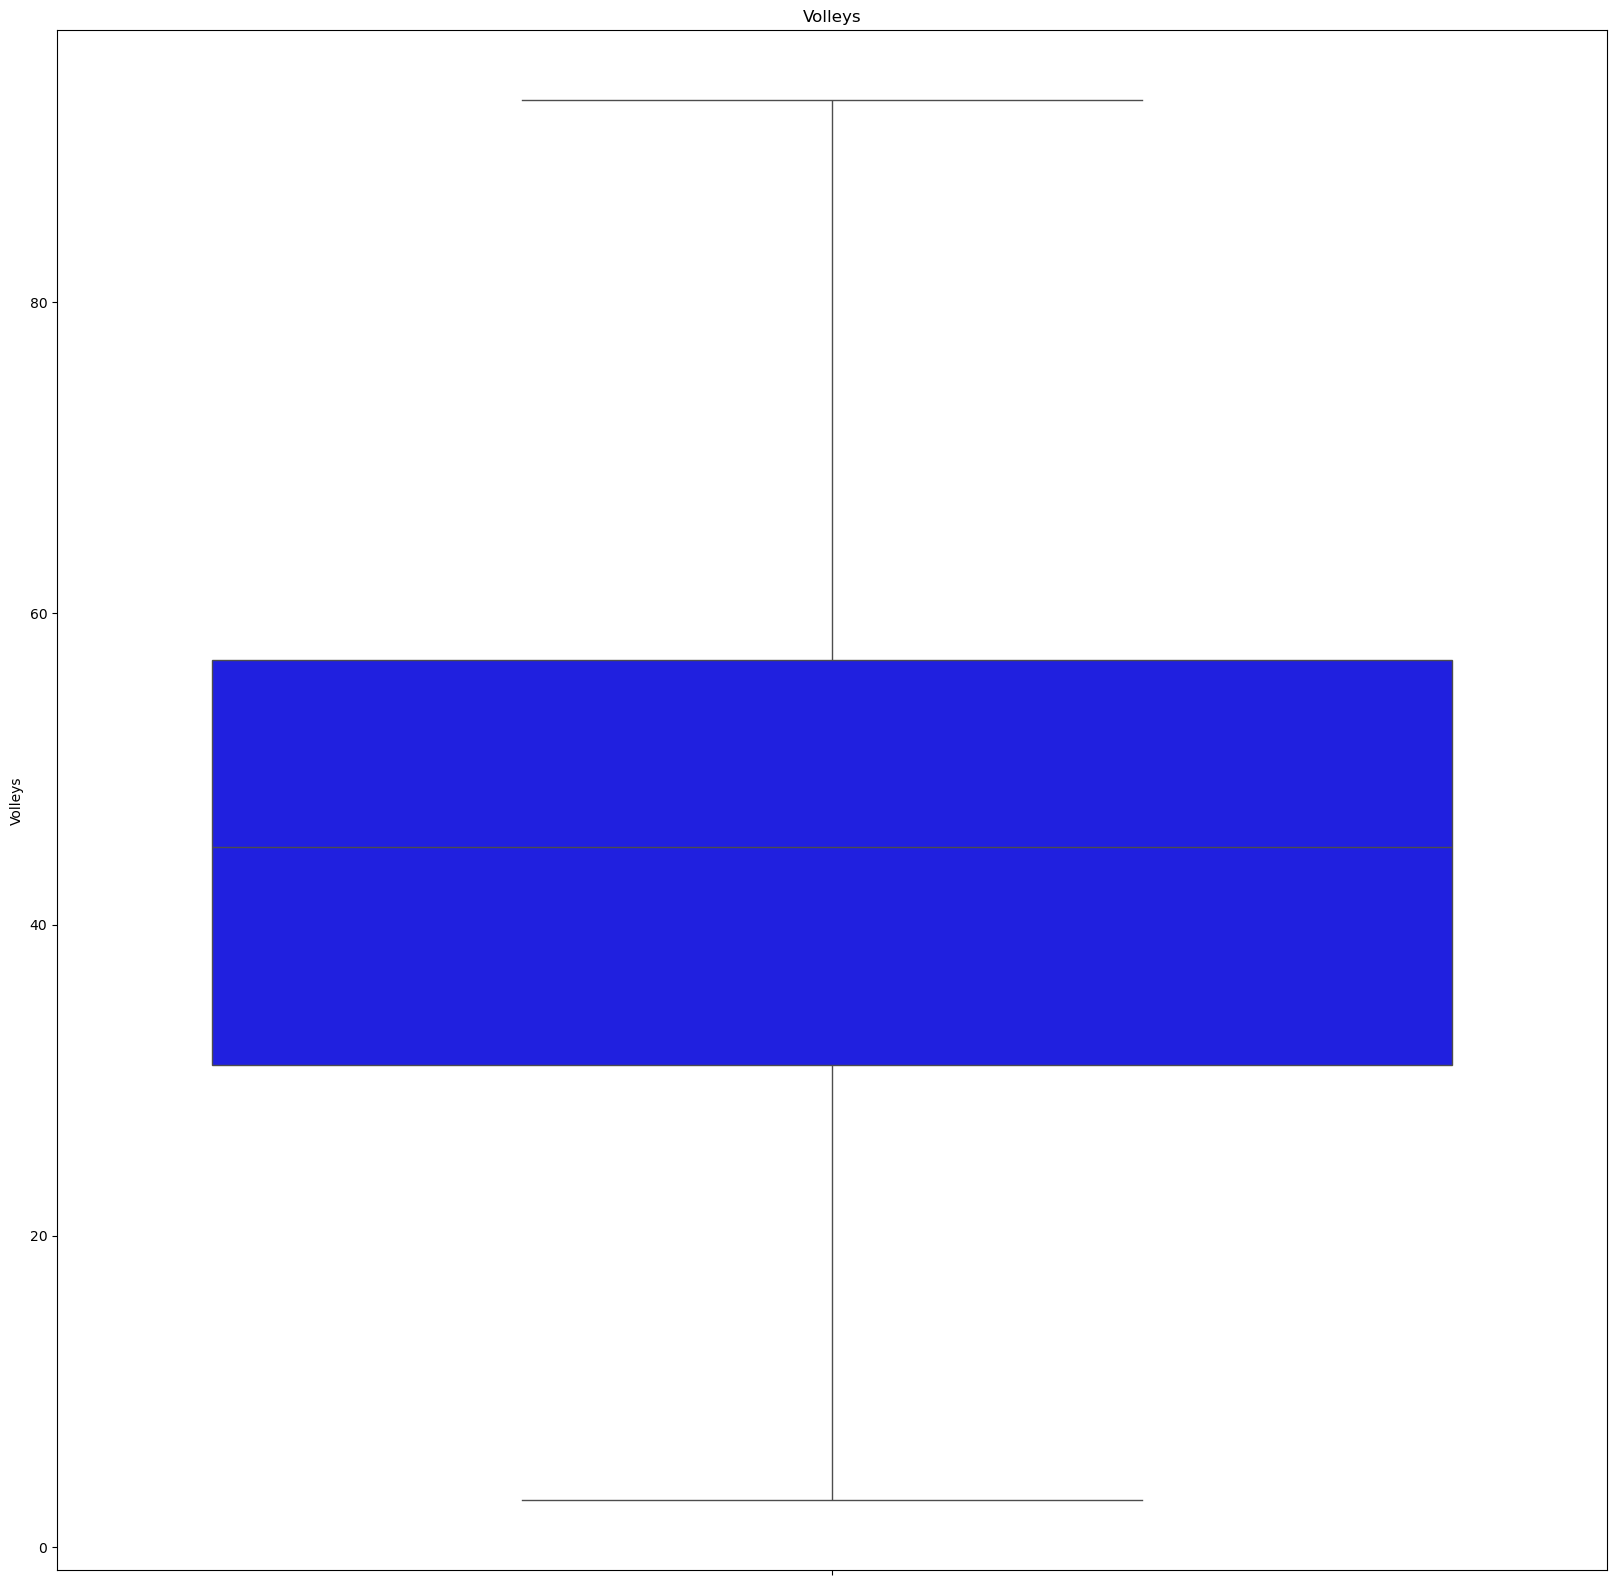

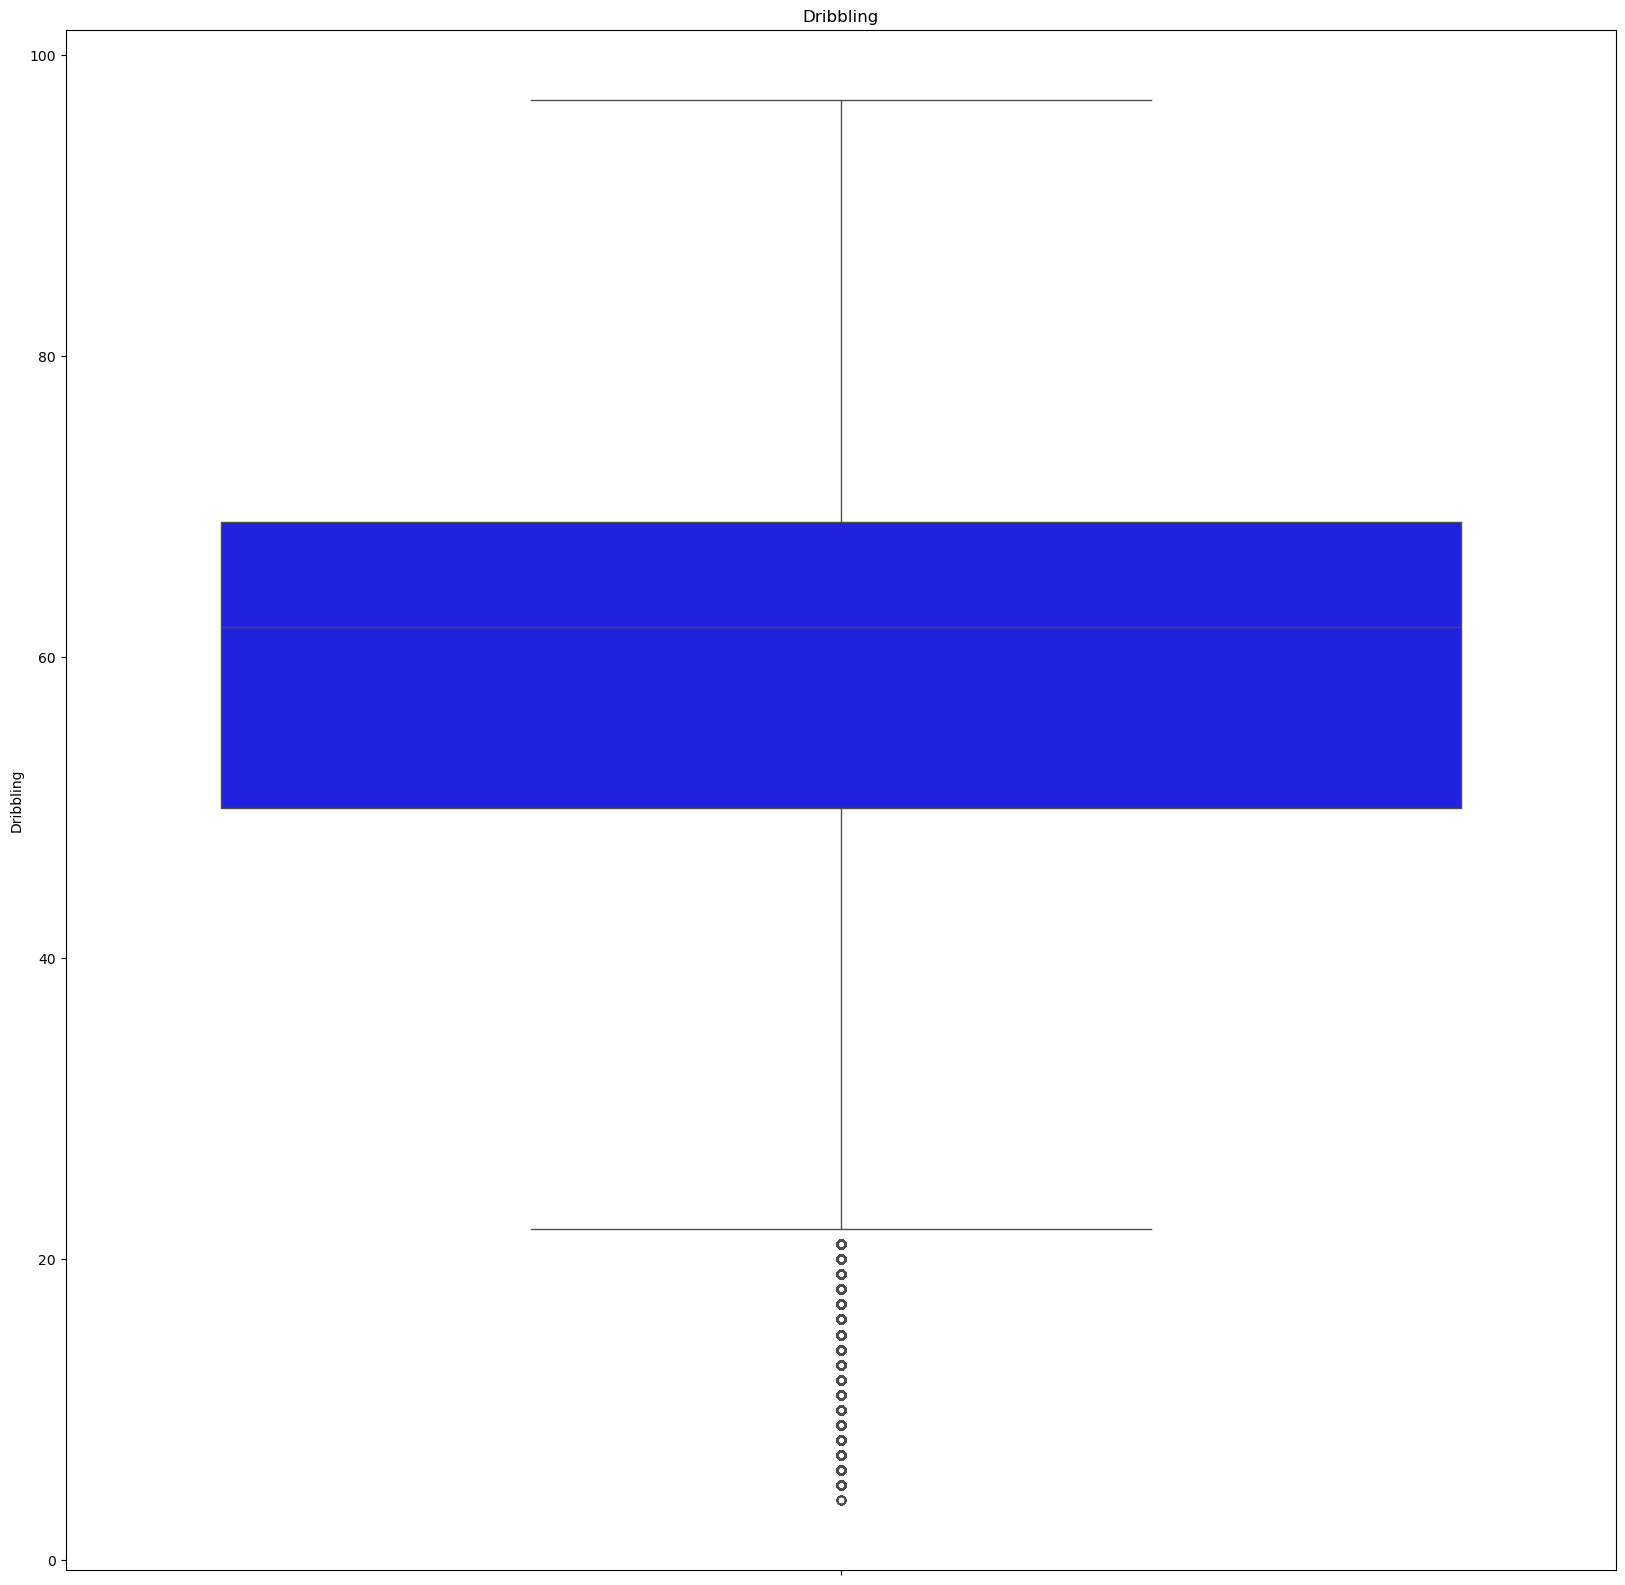

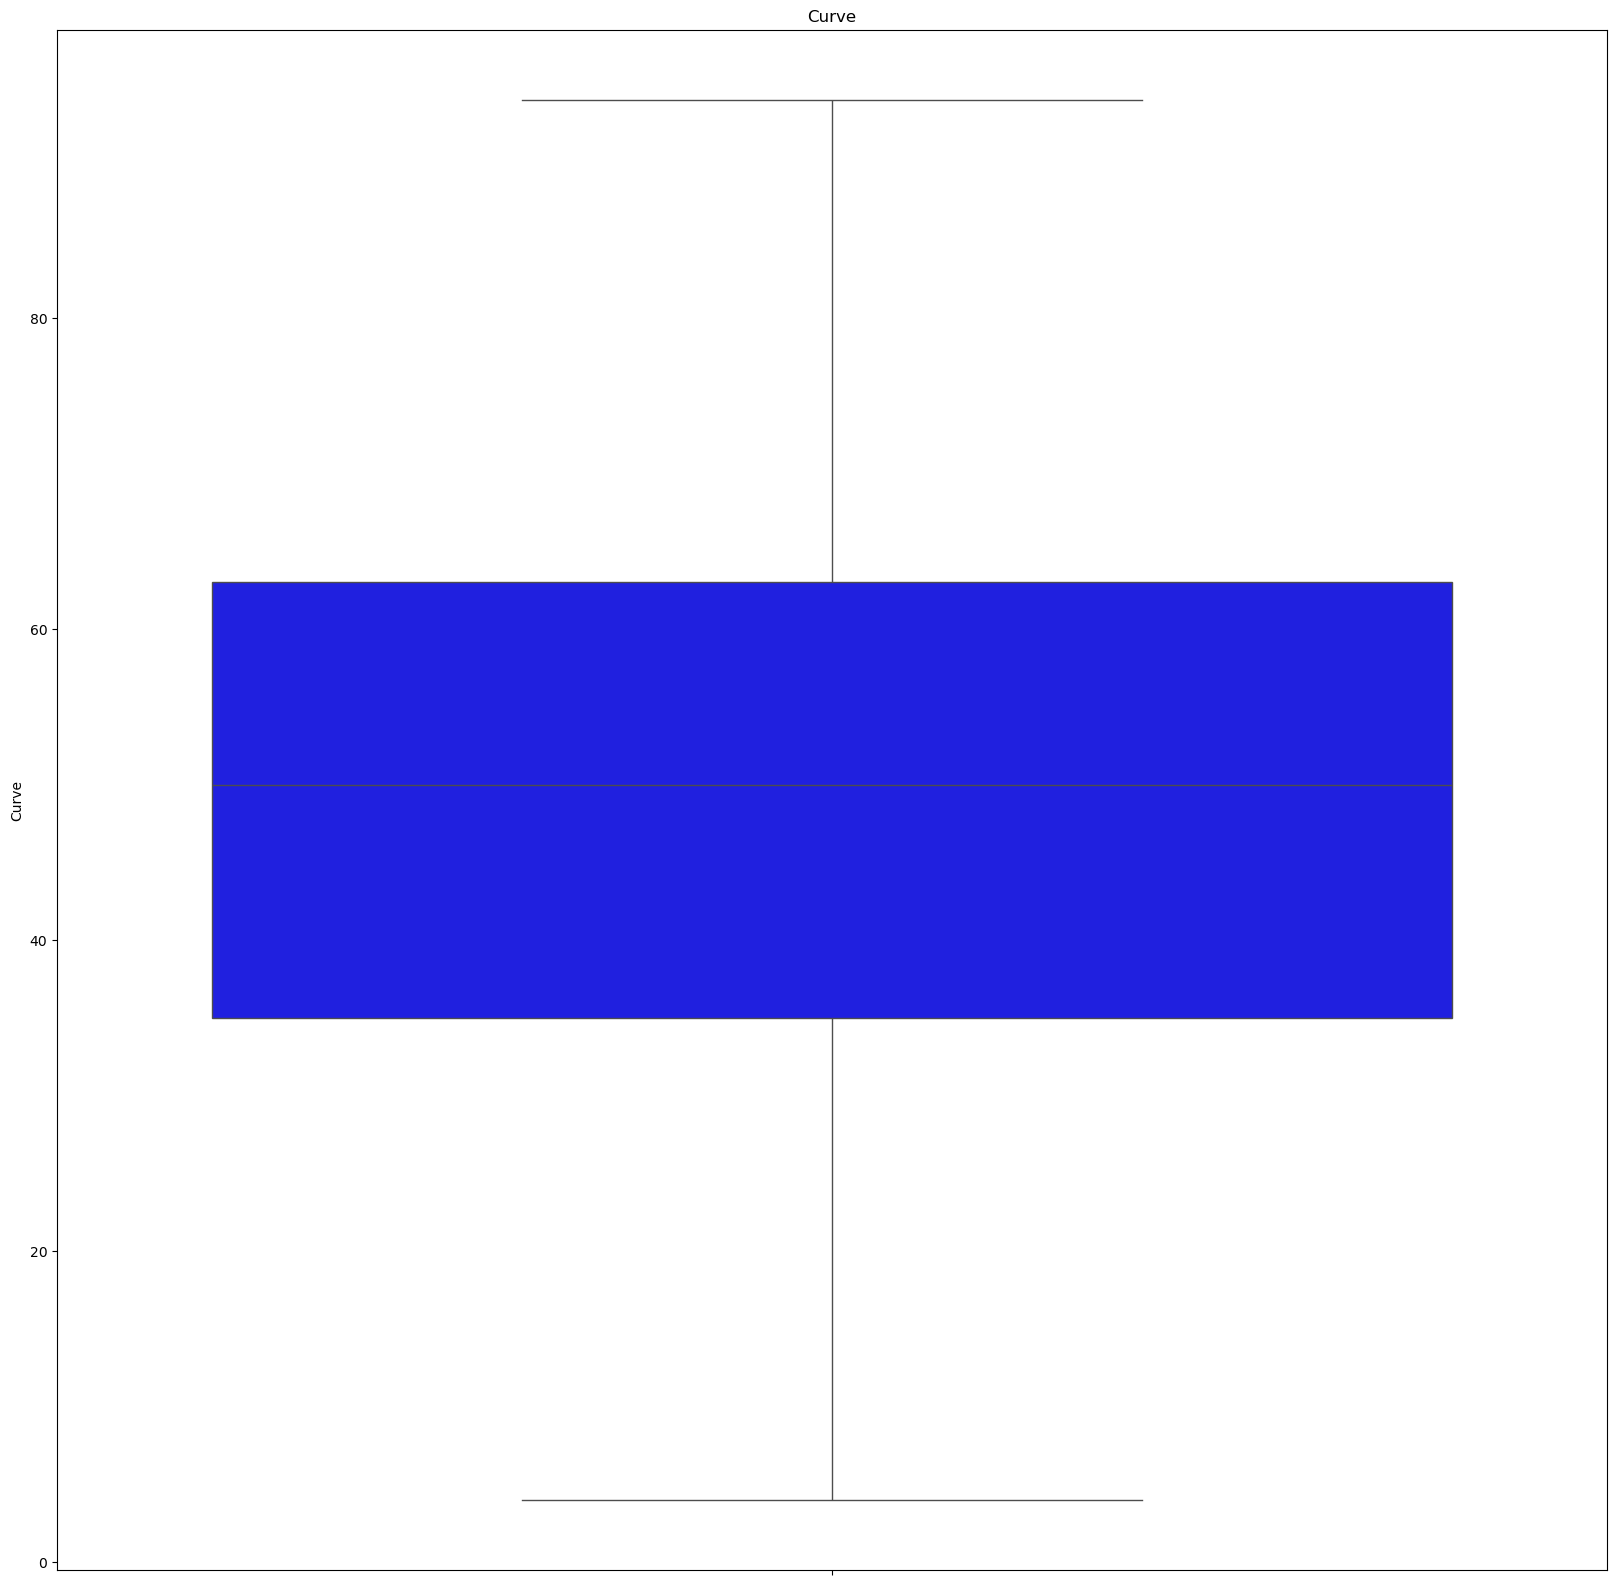

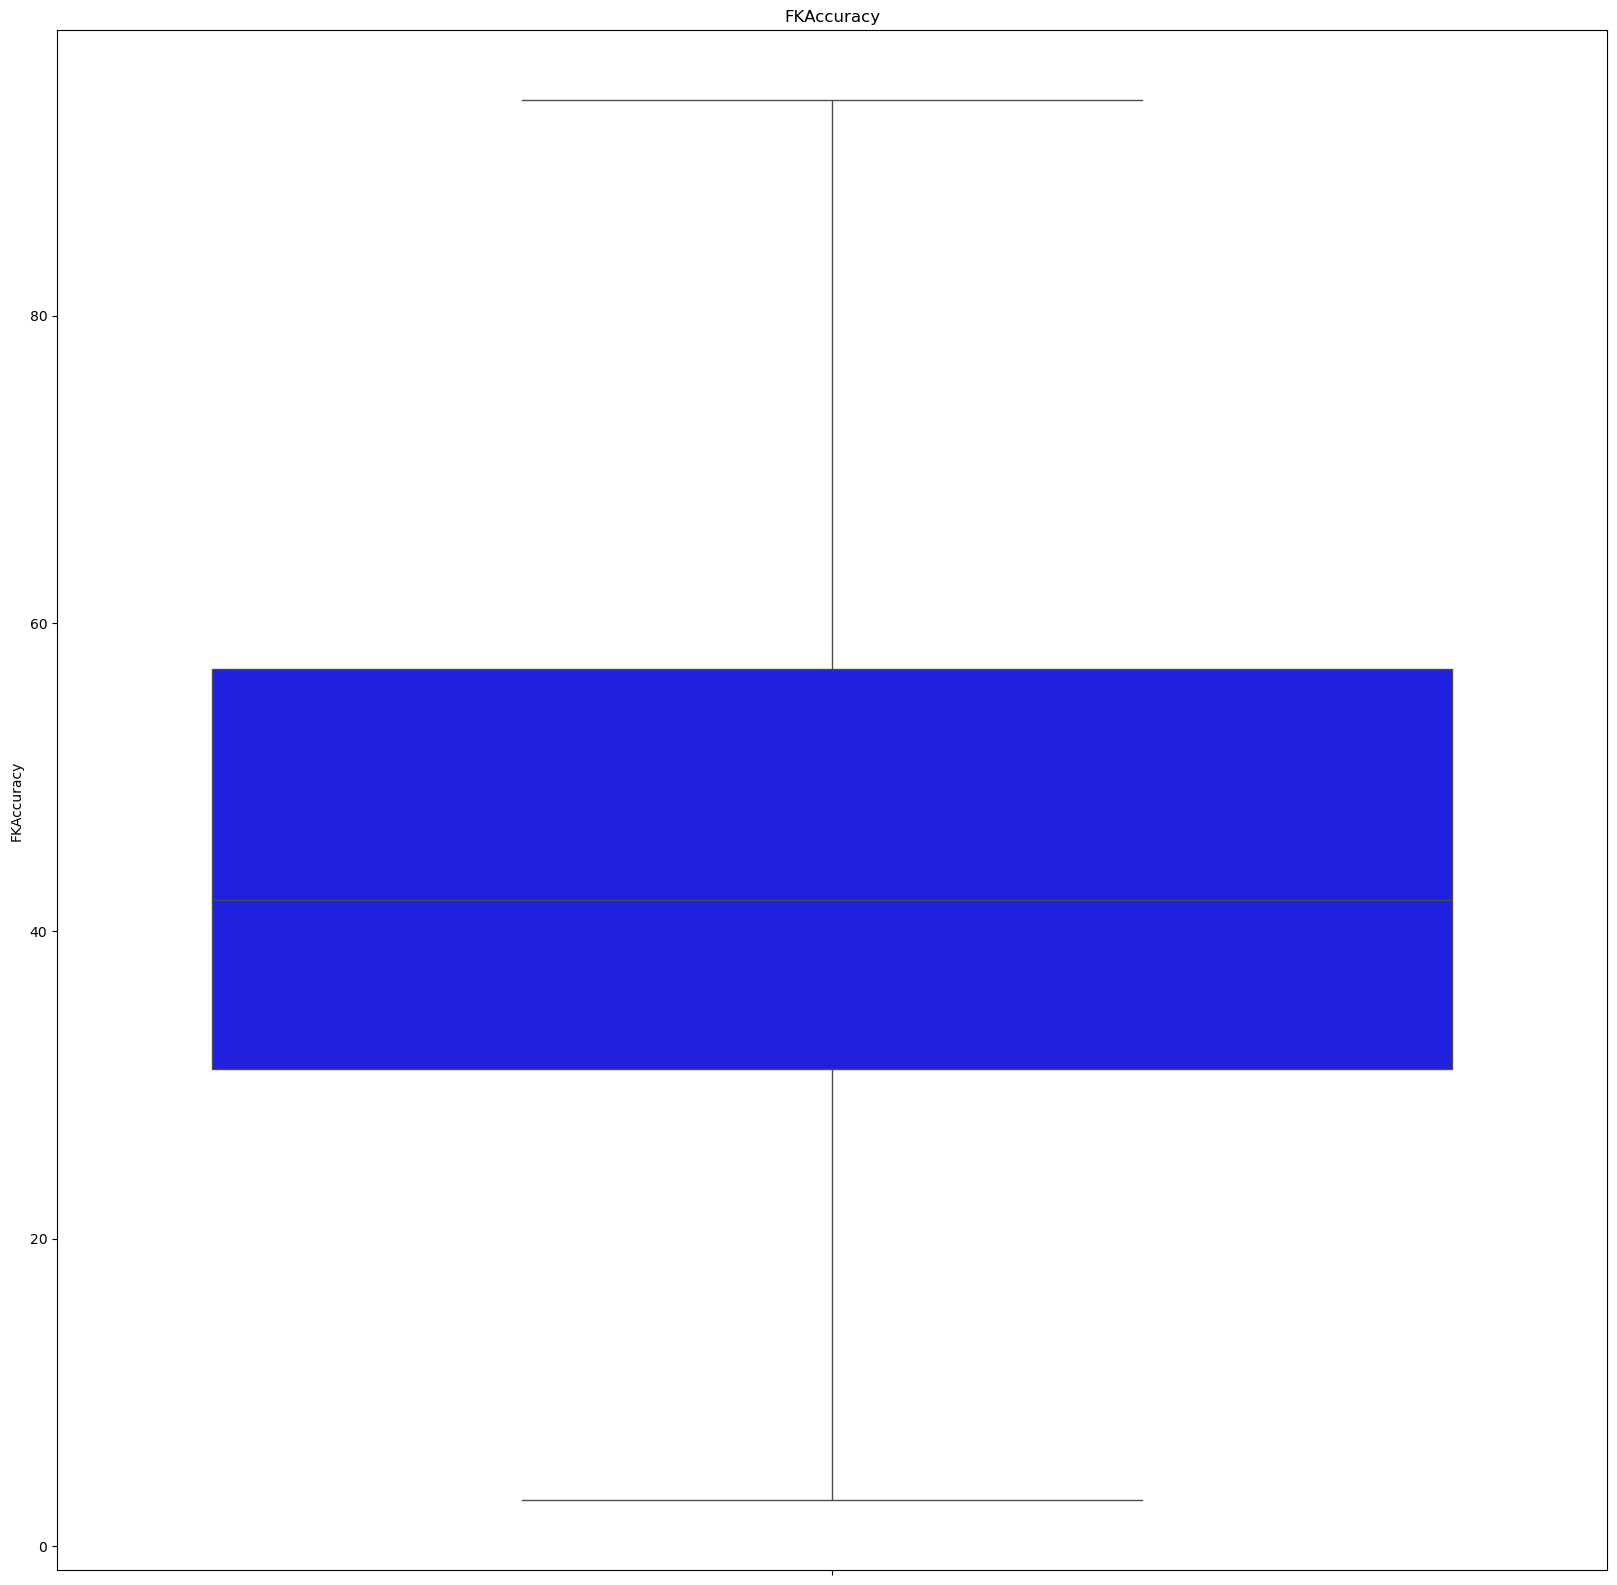

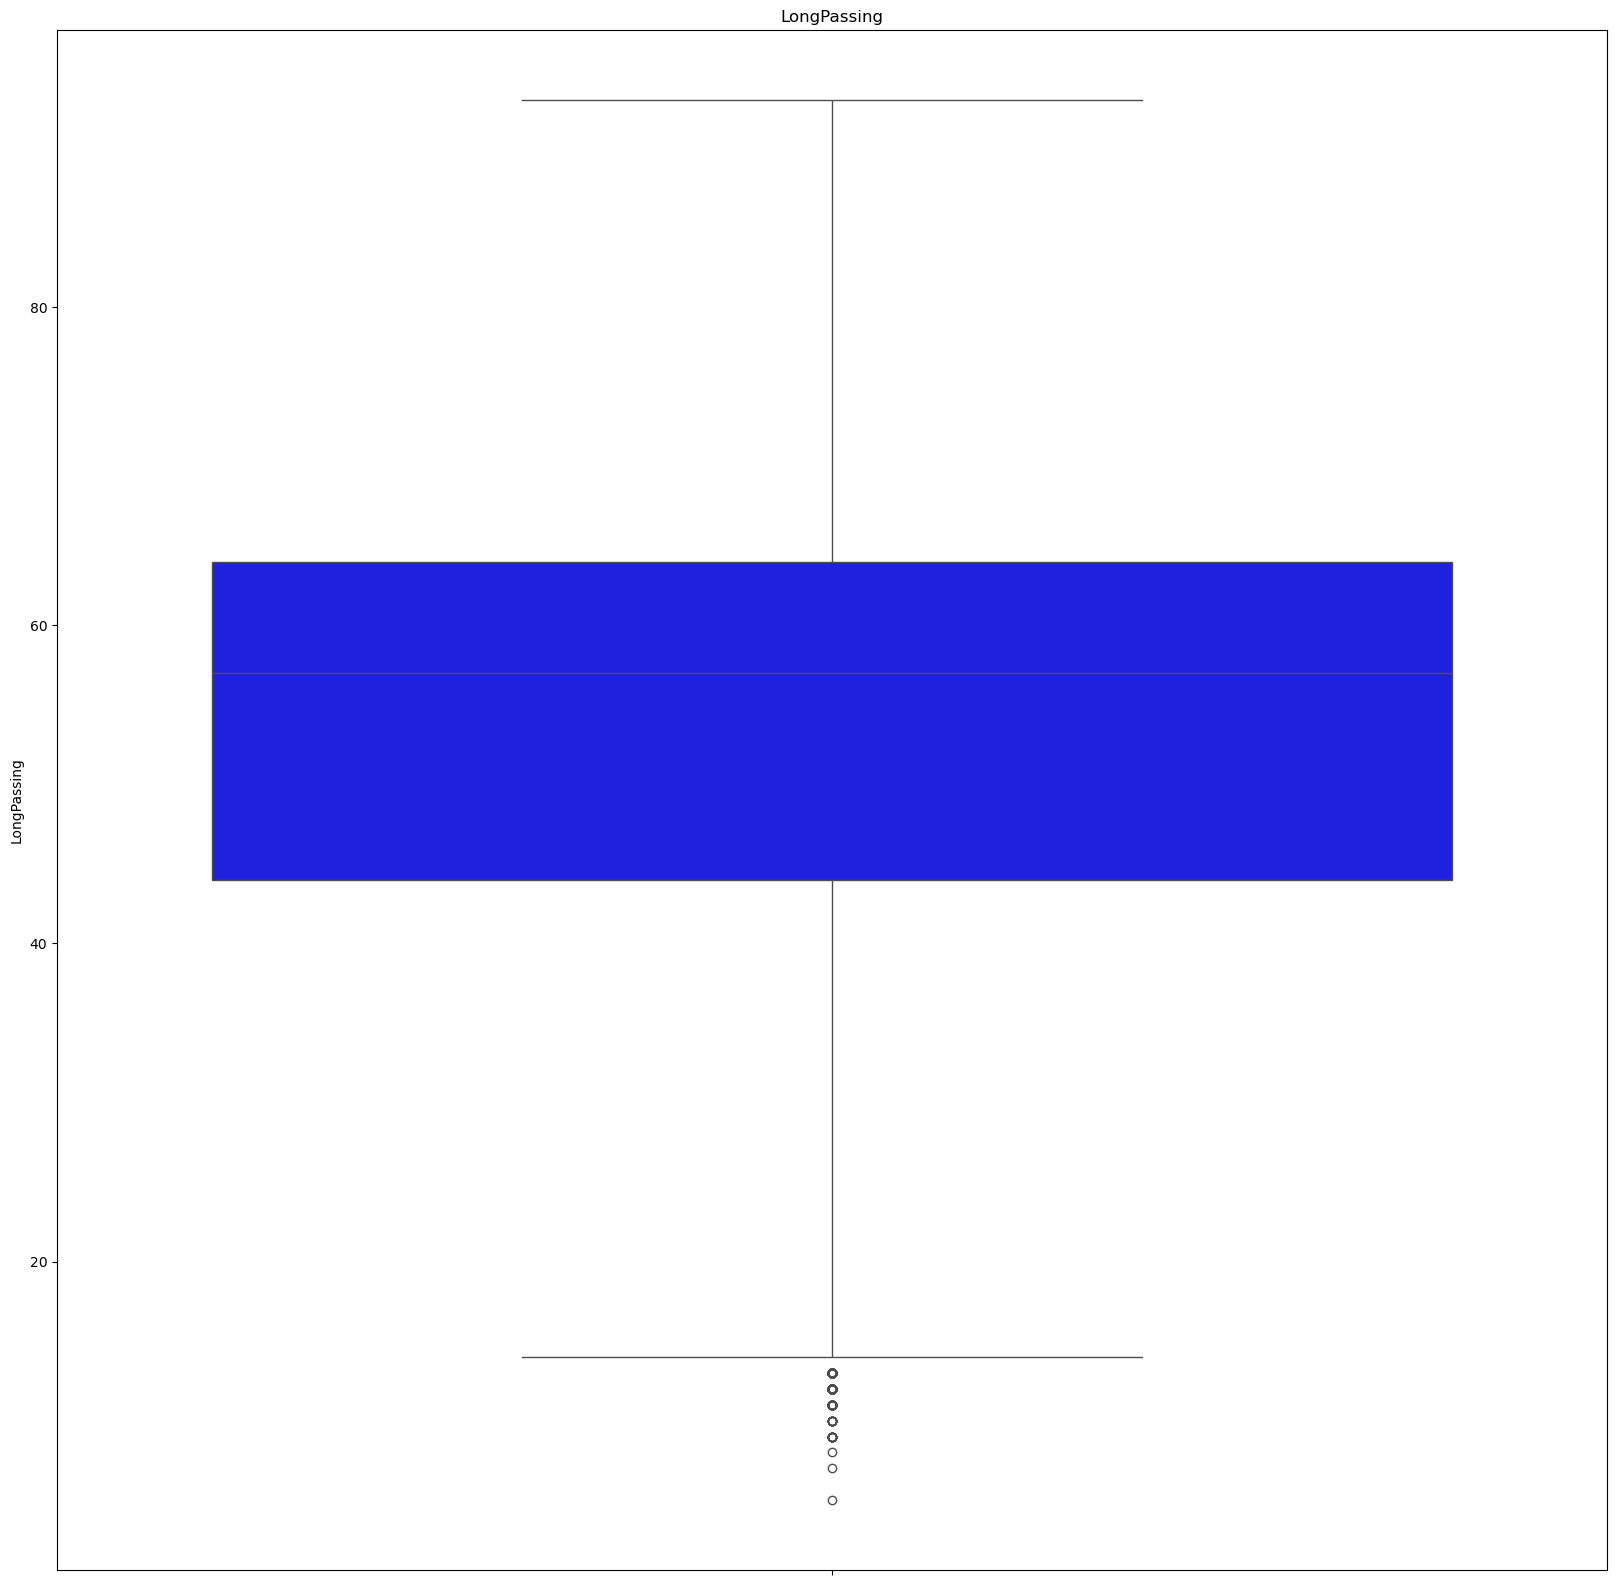

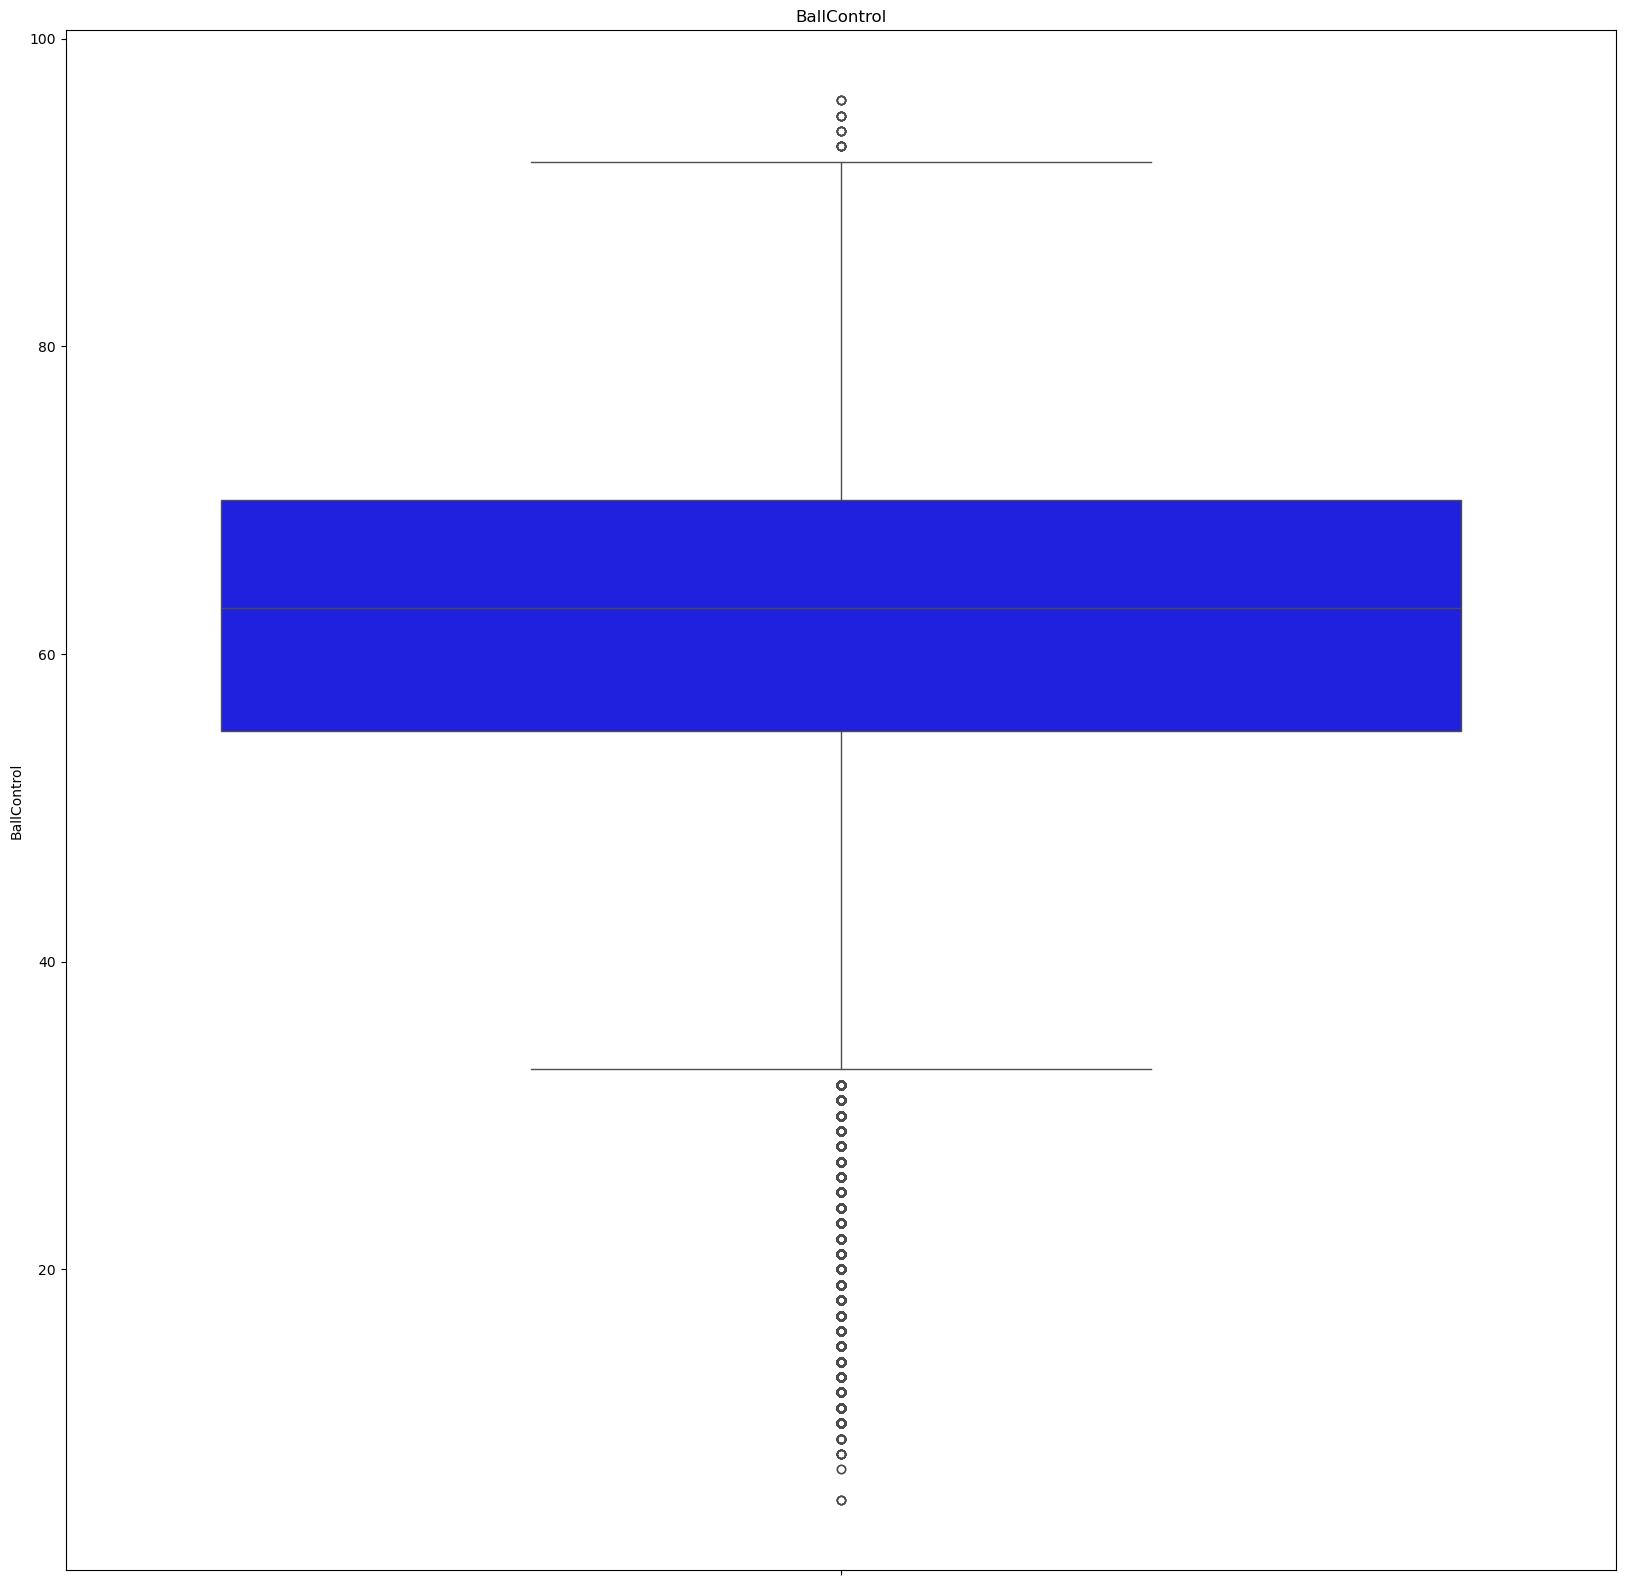

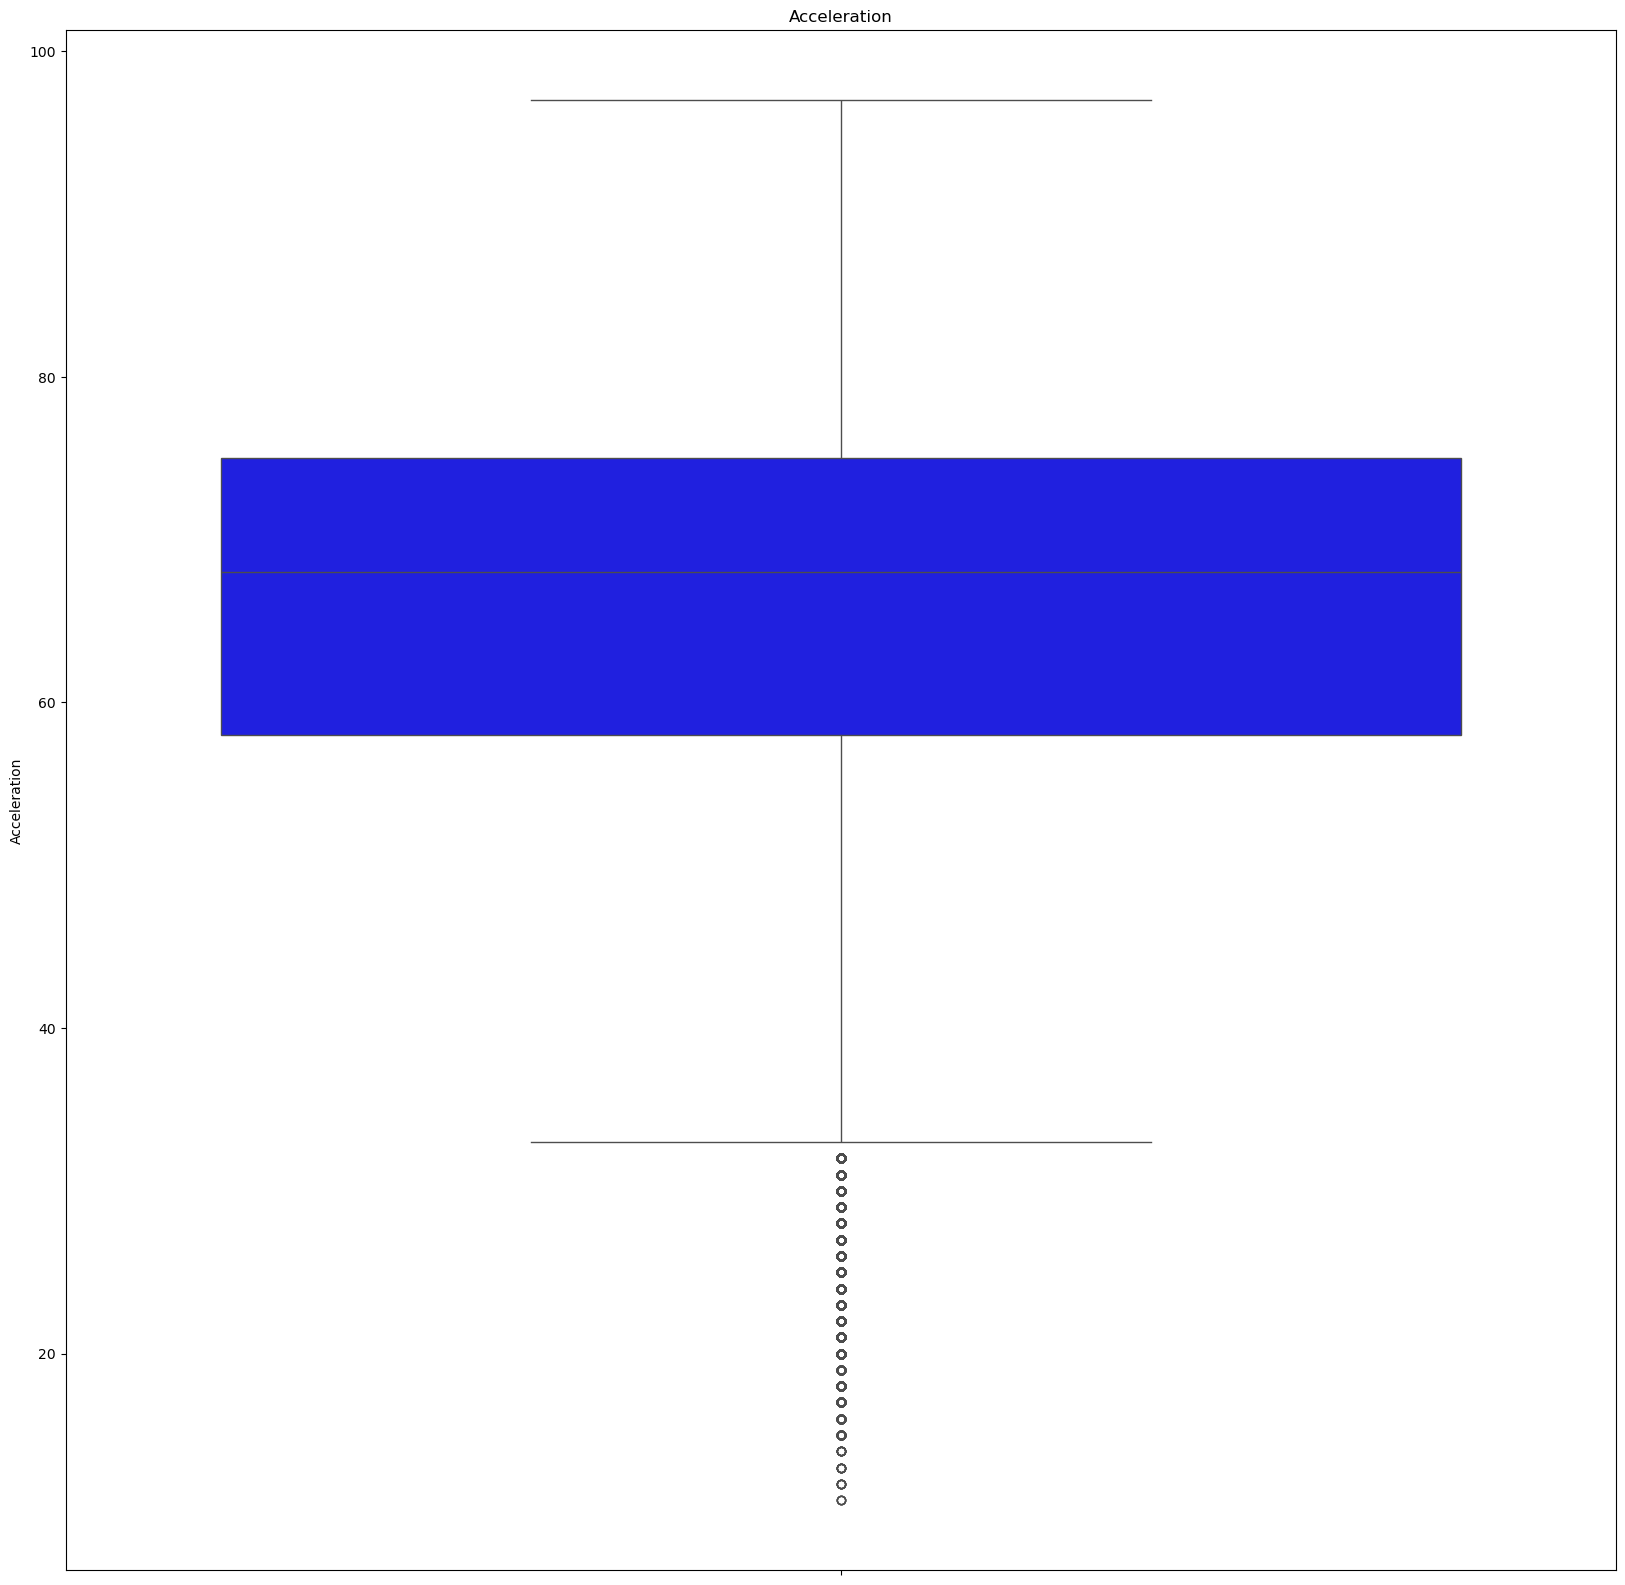

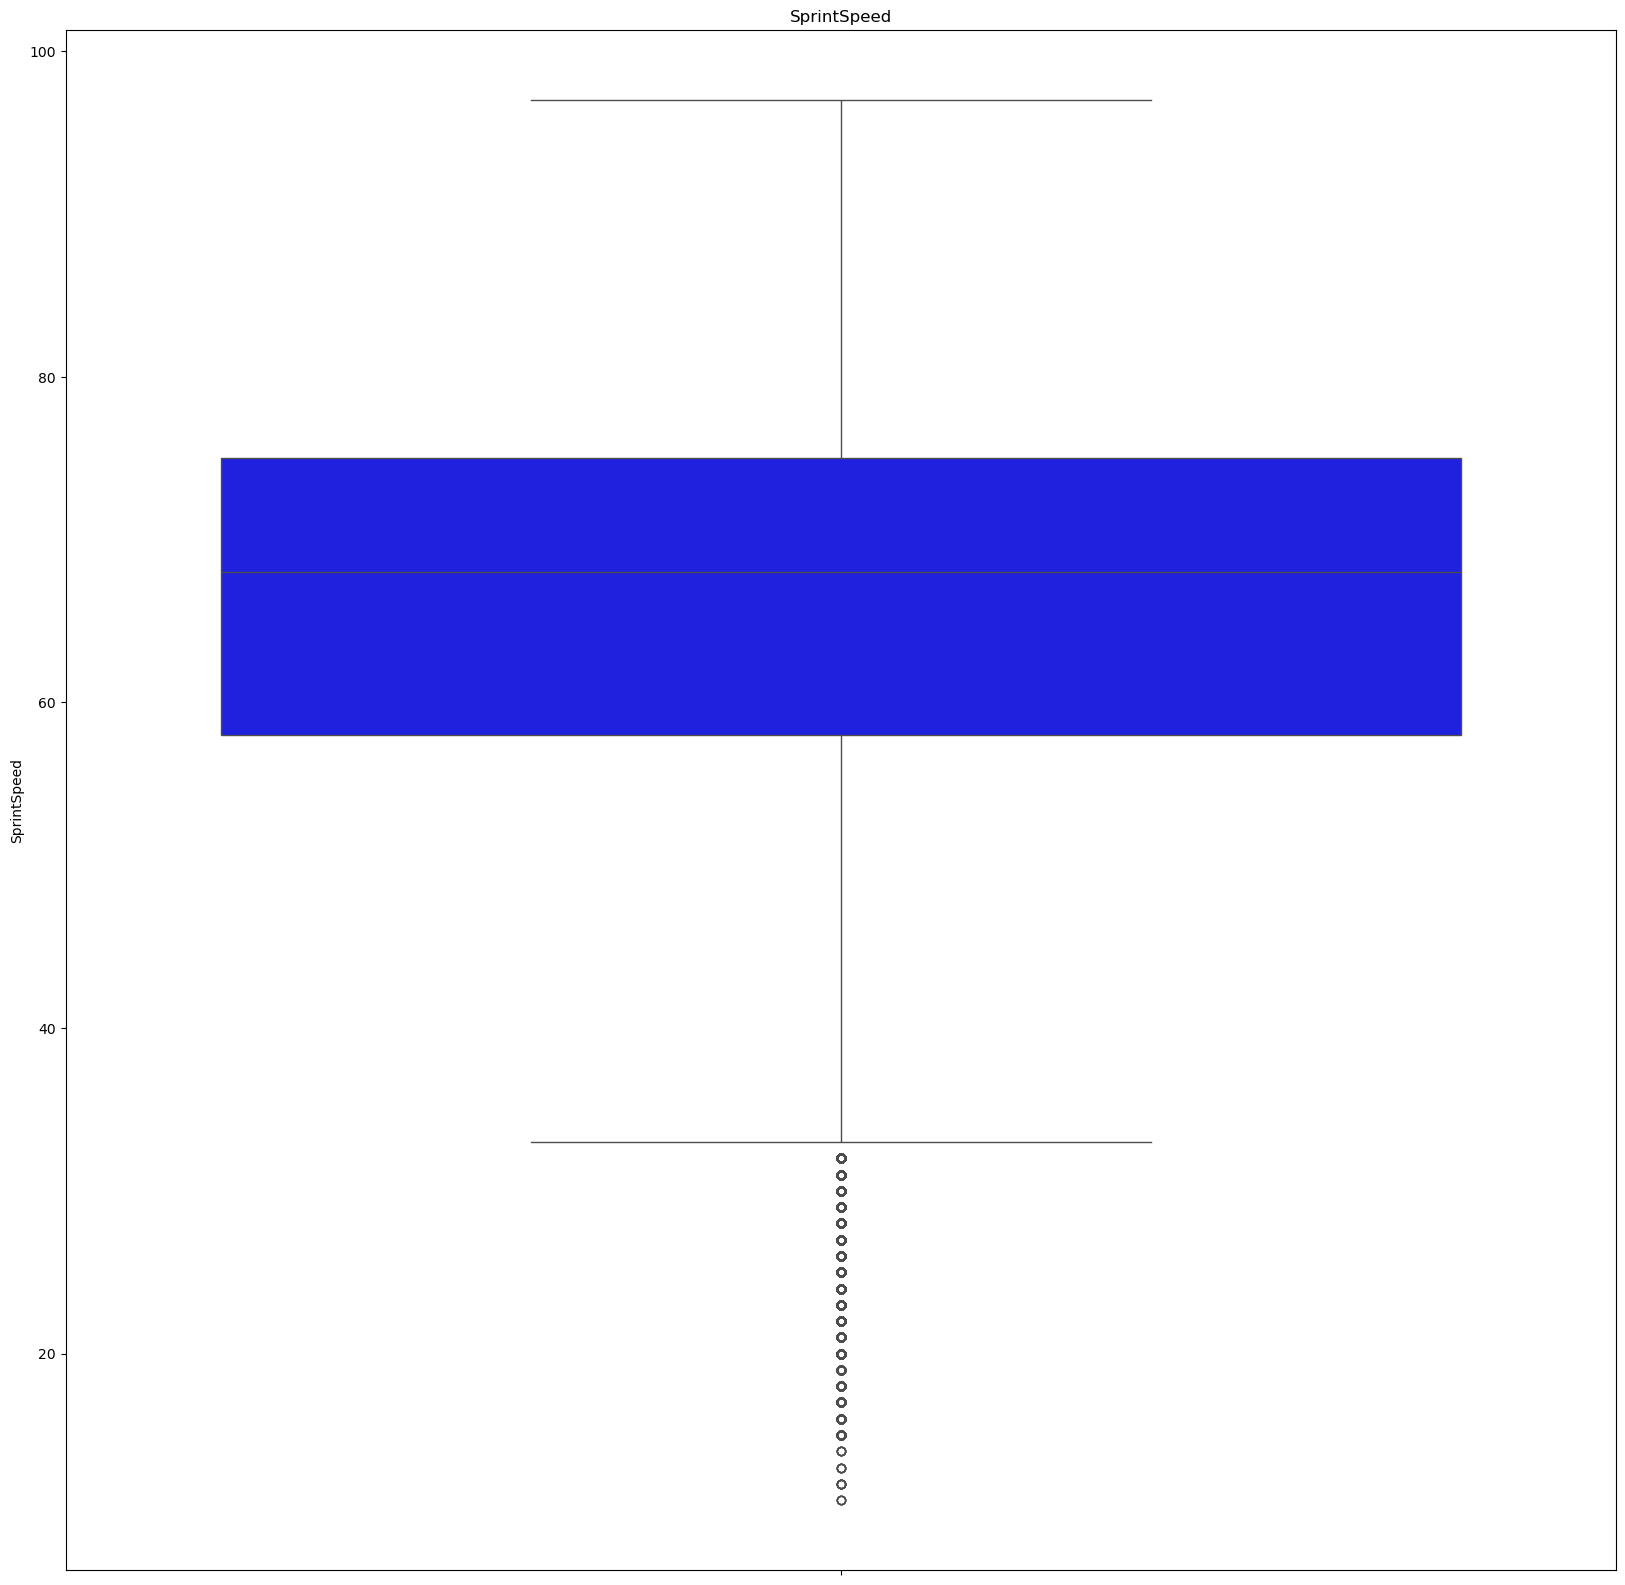

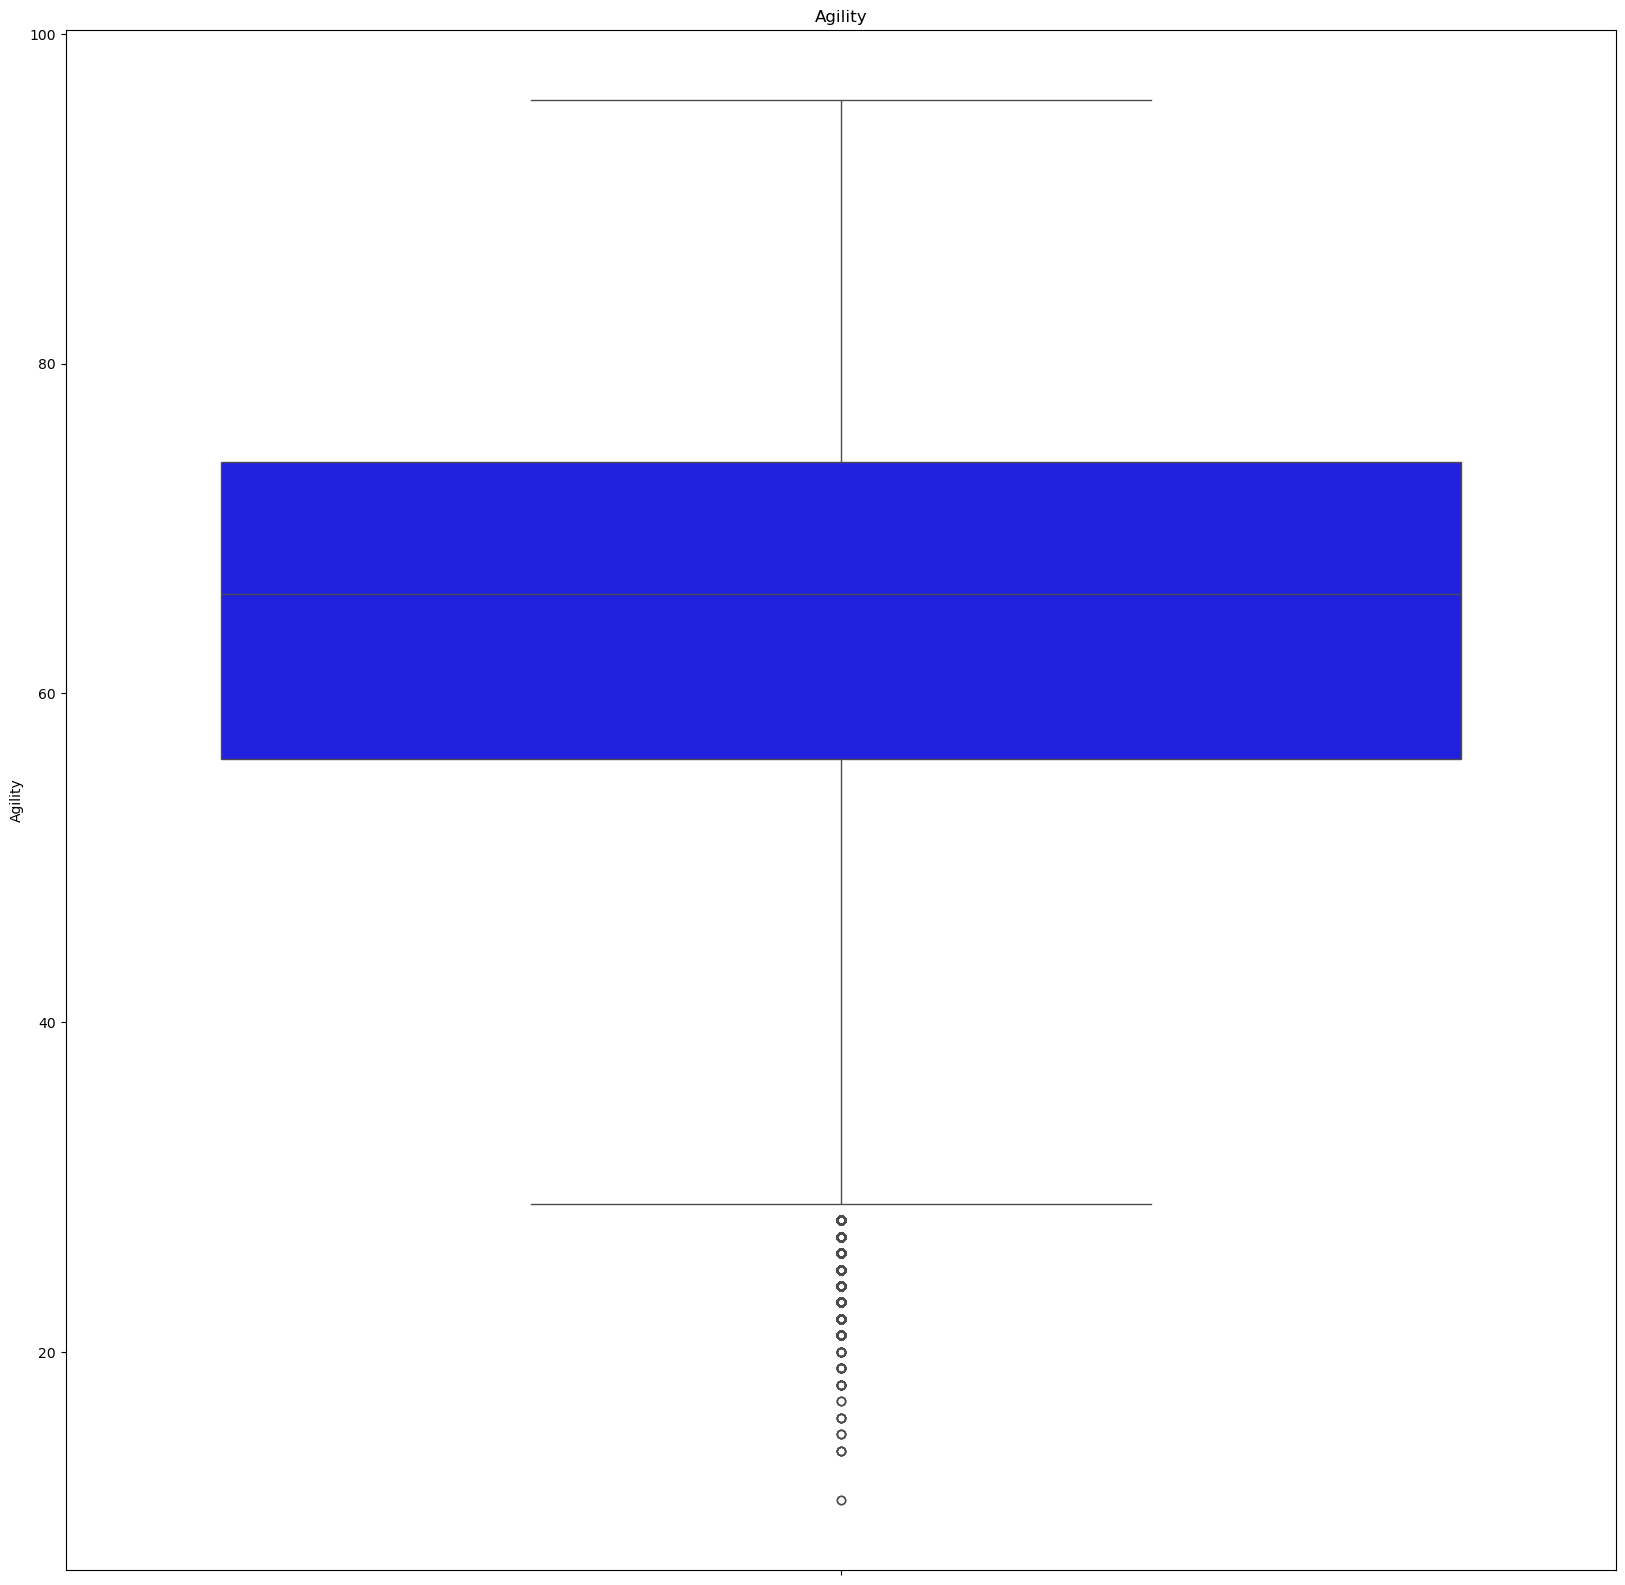

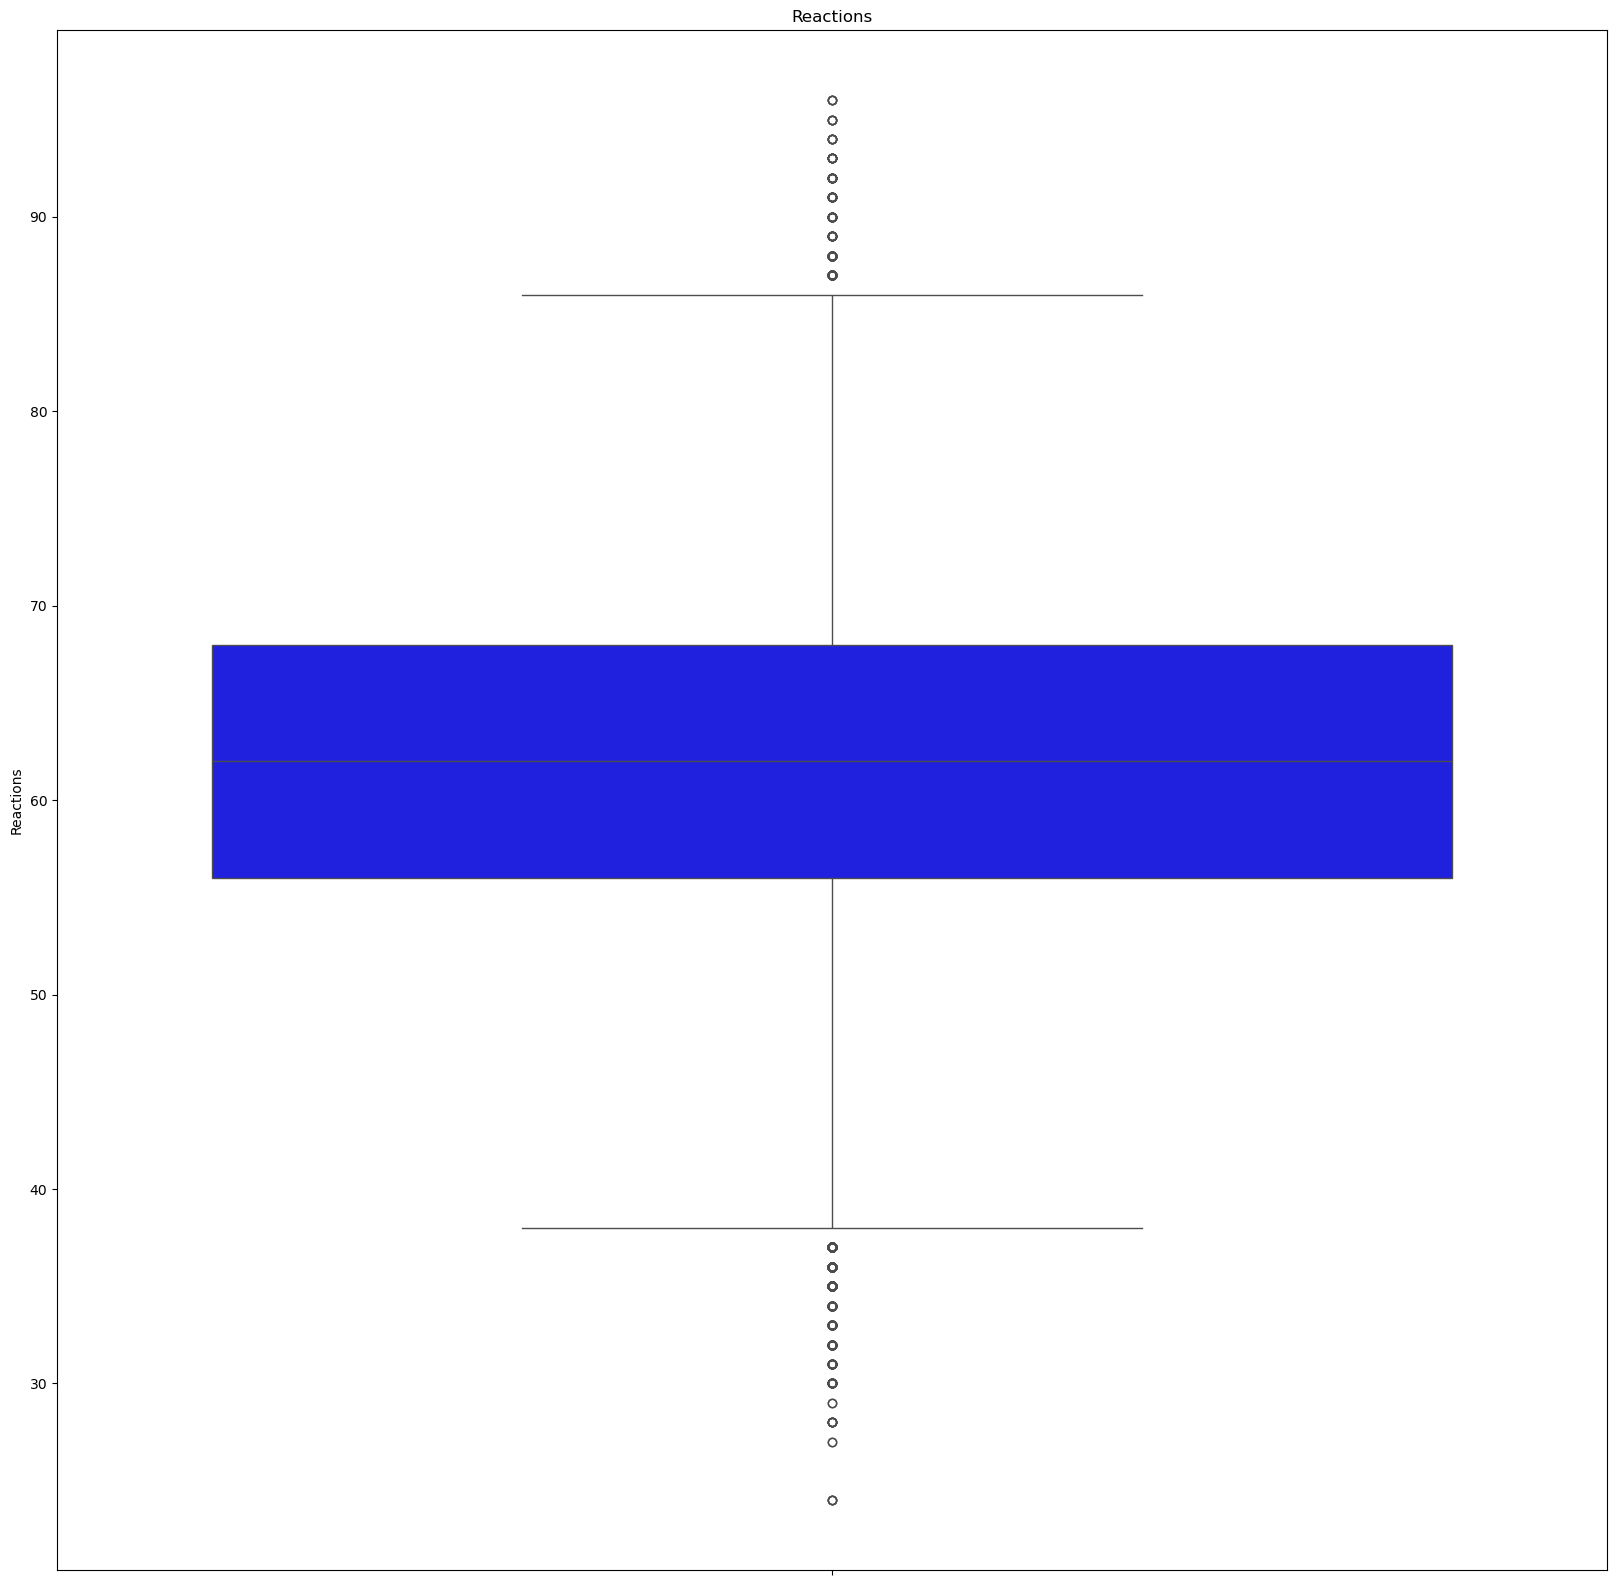

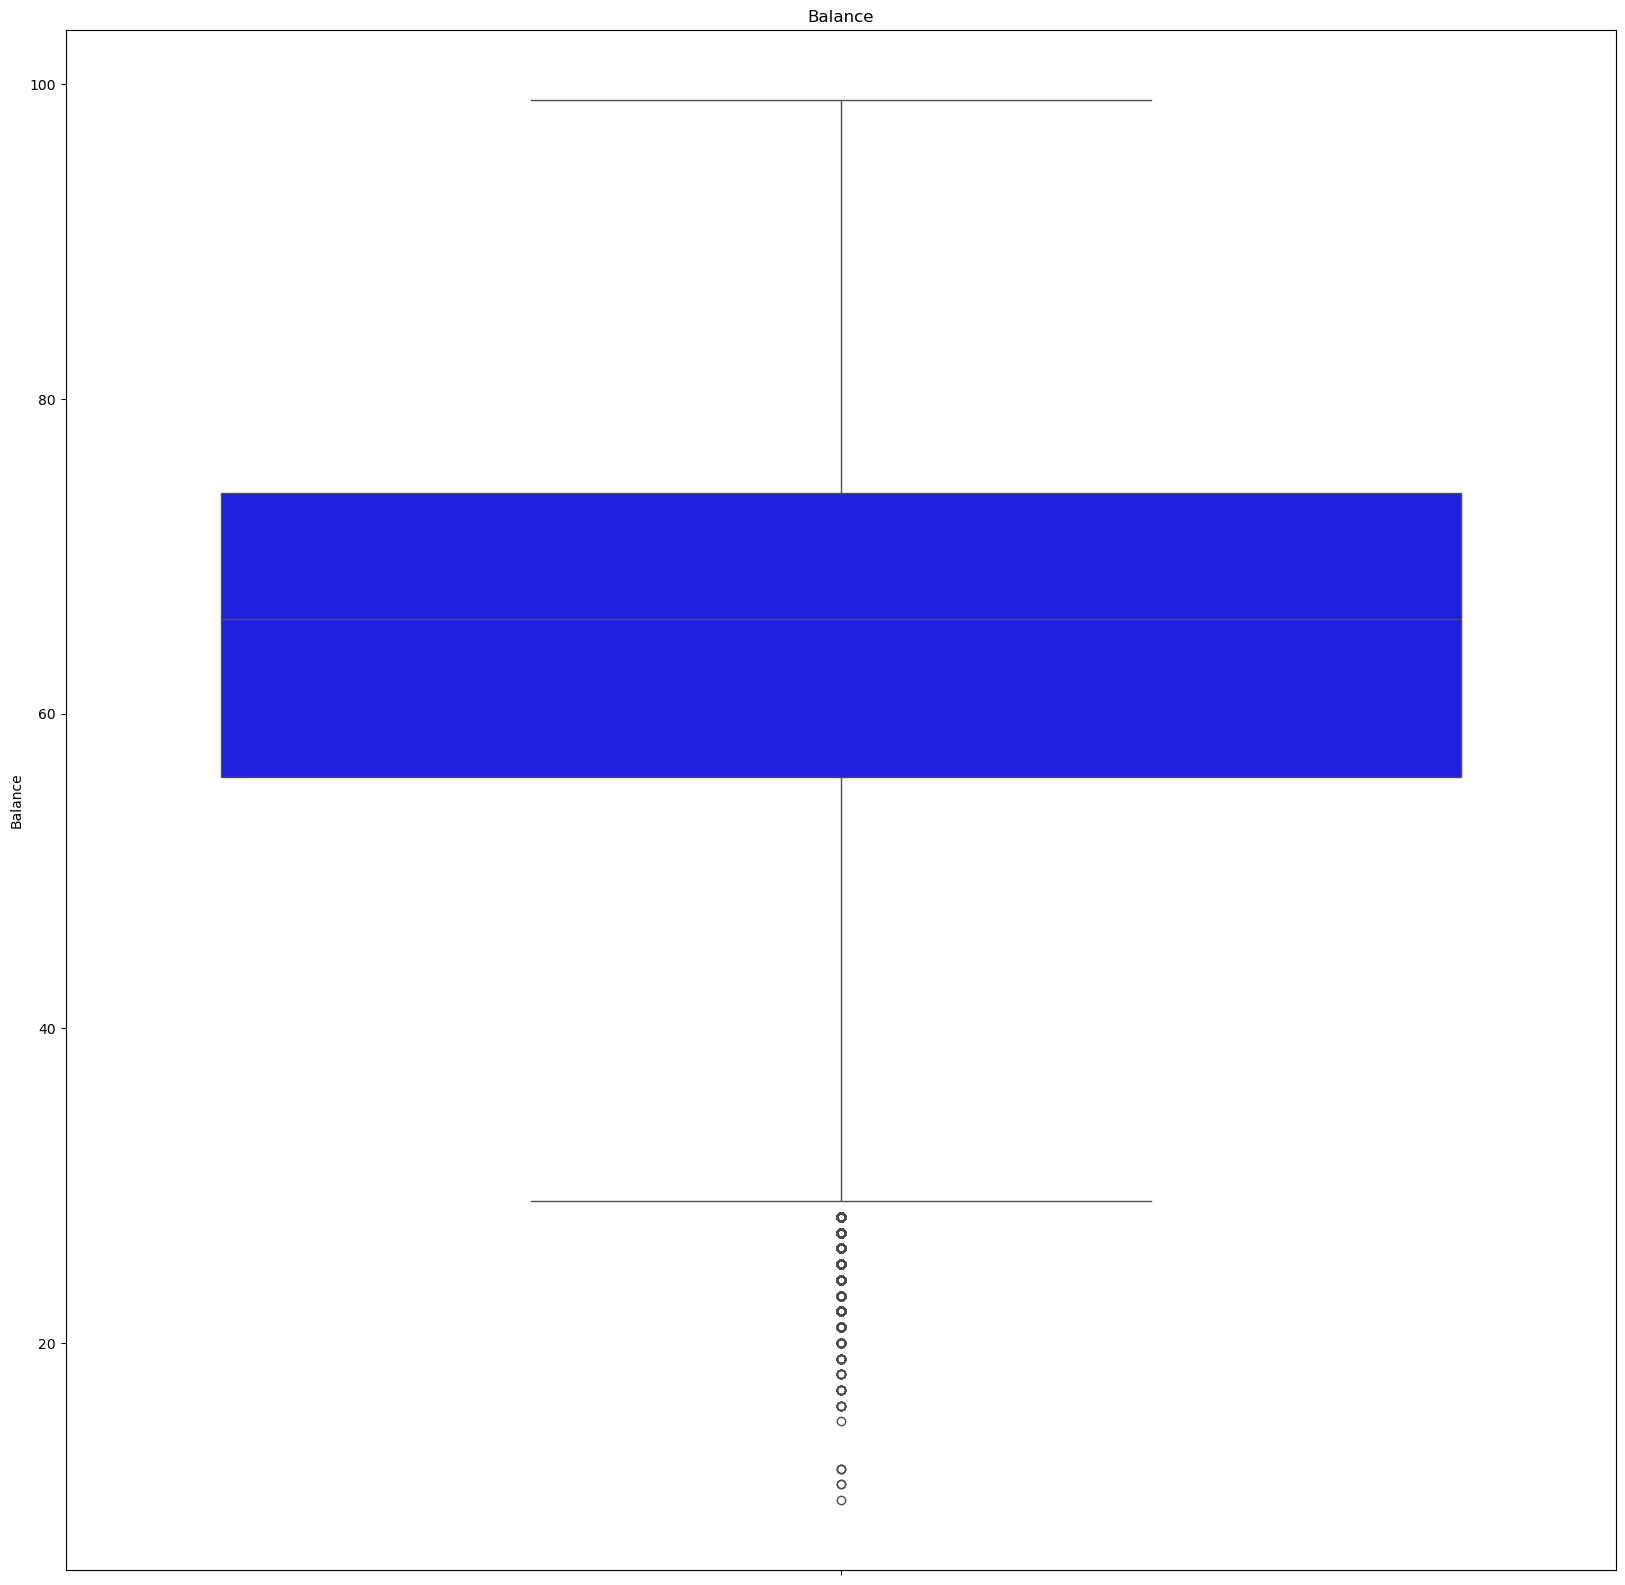

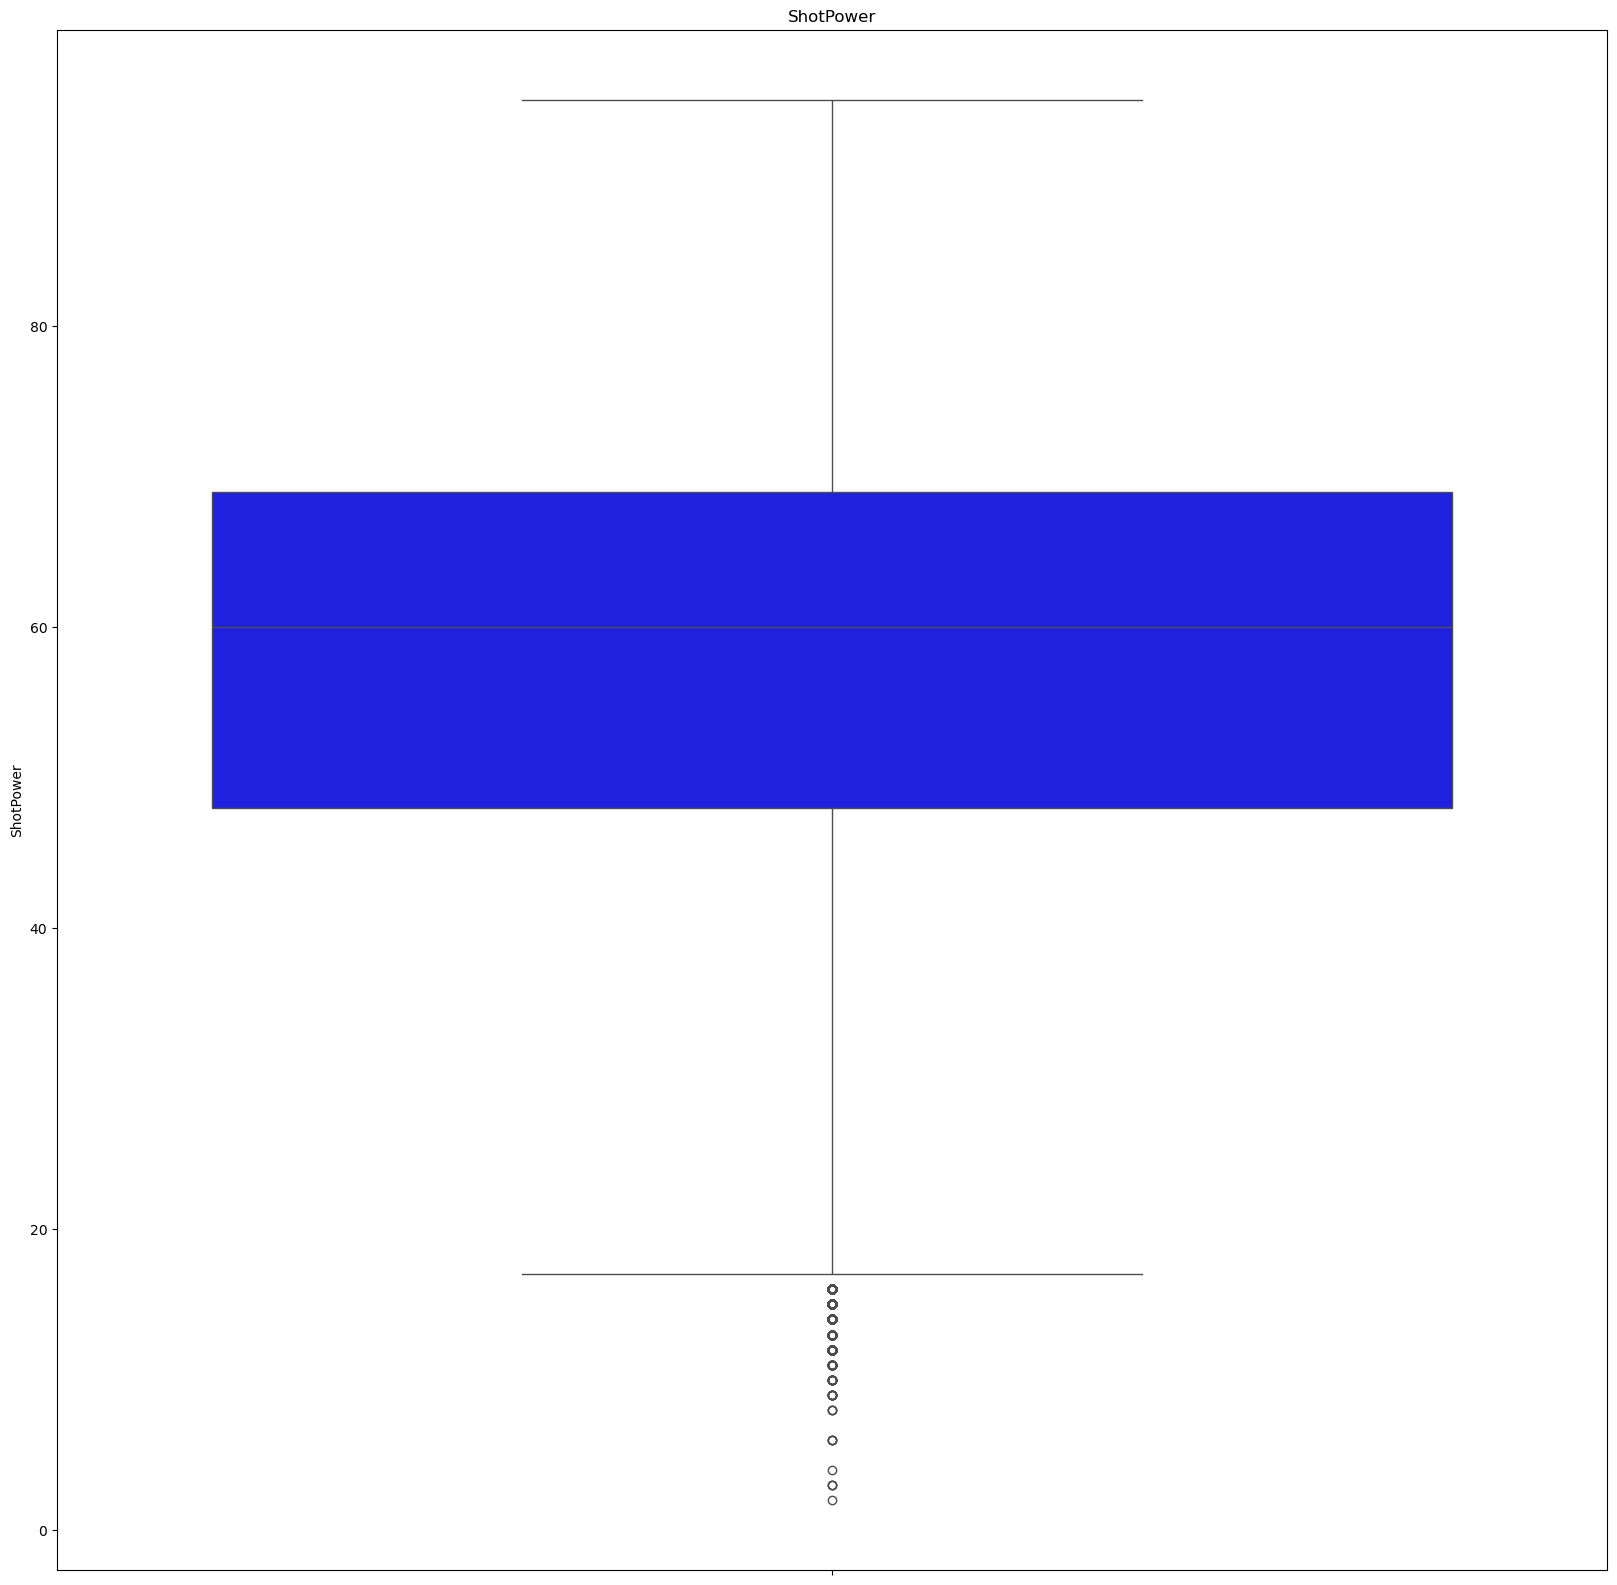

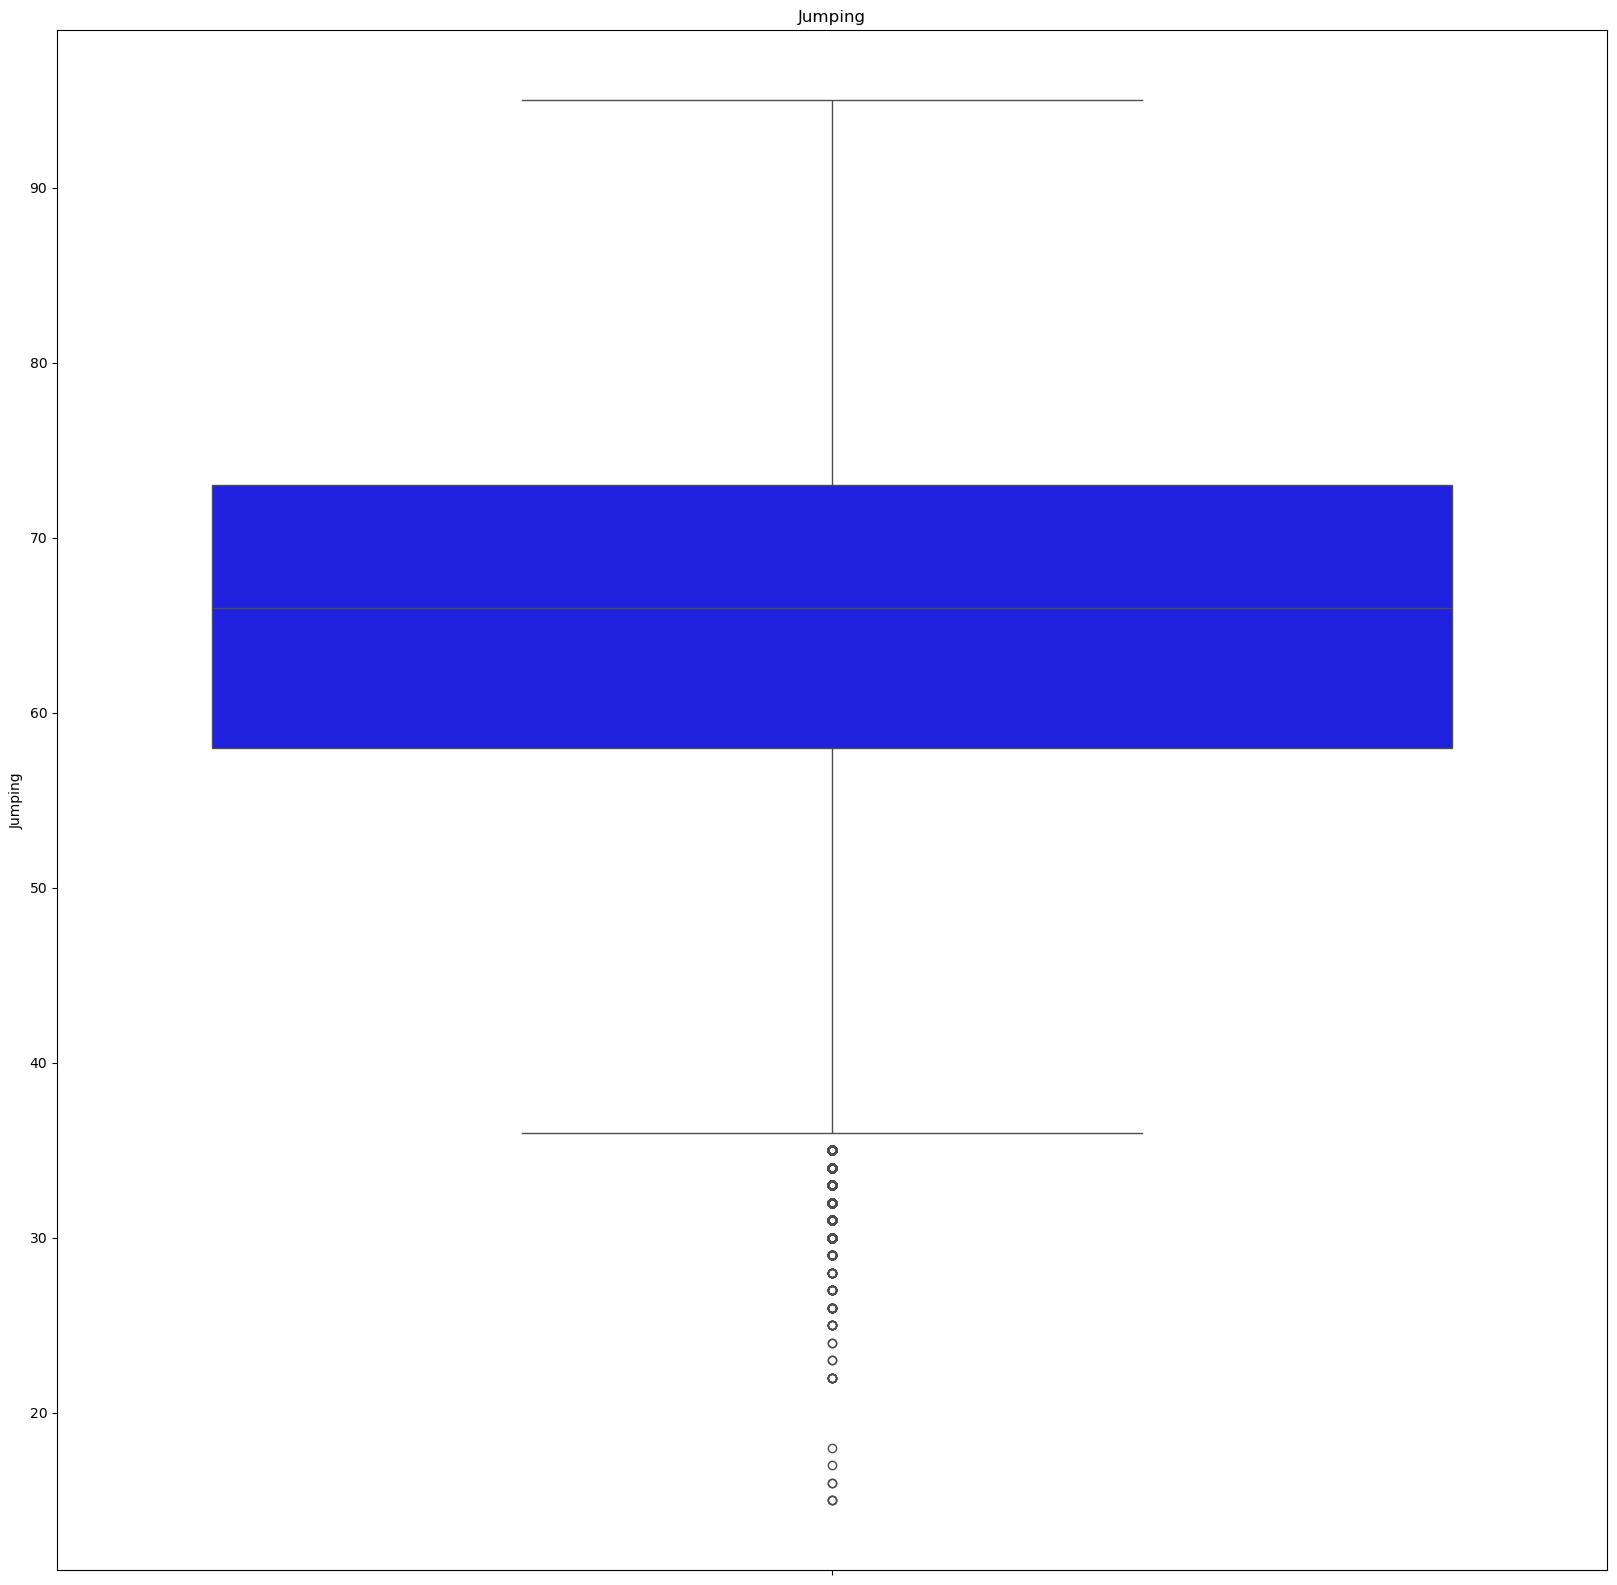

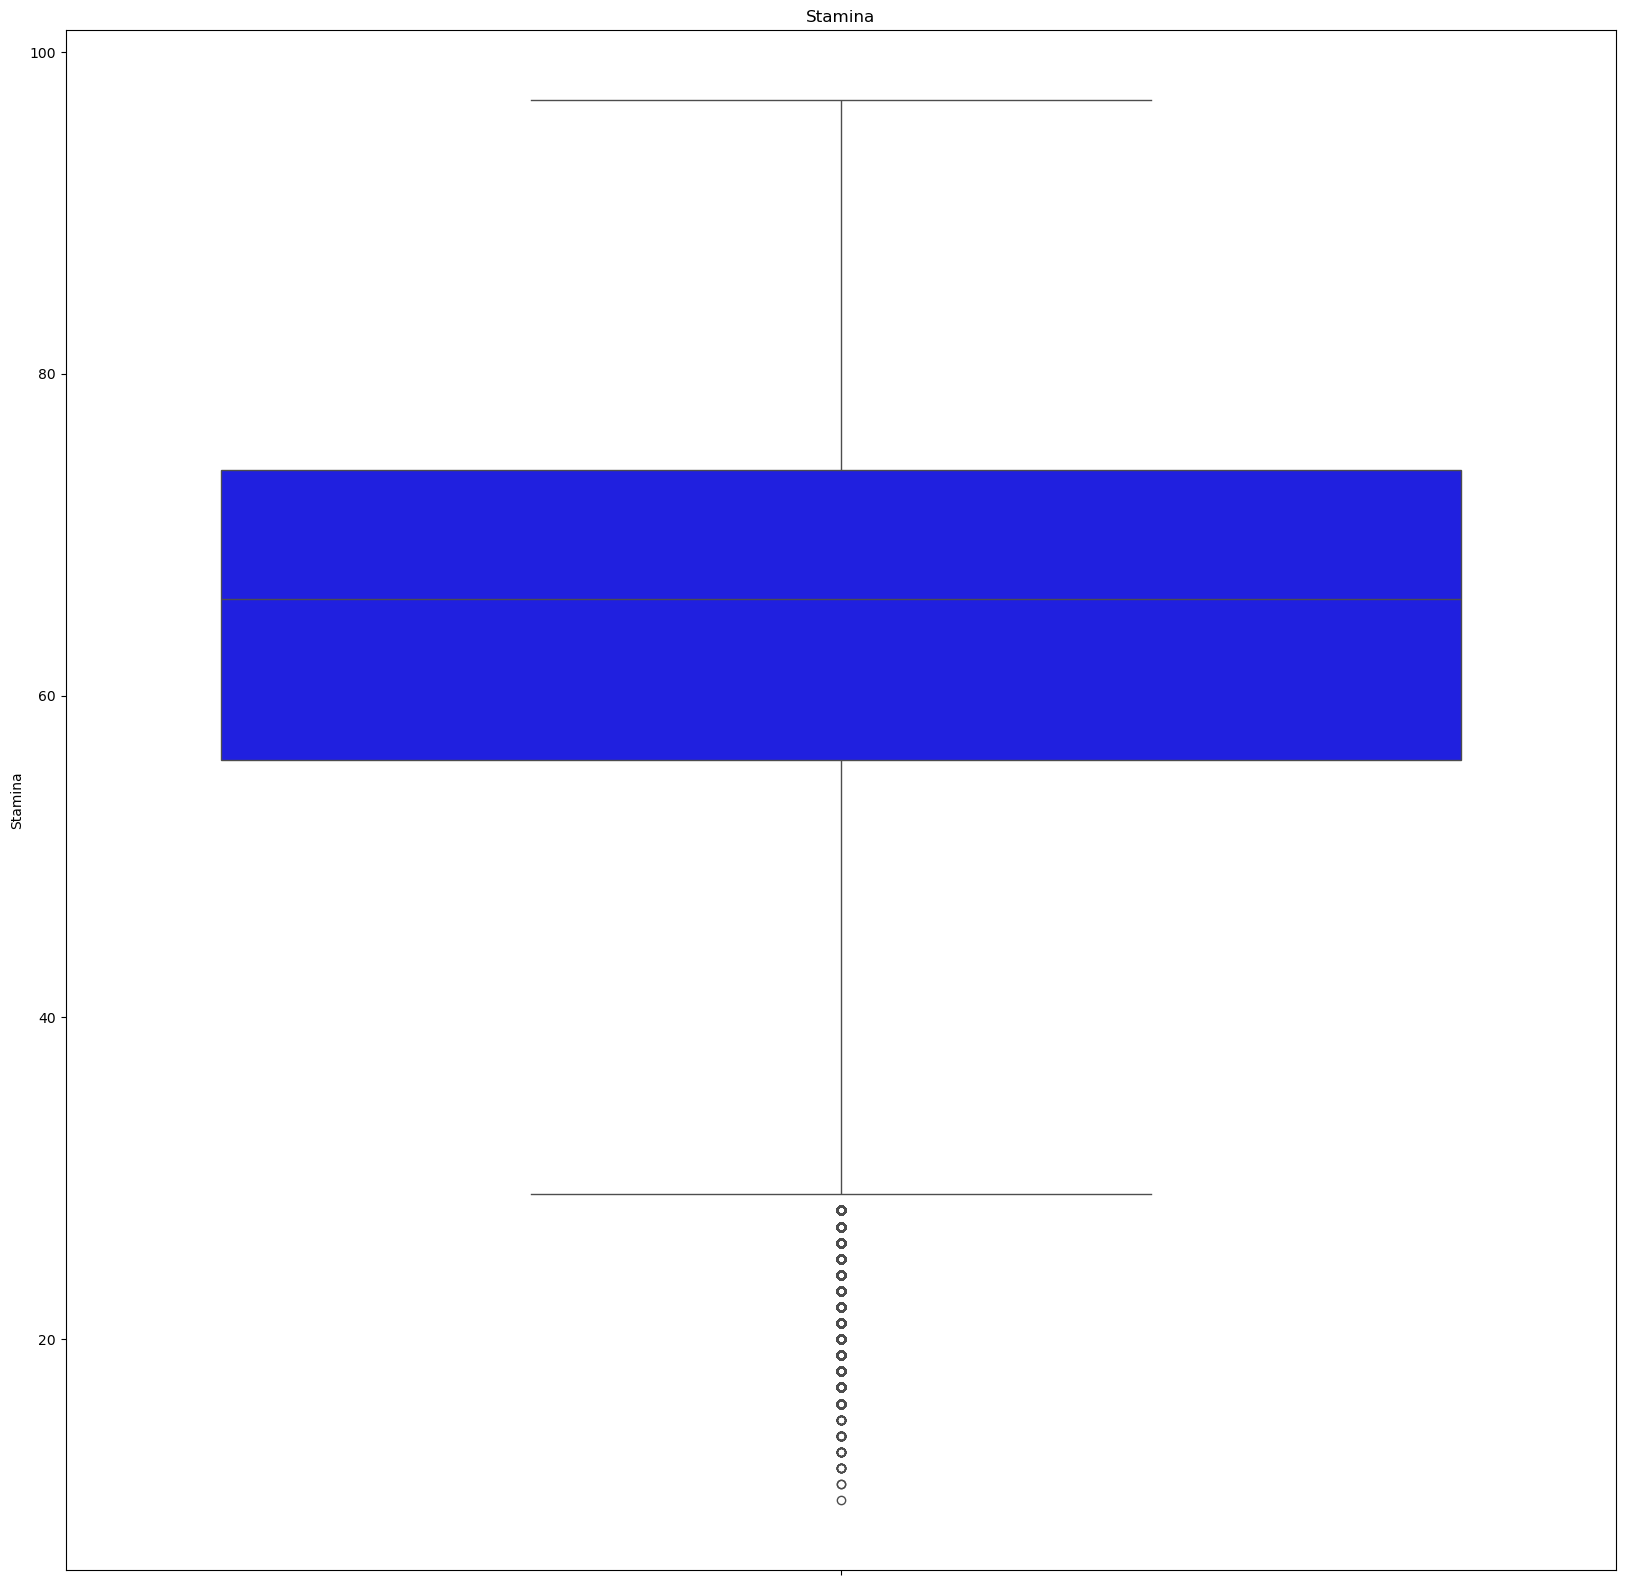

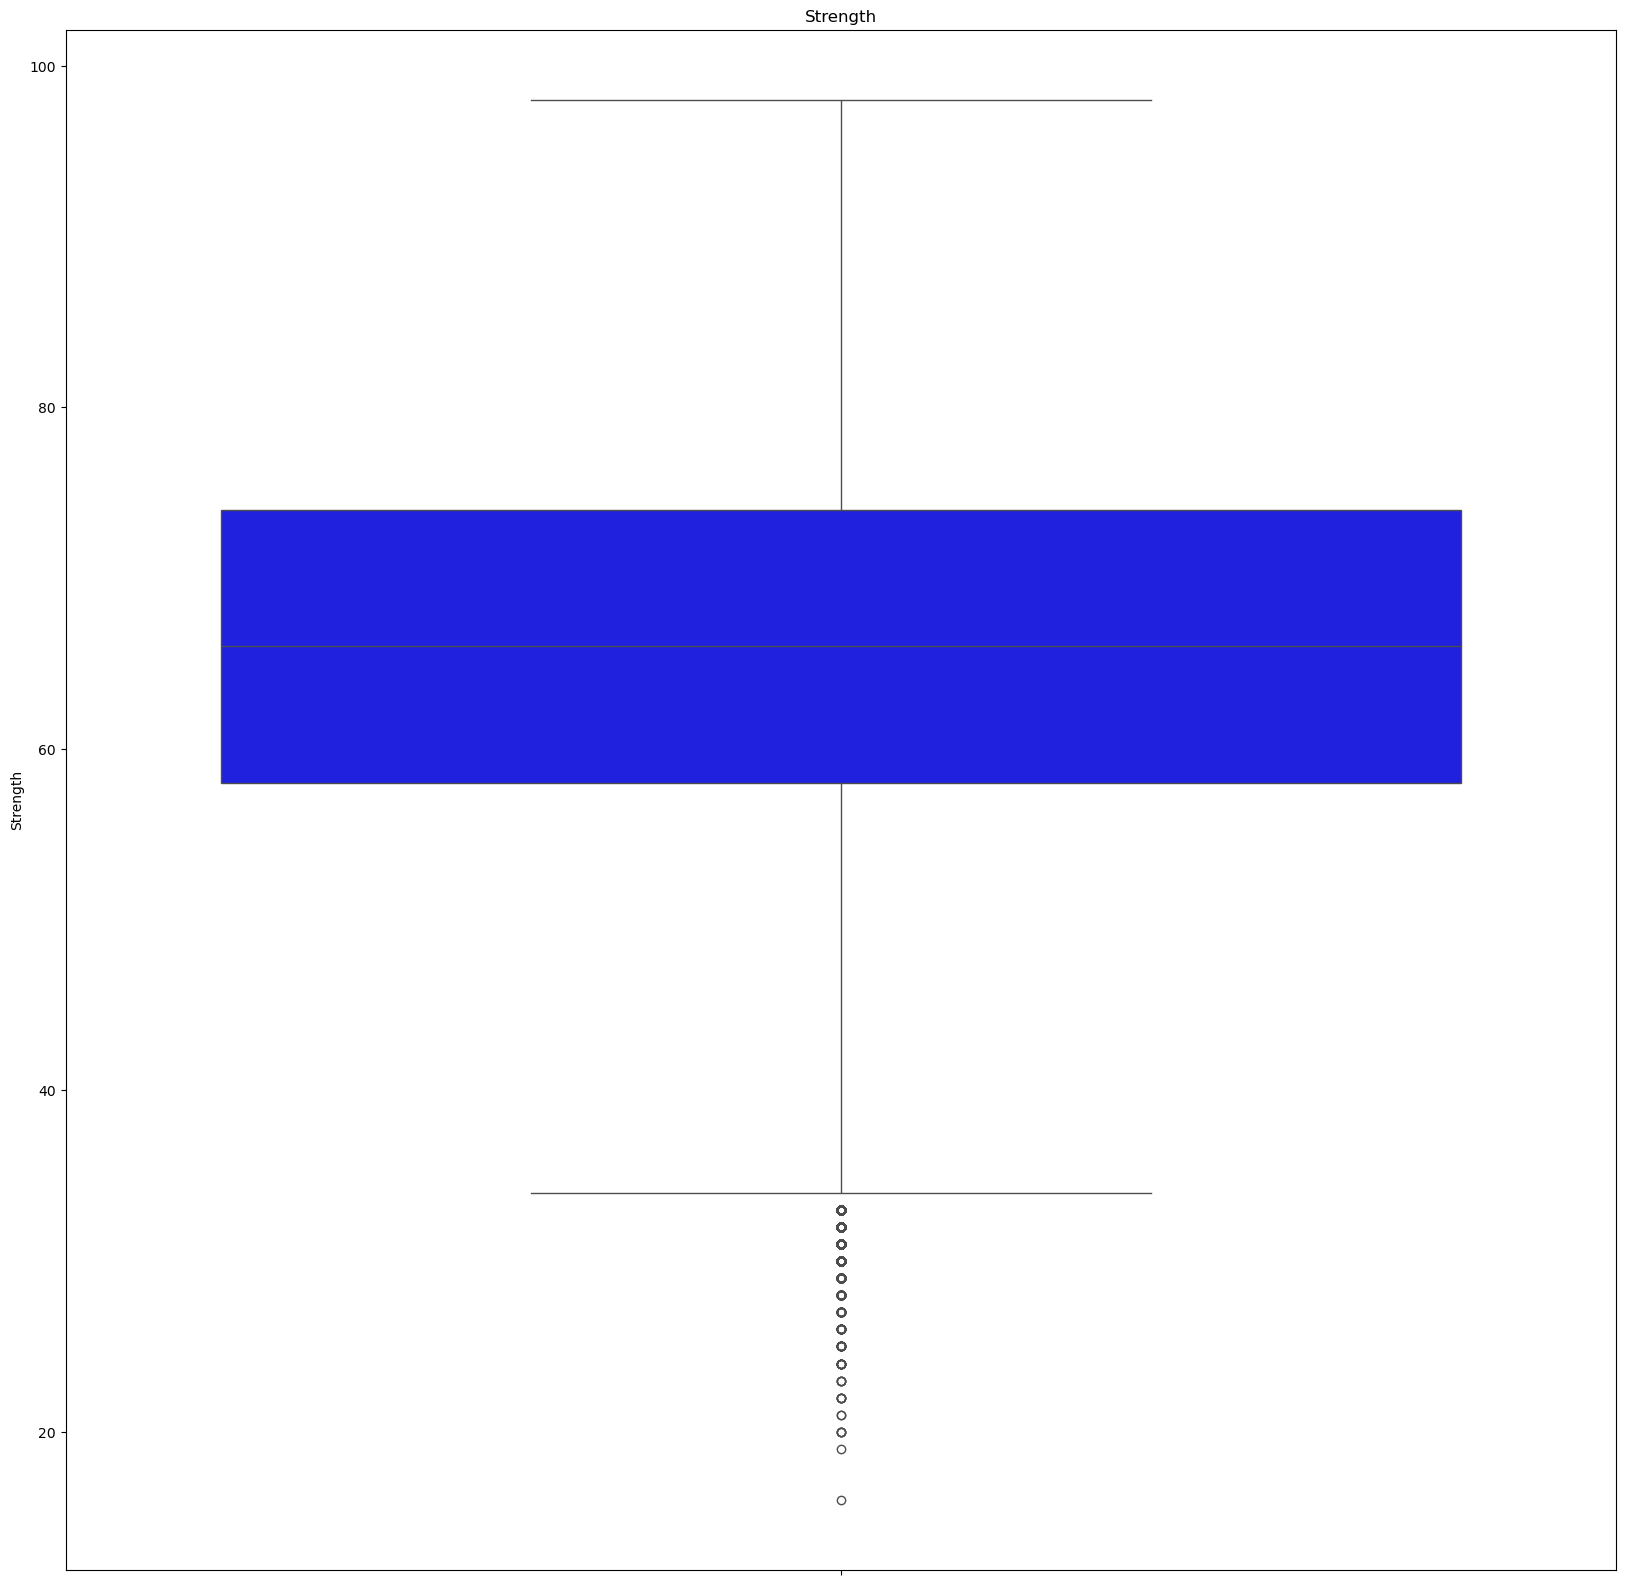

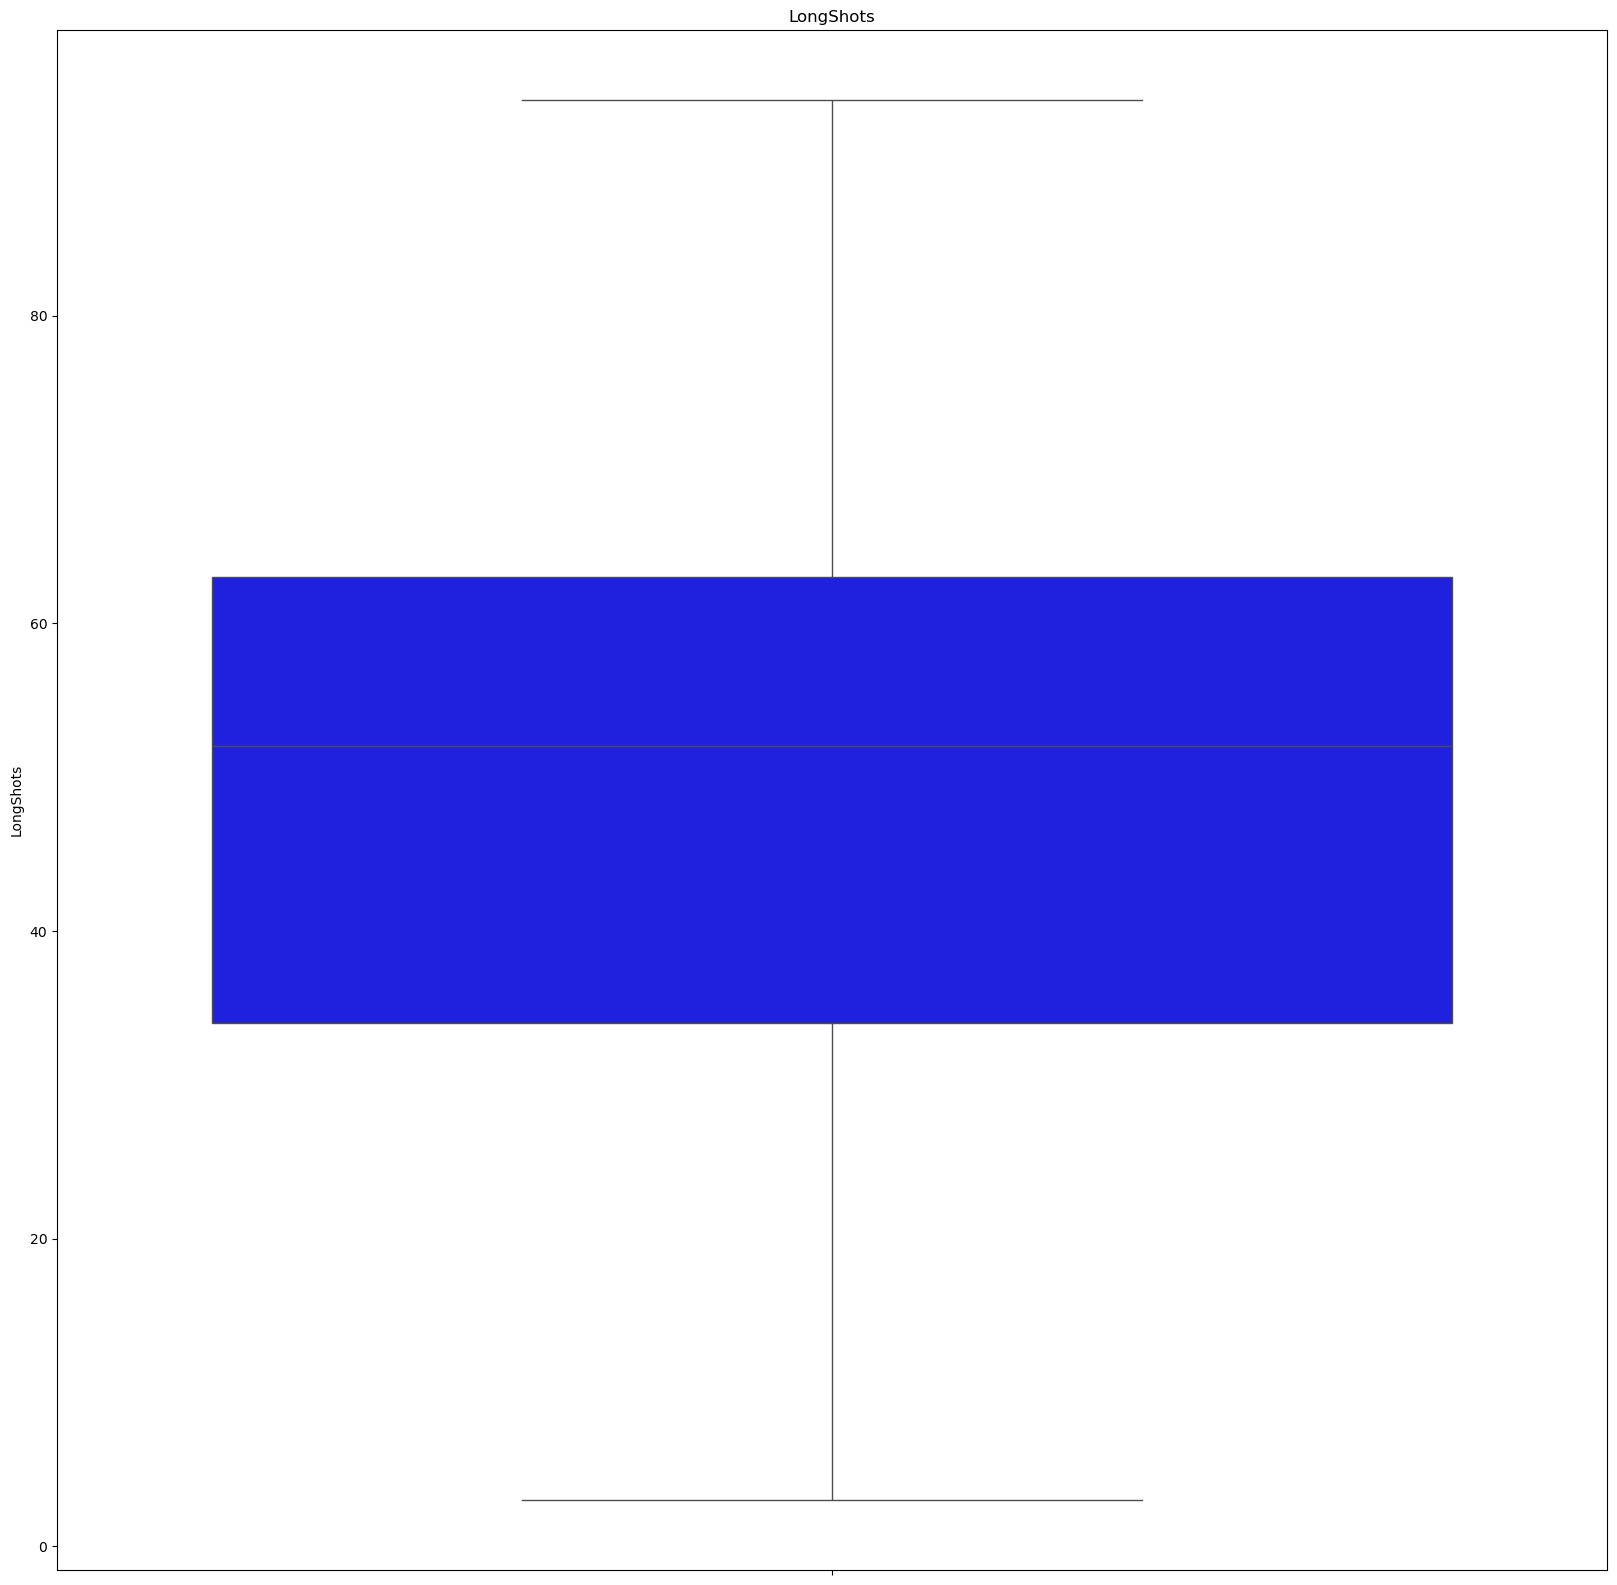

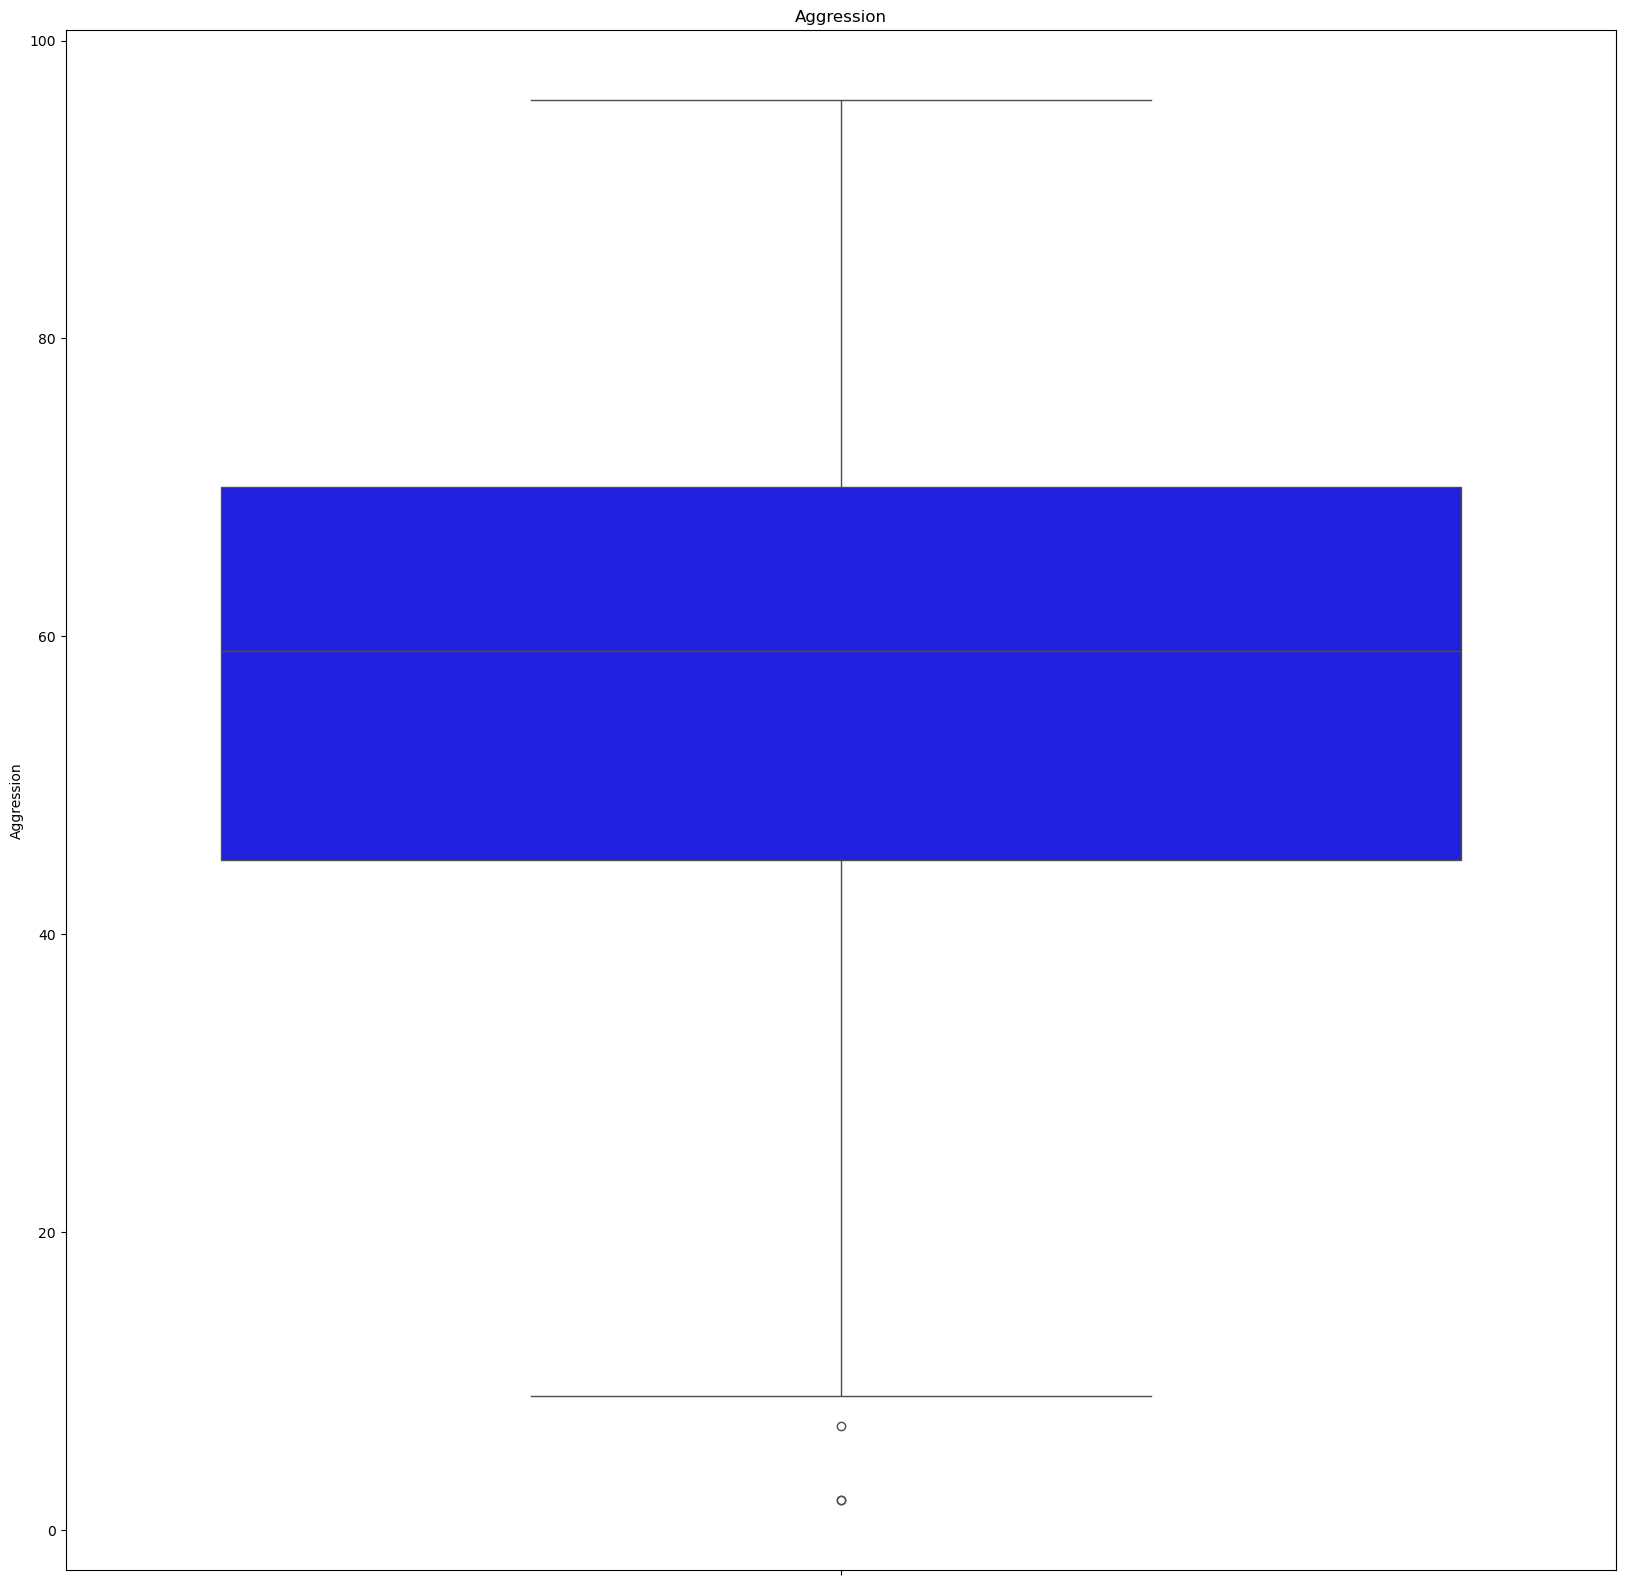

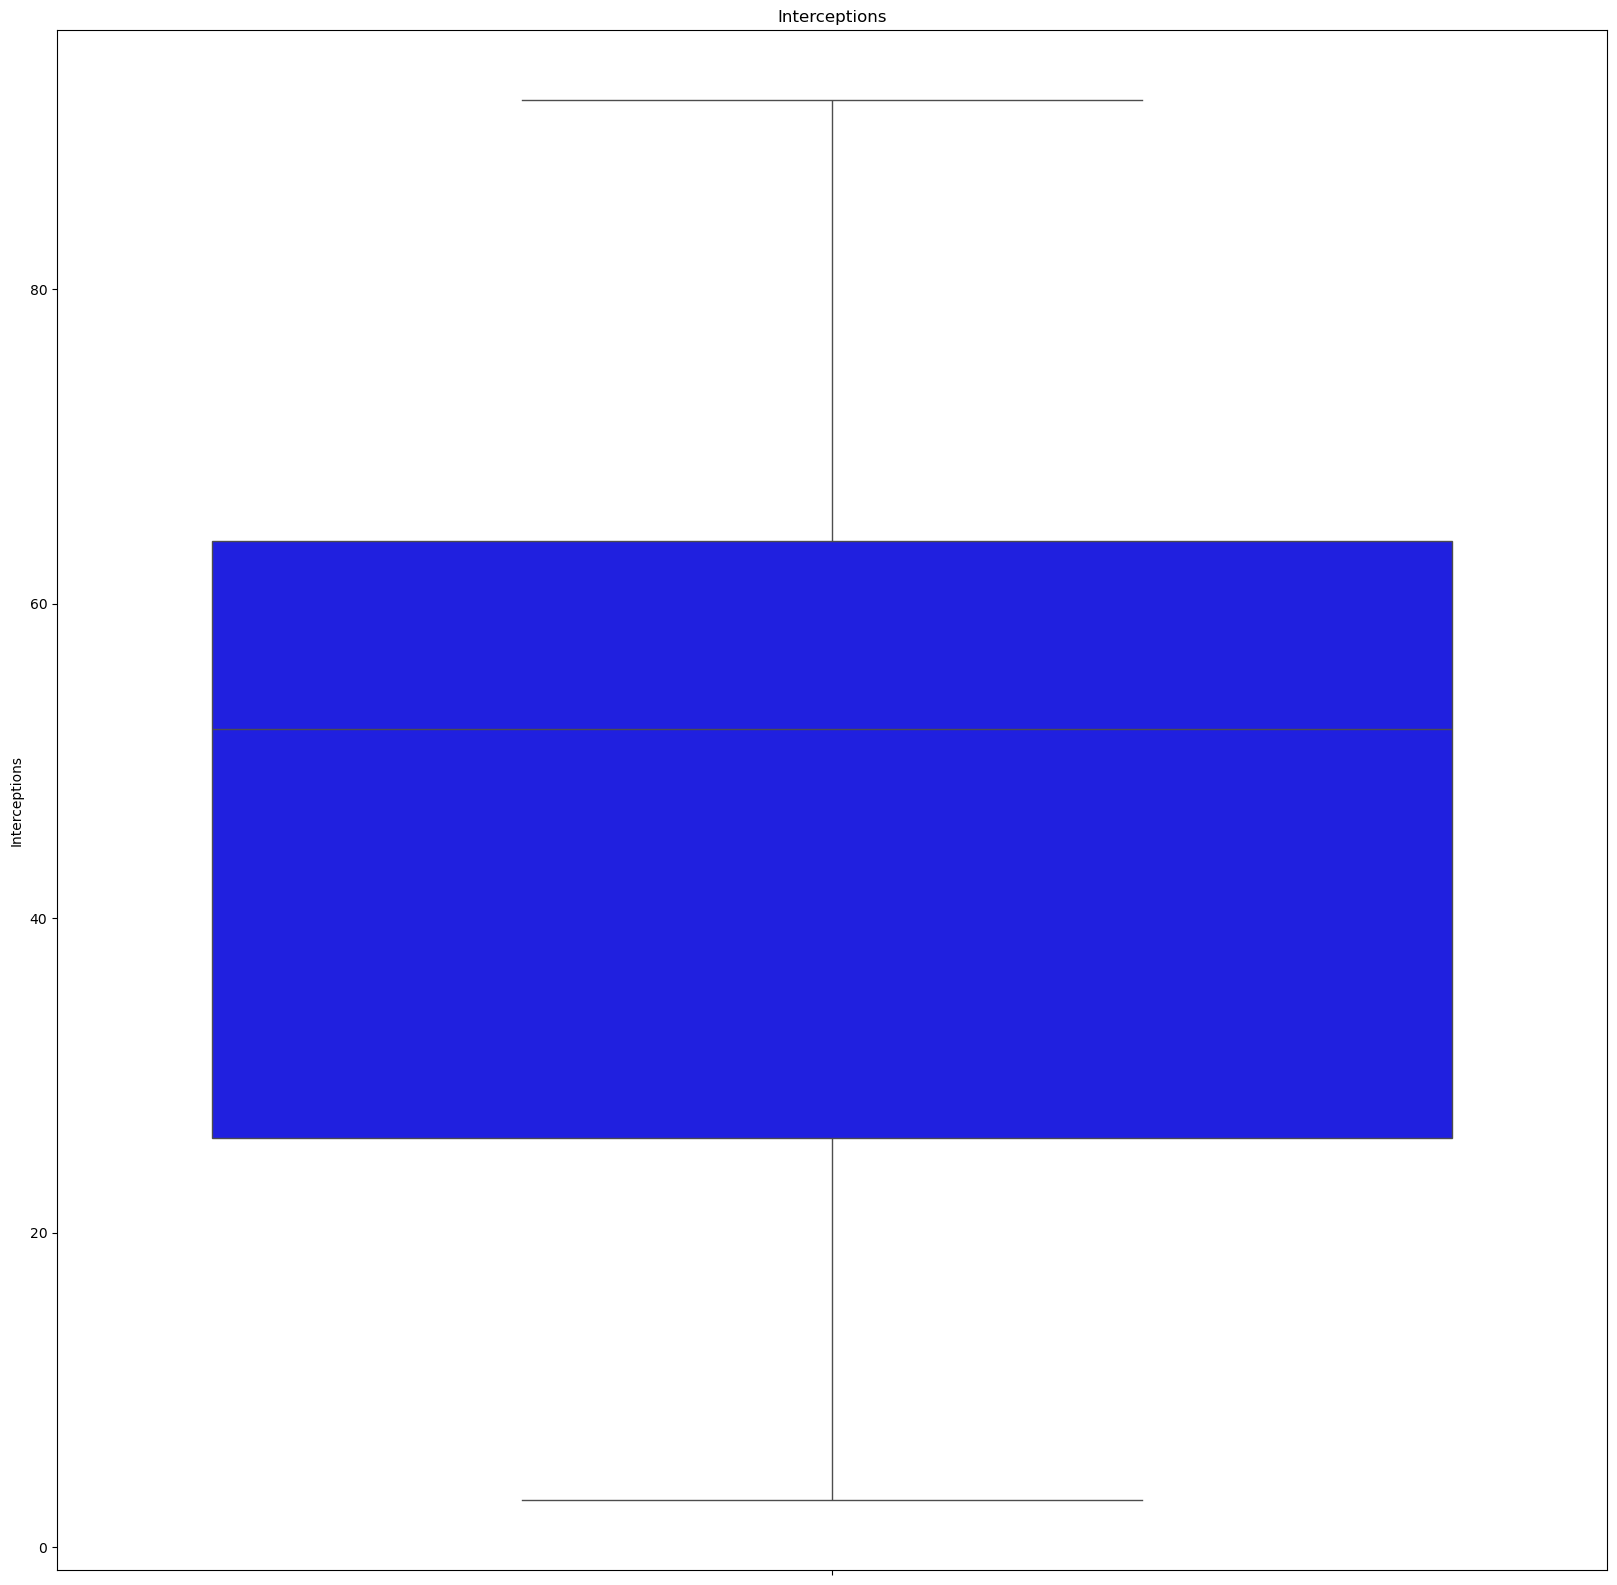

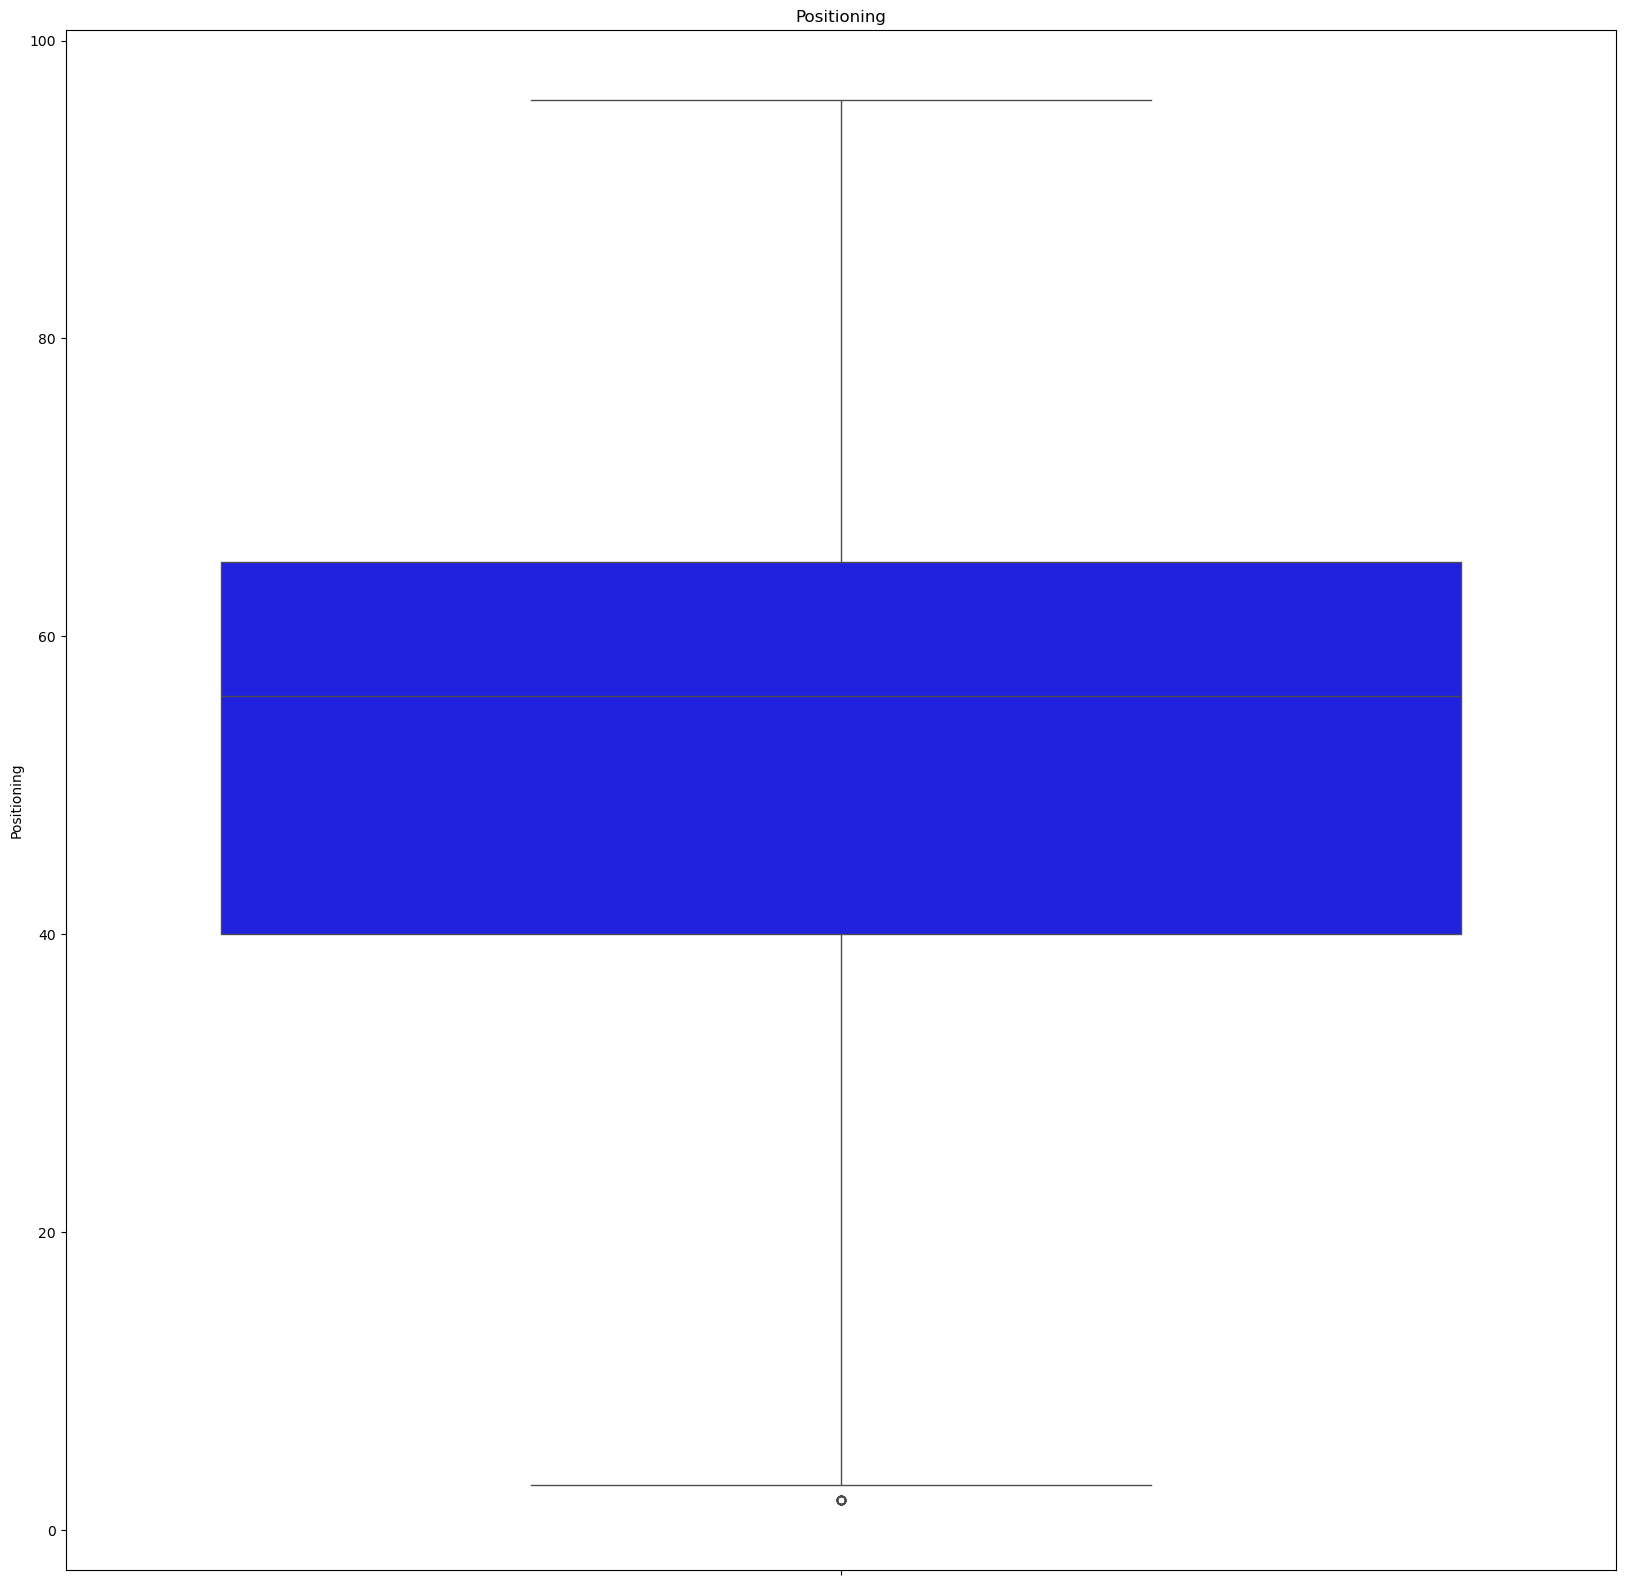

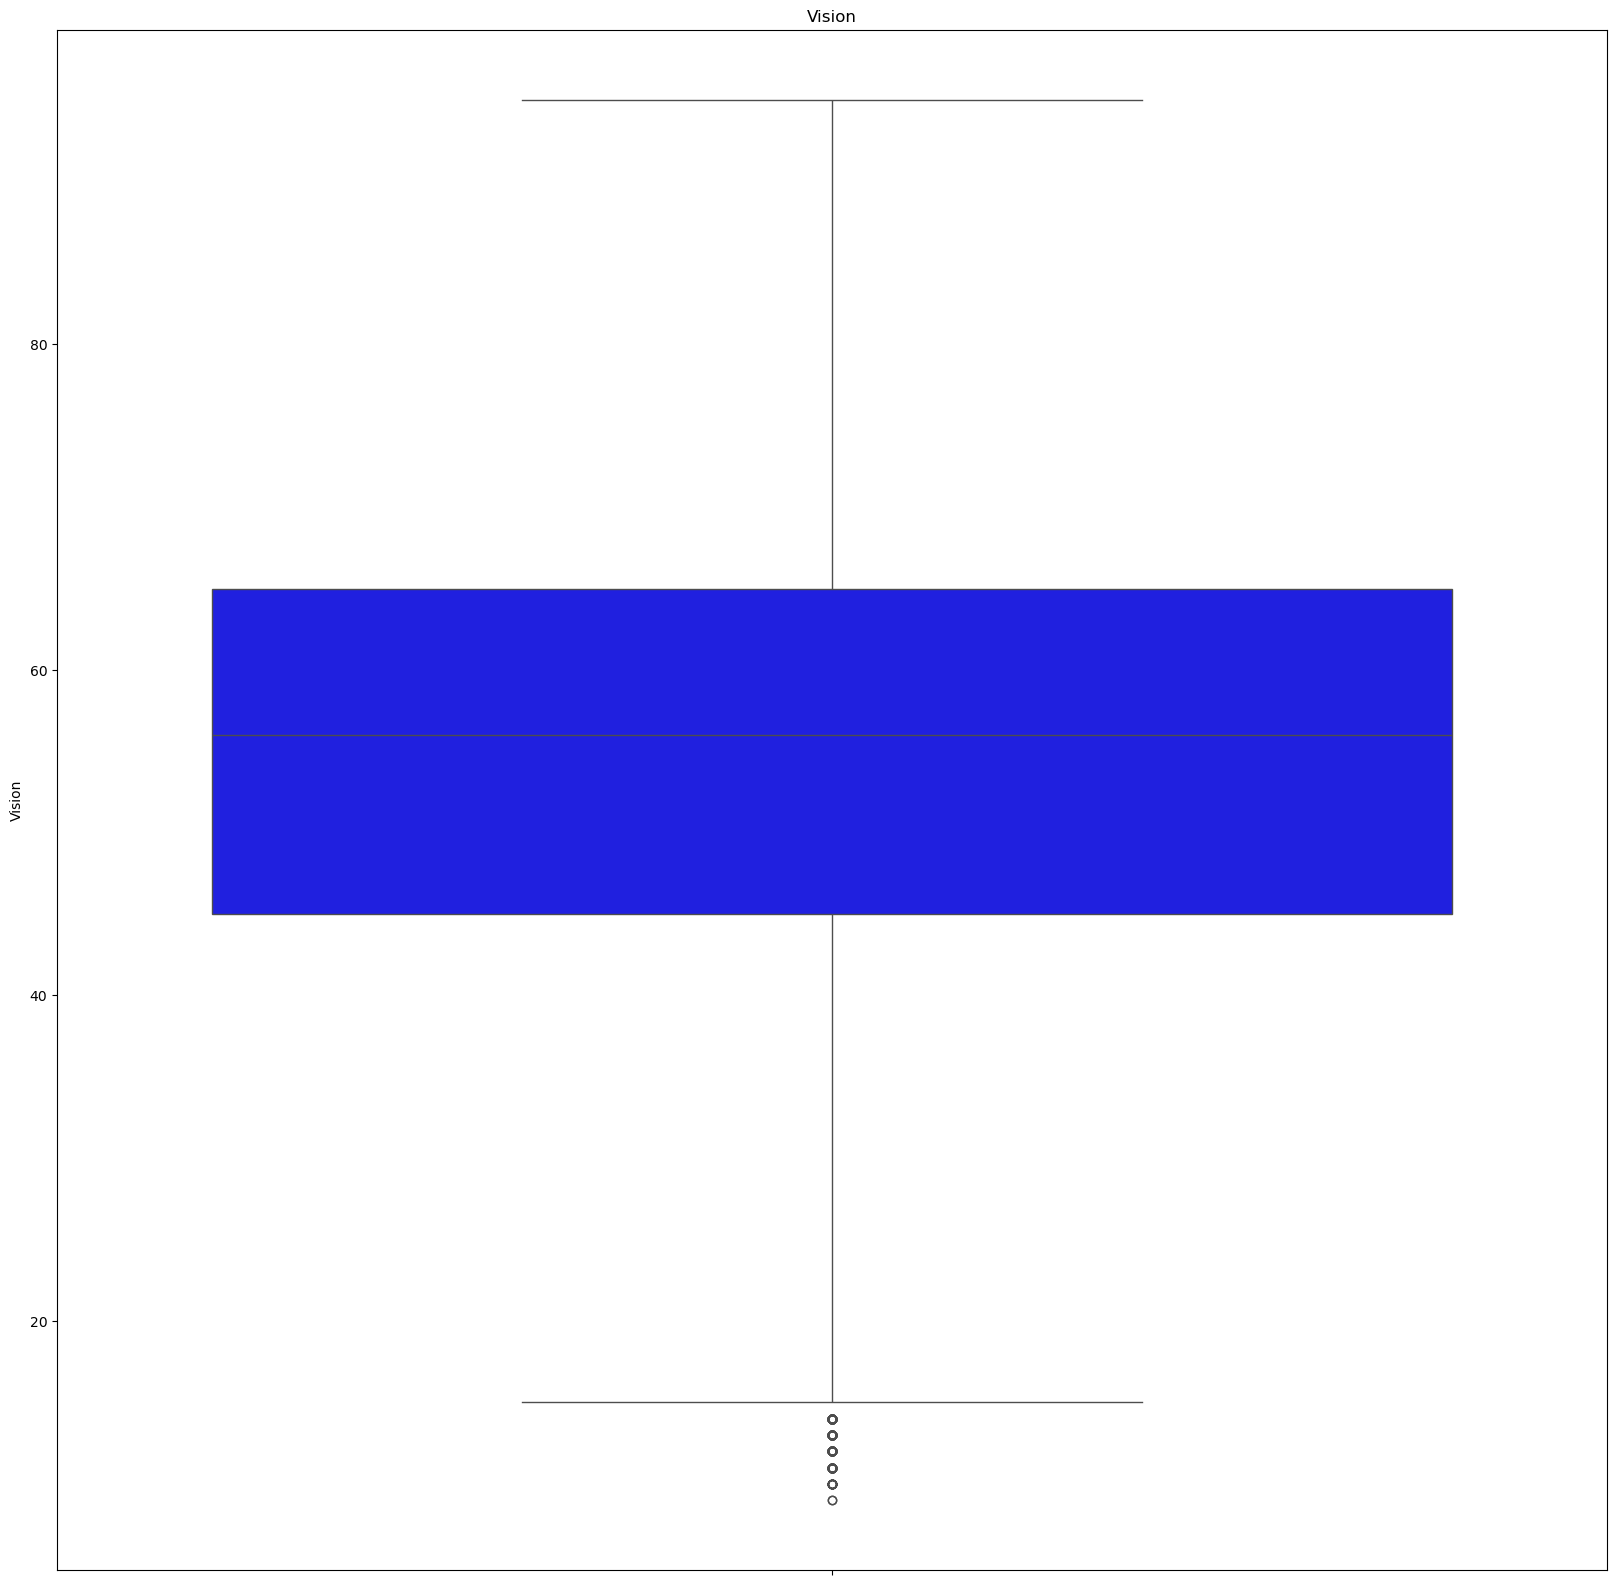

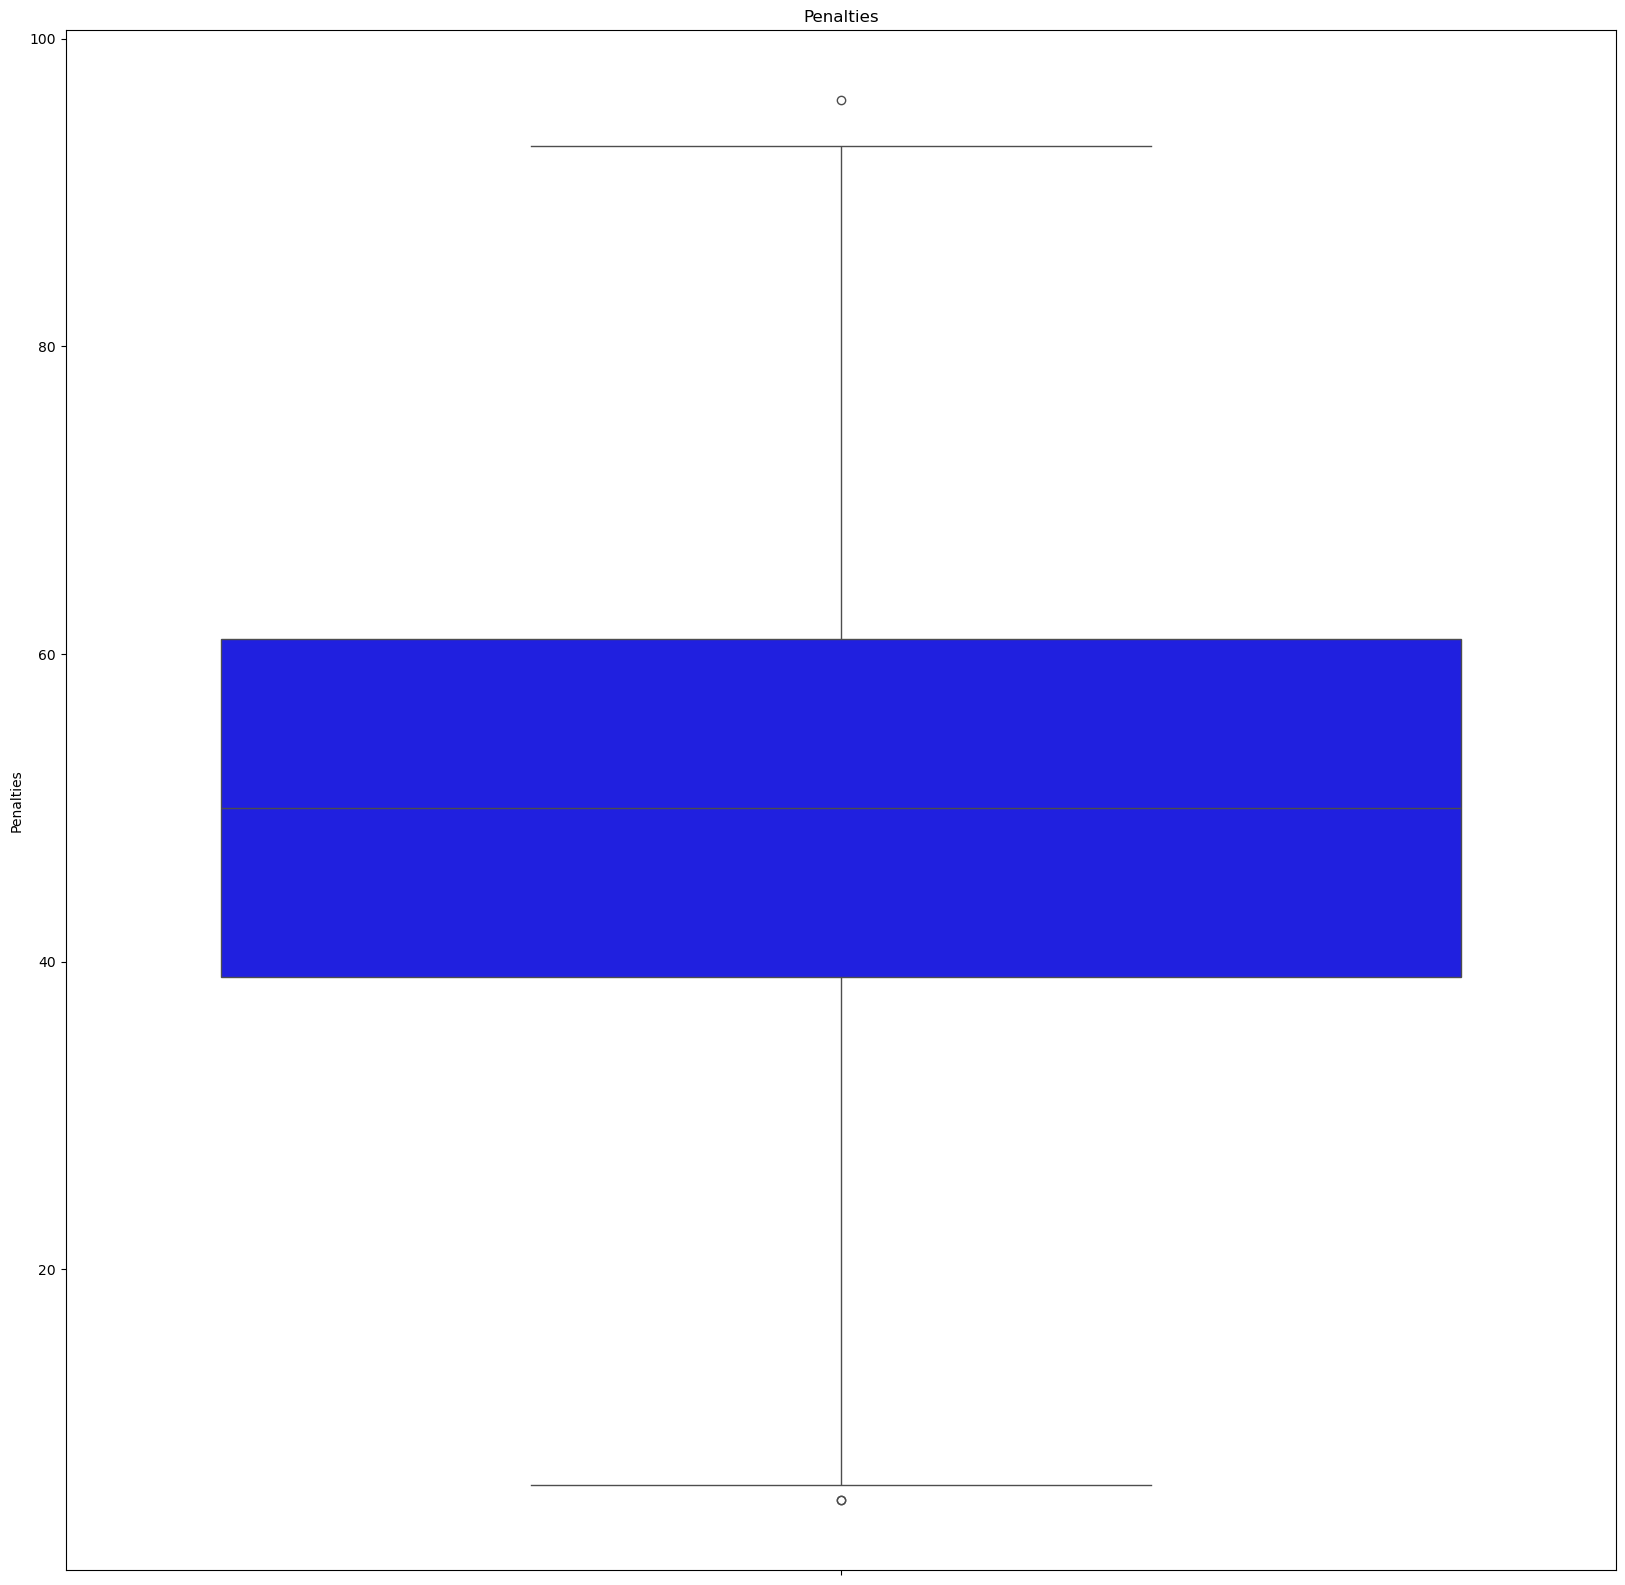

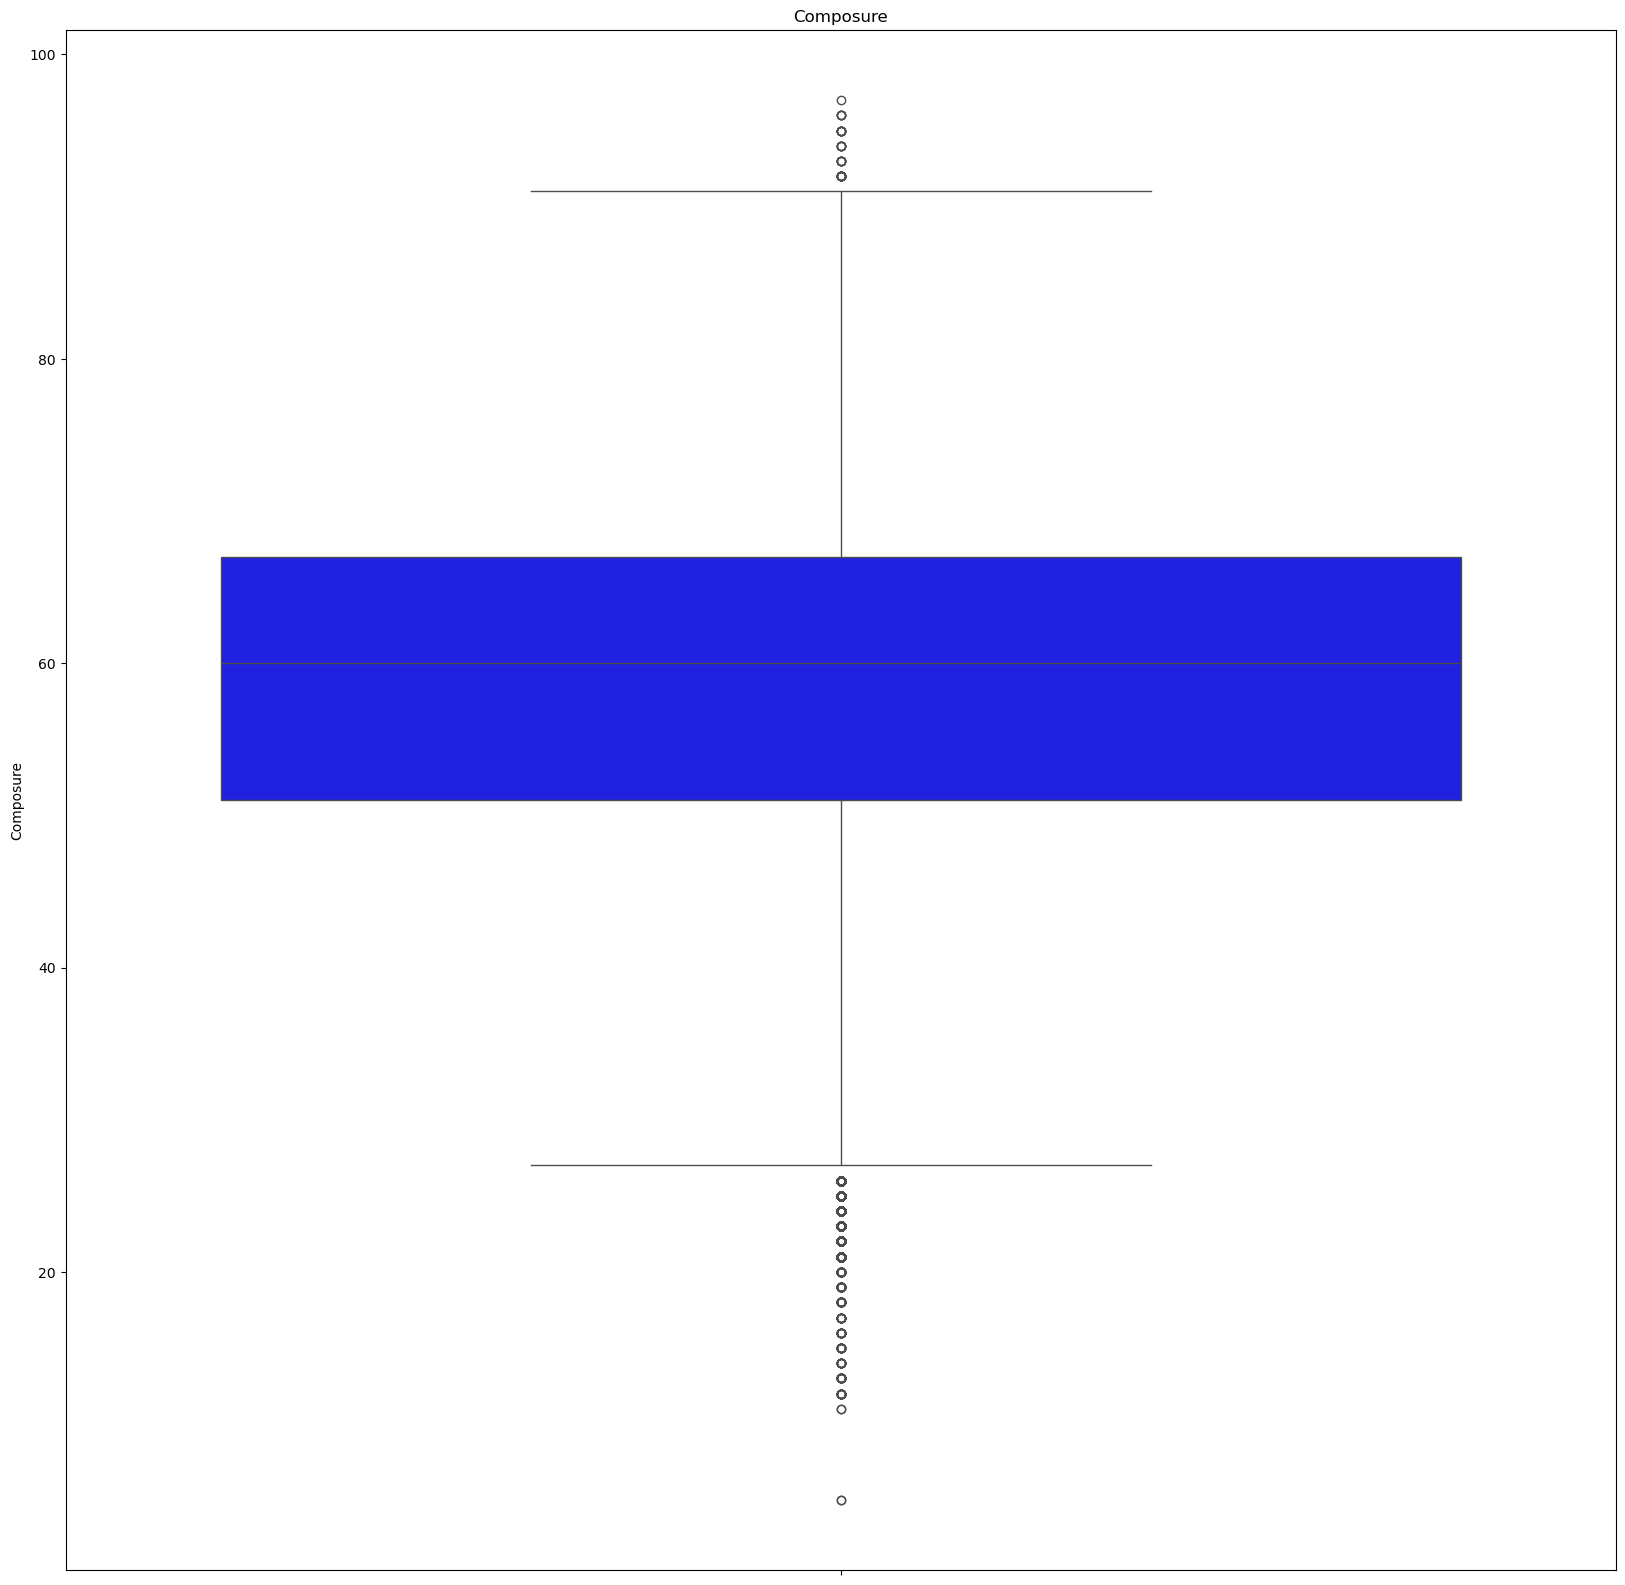

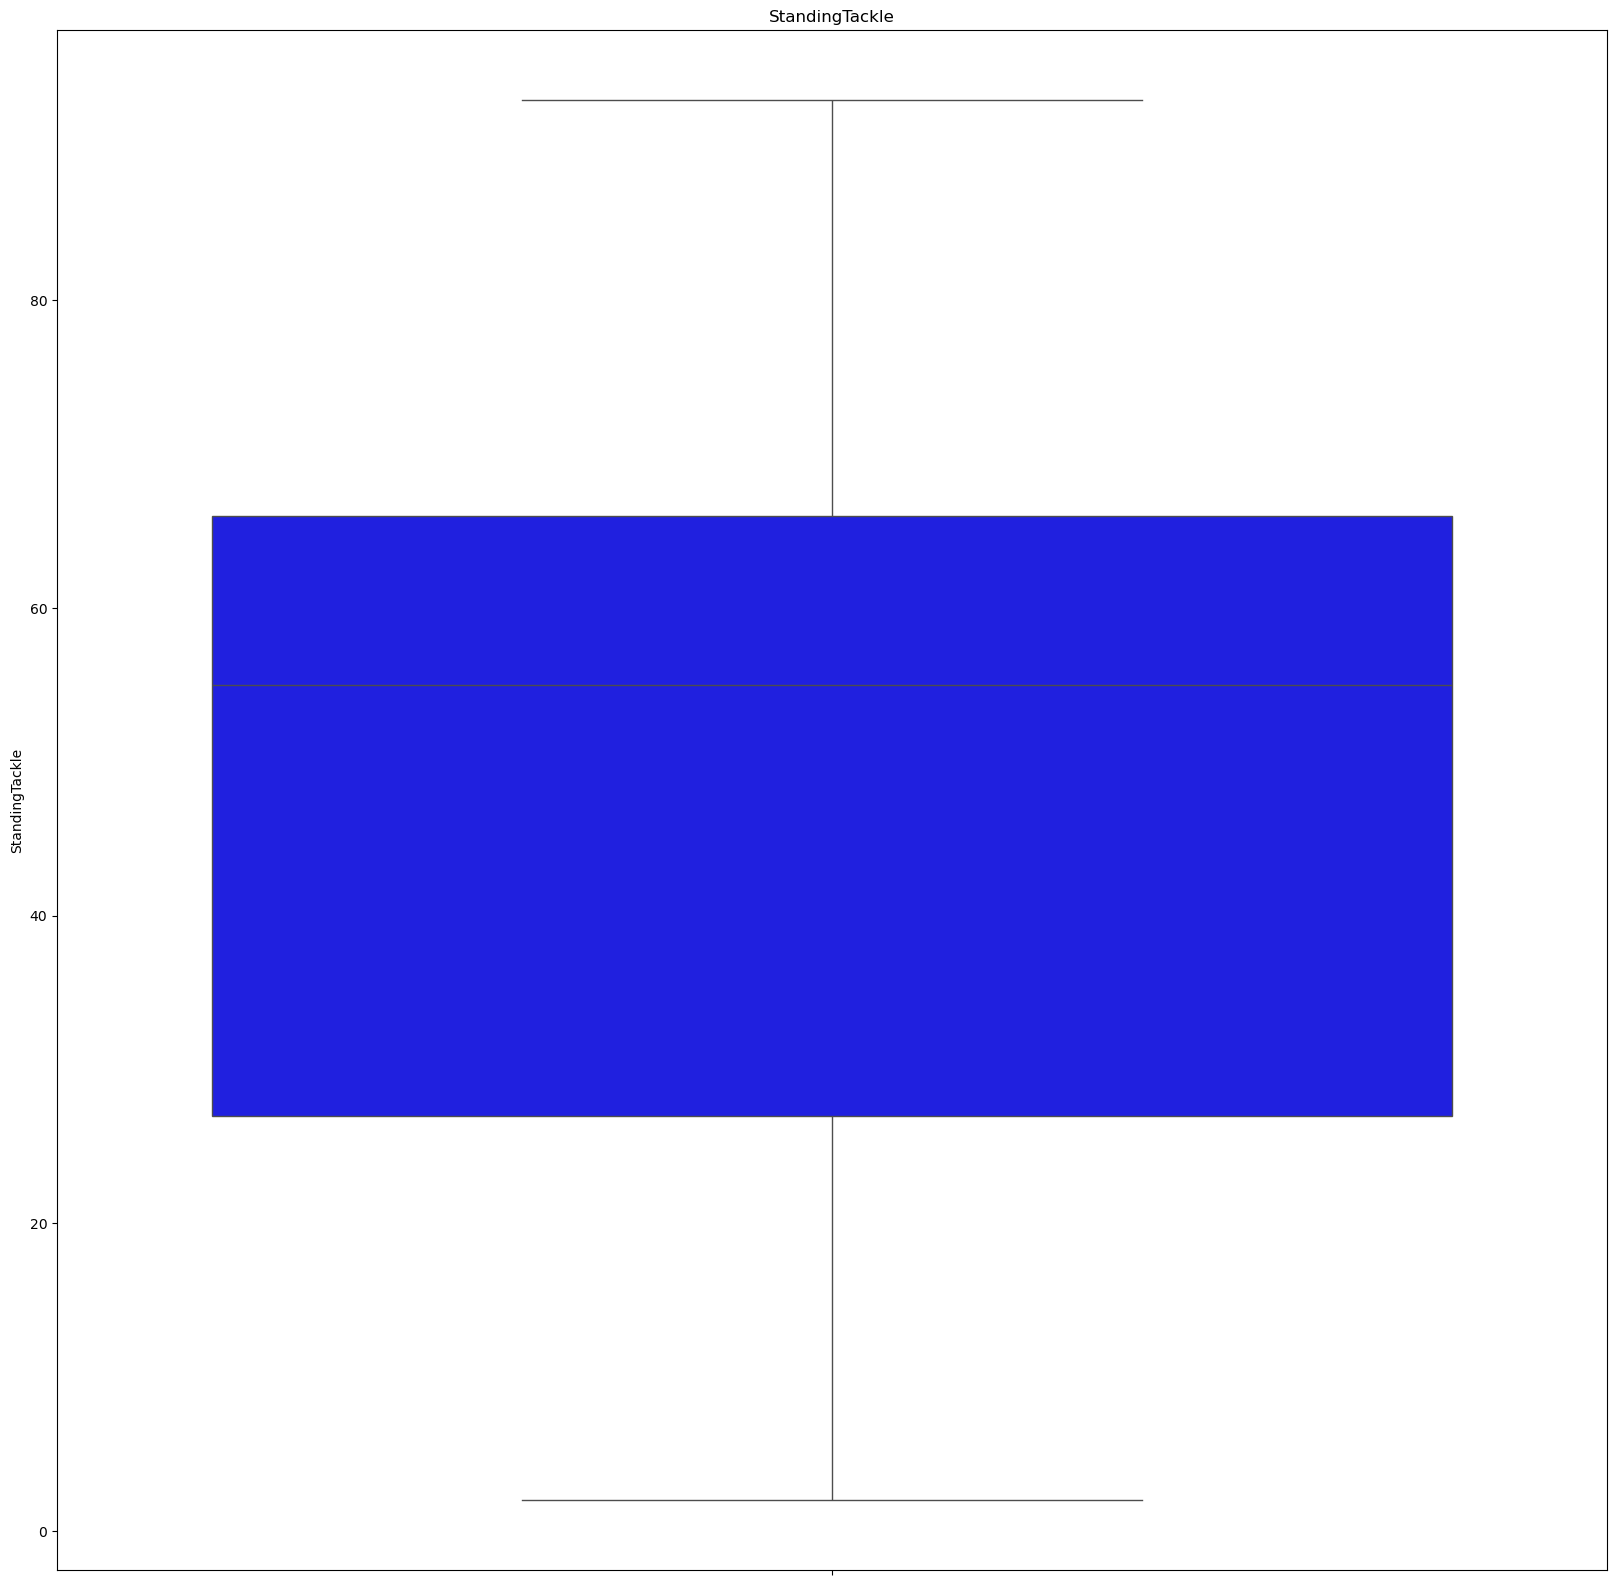

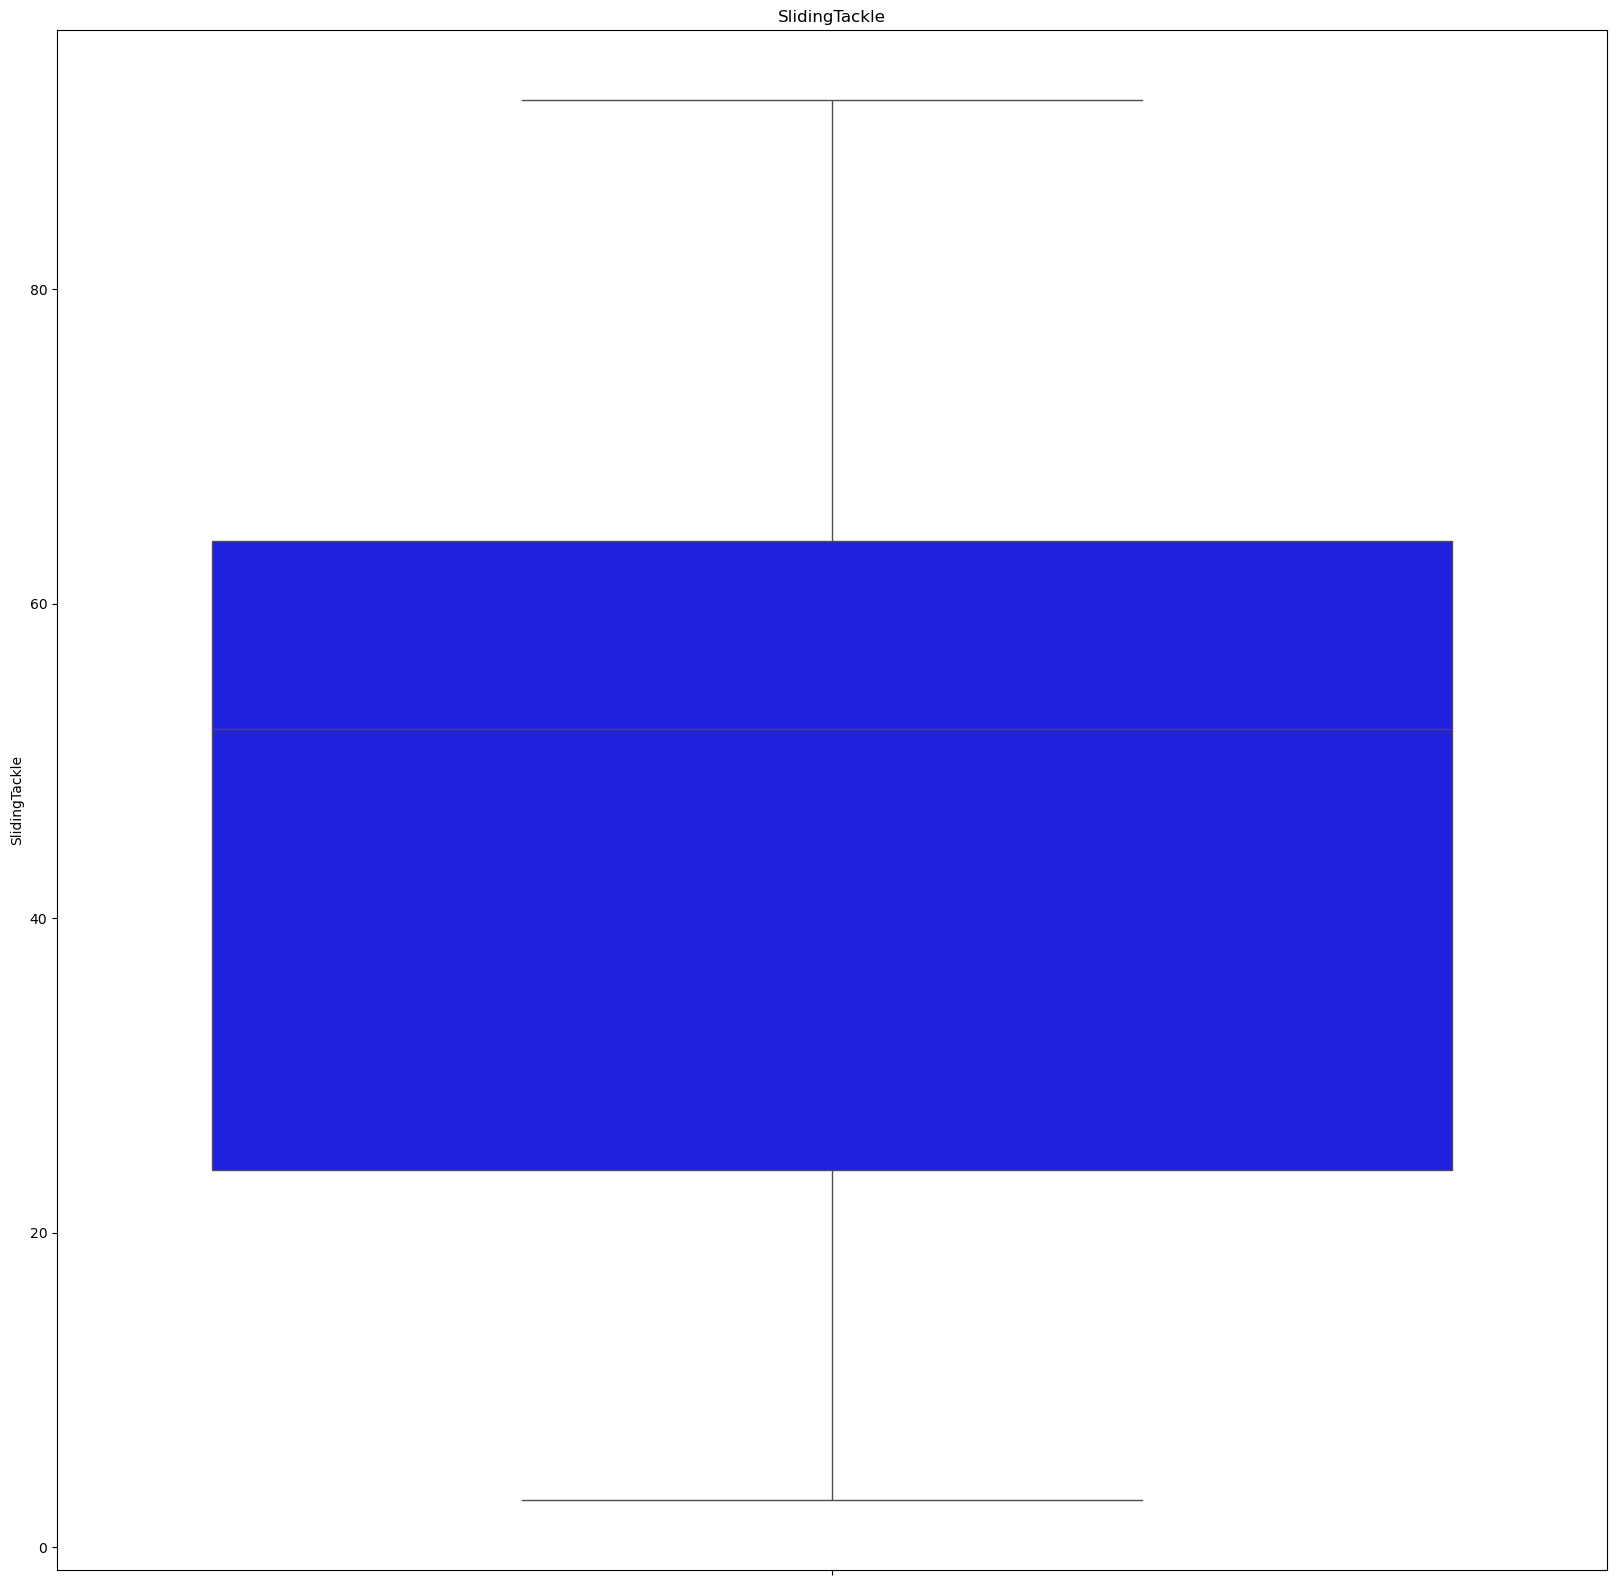

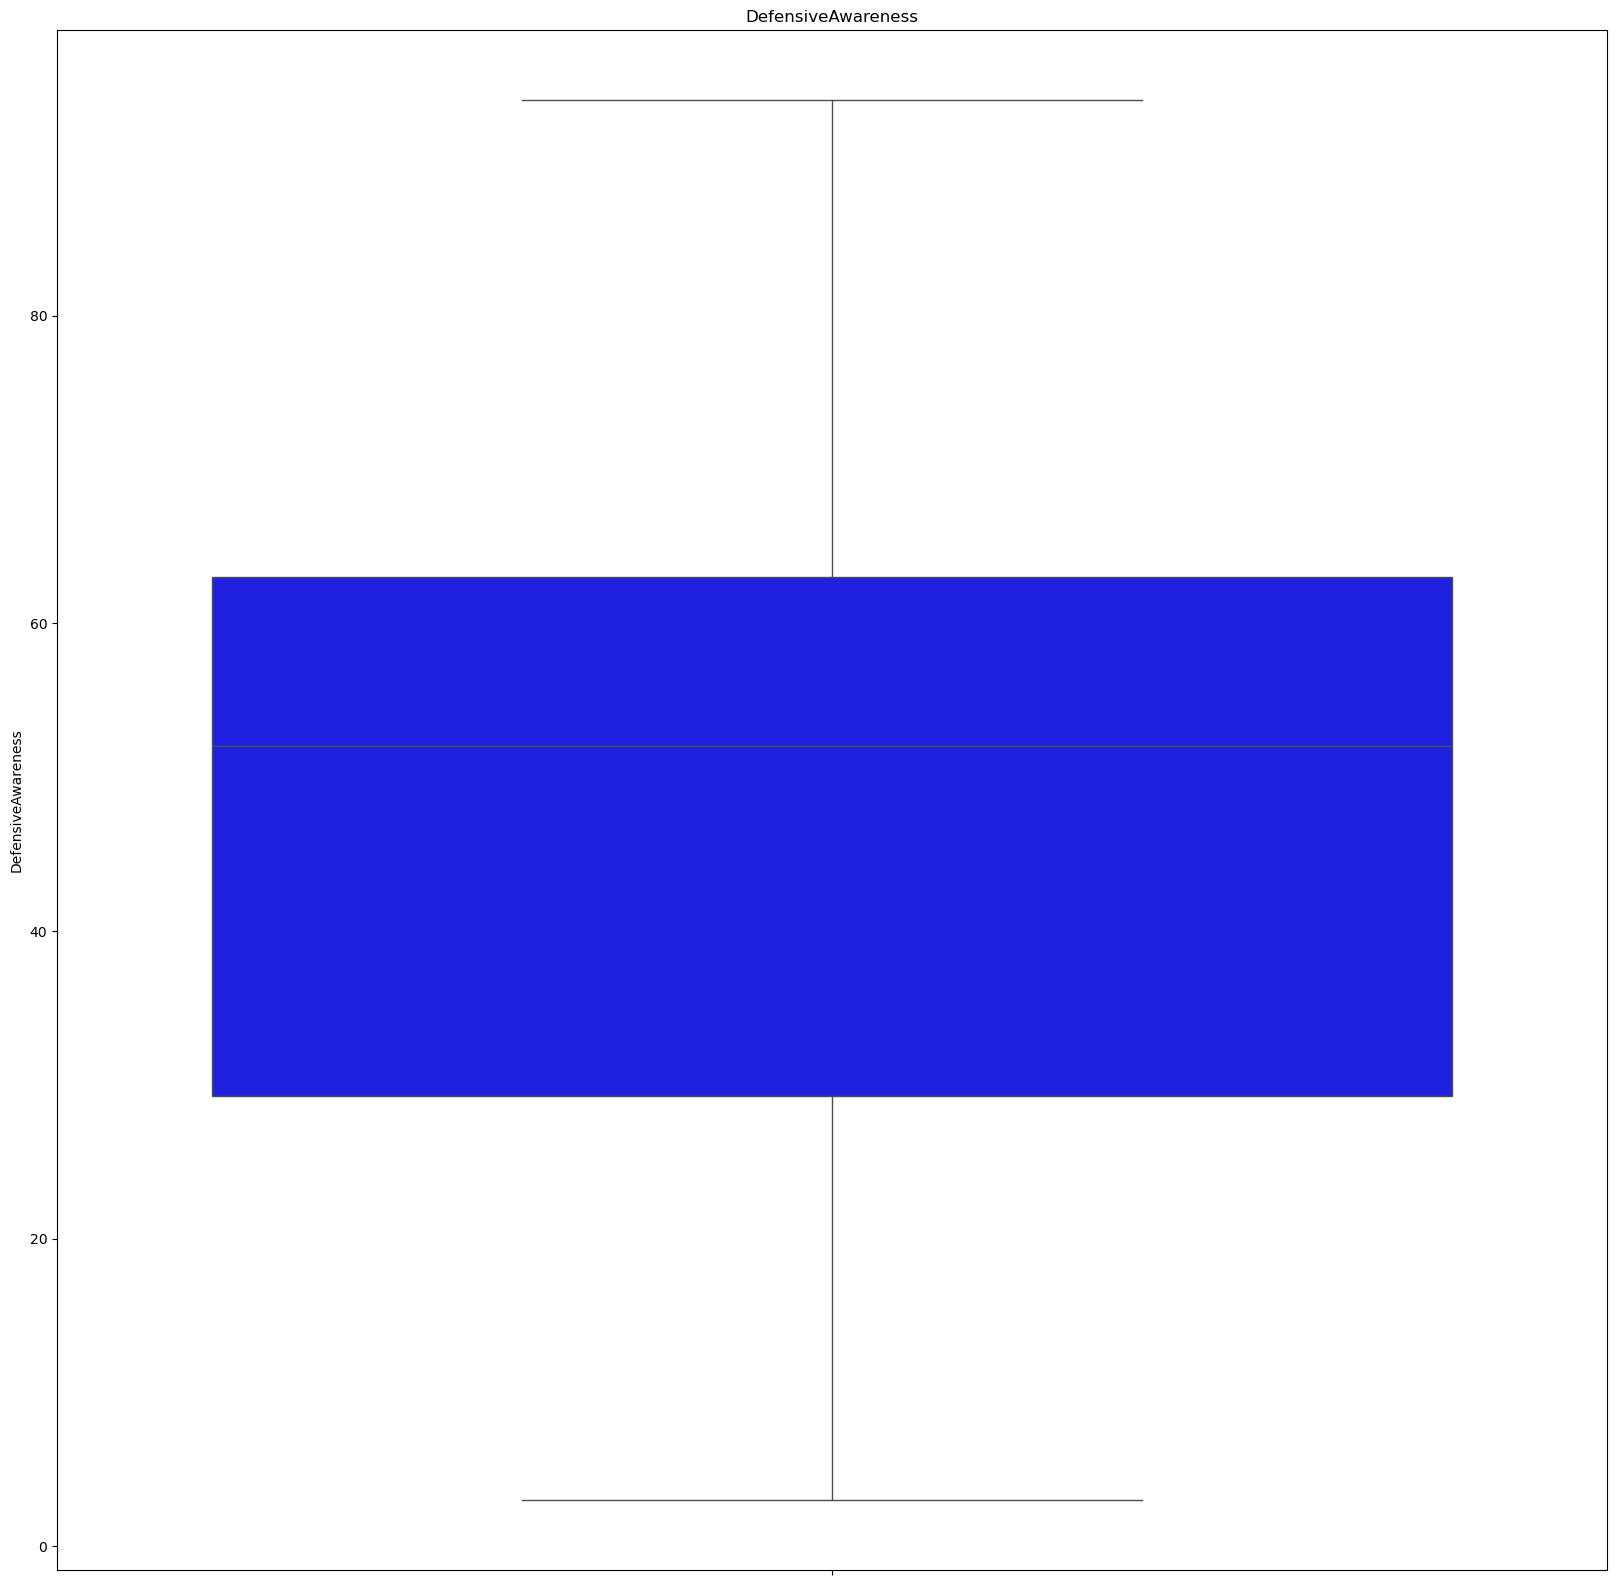

In [505]:
for col in df.columns:
    plt.figure(figsize=(20,20))
    sns.boxplot(y=df[col], color="blue")
    plt.title(f"{col}")
    plt.ylabel(col)
    plt.show()

## **Model Fitting:-**

In [512]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

x = df.drop('Overall',axis=1)
y = df['Overall']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [513]:
scaler = RobustScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [516]:
x_train_scaled

array([[ 0.        ,  0.        , -0.96      , ...,  0.41025641,
         0.45      ,  0.38402184],
       [ 1.        ,  1.        ,  0.56      , ...,  0.1025641 ,
        -0.025     , -0.35573531],
       [-1.        ,  0.        , -0.48      , ...,  0.38461538,
         0.225     ,  0.3350813 ],
       ...,
       [ 0.        ,  1.        ,  0.12      , ...,  0.1025641 ,
         0.15      ,  0.09779744],
       [ 0.        , -1.        , -1.72      , ..., -1.07692308,
        -1.        , -1.36365202],
       [ 1.        ,  1.        ,  0.24      , ...,  0.17948718,
         0.25      ,  0.19292387]])

In [517]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [518]:
x_train_scaled

,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,DefensiveAwareness
0,0.0,0.0,-0.96,-0.645161,0.30,-1.266667,-0.230769,-1.421053,-0.407407,0.846154,...,-0.827586,0.28,0.315789,-0.72,-0.65,0.000000,-0.3125,0.410256,0.450,0.384022
1,1.0,1.0,0.56,0.258065,-0.40,0.400000,-0.307692,0.315789,0.666667,0.076923,...,-0.275862,-0.04,-0.421053,0.44,0.10,-0.181818,-0.5625,0.102564,-0.025,-0.355735
2,-1.0,0.0,-0.48,-0.935484,0.55,-0.533333,-0.692308,-1.894737,-0.777778,-0.692308,...,-1.068966,-0.40,0.342105,-1.36,-1.40,-0.863636,-0.4375,0.384615,0.225,0.335081
3,1.0,1.0,0.36,0.322581,-0.10,0.333333,0.000000,0.578947,0.555556,0.807692,...,0.344828,-0.20,-0.236842,0.40,0.85,0.045455,0.6250,-0.230769,-0.175,-0.214249
4,-1.0,0.0,0.04,-0.709677,-0.85,-0.600000,-0.884615,-1.052632,-0.629630,-0.423077,...,-1.068966,-0.08,0.026316,-0.92,-0.95,-0.363636,-1.7500,0.256410,0.250,0.158317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80660,0.0,0.0,0.04,0.193548,0.95,-0.133333,0.538462,-0.263158,0.296296,0.384615,...,0.344828,0.84,0.315789,0.28,0.15,0.363636,-0.2500,0.307692,0.325,0.322161
80661,0.0,1.0,0.36,0.451613,0.25,0.333333,0.653846,0.421053,0.666667,1.038462,...,0.517241,-0.16,0.368421,0.28,0.55,1.045455,0.3750,-0.230769,-0.025,0.092617
80662,0.0,1.0,0.12,0.161290,0.35,0.600000,0.730769,0.210526,-0.518519,0.461538,...,0.137931,-0.52,0.052632,0.24,0.35,0.500000,0.3125,0.102564,0.150,0.097797
80663,0.0,-1.0,-1.72,-1.419355,-2.20,-2.266667,-1.461538,-2.684211,-1.370370,-1.153846,...,-1.620690,-1.48,-1.026316,-1.92,-1.35,-1.500000,-2.4375,-1.076923,-1.000,-1.363652


In [524]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(
    n_estimators=300,     
    max_depth=20,       
    min_samples_leaf=2,   
    max_features='sqrt',  
    n_jobs=-1,            
    random_state=42,
    bootstrap=True
)
rf.fit(x_train_scaled, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [526]:
pred = rf.predict(x_test_scaled)
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
print("R^2 :", r2_score(y_test, pred))

RMSE: 1.2791536848375136
R^2 : 0.9662110153394512


In [528]:
rf.fit(x_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [529]:
pred = rf.predict(x_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
print("R^2 :", r2_score(y_test, pred))

RMSE: 1.2795947673606864
R^2 : 0.9661877088355243


### Thus scaling does not matter for Tree based models

In [530]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, x_train_scaled, y_train, 
                            cv=5, scoring="r2", n_jobs=-1)
print("Cross-val R²:", cv_scores)
print("Mean R²:", cv_scores.mean())

Cross-val R²: [0.96299627 0.96494487 0.96387173 0.96427767 0.96396951]
Mean R²: 0.9640120082211695


### Thus overfitting does not take place

## **Feature Importance:-**

In [538]:
importances = rf.feature_importances_

feat_imp = pd.DataFrame({
    "Feature": x_train.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feat_imp.head(10))

               Feature  Importance
15           Reactions    0.223110
11         BallControl    0.103633
27           Composure    0.101691
5         ShortPassing    0.055910
7            Dribbling    0.051533
30  DefensiveAwareness    0.041874
28      StandingTackle    0.041515
24         Positioning    0.041468
23       Interceptions    0.038263
25              Vision    0.032521


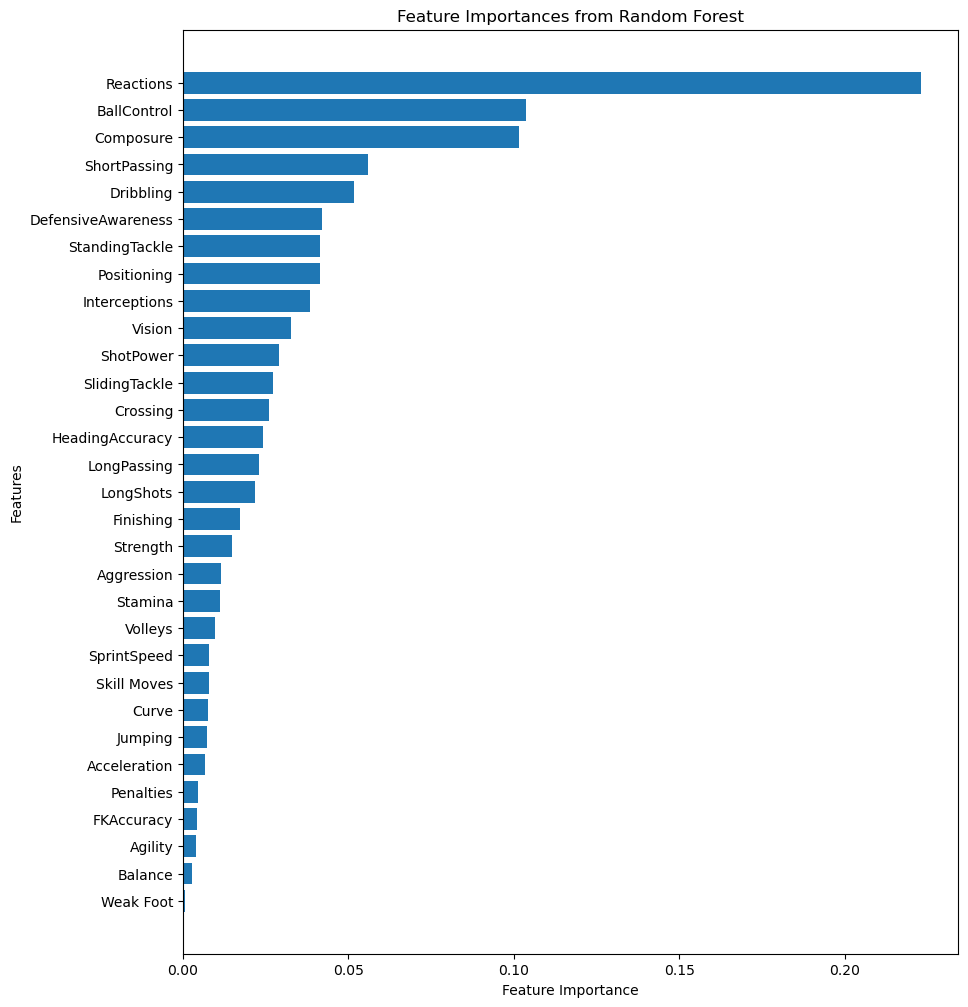

In [539]:
plt.figure(figsize=(10,12))
plt.barh(feat_imp["Feature"][::-1], feat_imp["Importance"][::-1])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances from Random Forest")
plt.show()